# 아파트 실거래가 예측
알고리즘 | 정형 | 회귀 | 금융 | RMSE

## 대회 개요


1. 배경
안녕하세요 여러분!🙌 아파트 실거래가 예측에 오신 것을 환영합니다.



통계청 2015년 자료에 의하면 (https://bit.ly/2SFyzMA)

일반적인 한국인의 절반은 48.1%는 아파트에 살고 있습니다.

그들은 아파트 주거 선호도가 매우 높습니다.

또한 부의 증식 수단으로 생각 하기 때문에 아파트 가격에 관심이 많습니다.

	

이번 대회의 데이터 제공자는 직방입니다.

직방은 부동산 정보의 비대칭성과 불투명성을 해소하기 위해 노력하며,

중개사와 구매자를 연결하여 부동산정보 서비스 시장의 신뢰도를 높이는데 기여합니다.



최근 매물 가격 정보는 직방, 다음부동산, 네이버부동산에서 볼 수 있습니다.

하지만 최근 매물 가격은 아직 거래되지 않아 정확하지 않은 정보일 수 있습니다.



이에따라, 본 대회는 실 거래가와 아파트, 학교, 지하철역 정보를 제공하며,

아파트 구매자들의 비대칭성 정보를 해결하기 위해 미래의 실 거래가 예측을 목표로 합니다.





2. 목적


서울/부산 지역 아파트 실 거래가를 예측하는 모델 개발





3. 후원 / 주관
후원 : ZPER
주관: 데이콘




4. 유의사항


참가자 당 하나의 계정

복수의 계정으로 데이콘 사이트에 가입 할 수 없으므로 여러 계정에서 제출할 수 없습니다.

팀 외부의 개인 공유 없음

팀 외부에서 개인적으로 코드 또는 데이터를 공유하는 것은 허용되지 않습니다. 데이콘 커뮤니티 모든 참가자가 사용할 수 있도록 코드를 공유하는 것은 괜찮습니다.

## 🎉 데이터톤 채점기준

1. **EDA 및 시각화**가 적절하게 이루어졌는가? (30%)
    1. EDA 및 시각화를 진행했는가?
    2. 데이터 특성에 따른 다양한 시각화 자료를 만들었는가?
    3. 시각화 자료를 통한 새로운 인사이트를 도출했는가?
2. **머신러닝을 이용한 예측**이 이루어졌는가? (30%)
    1. 추론 과정을 위한 적절한 전처리가 진행되었는가?
    2. 머신러닝을 이용한 예측을 진행했는가?
    3. 스코어를 향상시키기 위한 여러가지 시도를 진행했는가?
3. **팀원들과의 협업**이 잘 이루어졌는가? (30 %)
    1. 팀원들 간의 소통이 잘 이루어졌는가?
    2. 팀원 모두 적절한 역할을 수행했는가?
4. **발표**가 **매끄럽게 진행**되었고, **발표 시간을 준수**하였는가? (10%)

# 해보자 EDA

제공되어진 데이터셋을 확인해보고, 라벨값인 실거래가를 예측하는데 도움을 줄 수 있는 데이터는 무엇이고 전처리는 어떻게 해야할 지 다양하게 시도한다.

## Dataset 

### train.csv (12 features)

- apartment_id, 아파트 아이디
- city, 도시(시)
- dong, 동
- jibun, 주소
- apt, 단지 이름
- addr_kr, 주소 ( 동 + 주소 + 단지이름 )
- exclusive_use_area, 전용면적
- year_of_completion, 설립일자
- transaction_year_month, 거래년월
- transaction_date, 거래날짜
- floor, 층
- transaction_real_price, 실거래가 (target에 없음)

## day_care_center.csv (11 features)

- city, 도시 이름
- gu, 구
- day_care_name, 어린이집 이름
- day_care_type, 어린이집 종류
- day_care_baby_num, 정원수
- teacher_num, 보육교직원수
- nursing_room_num, 보육실수
- playground_num, 놀이터수
- CCTV_num, CCTV 설치수
- is_commuting_vehicle, 통학차량 운영여부
- reference_date, 데이터 기준일자(해당 데이터가 기록된 일자)

---

>> - 국공립 어린이집
>> 국립·시립·구립 어린이집이라 불리며 영유아 11명 이상을 보육한다. 정부에서 관리하며 국가 지원 예산이 보육의 질을 높이는 데 쓰이다 보니 교육의 질이 높고, 양육 지원도 충실하다. 부모들의 만족도와 신뢰도가 높아 >> 경쟁률이 높은 편인데, 6개월 이상 기다려야 하는 경우도 있다.
>> - 법인 어린이집
>> 사회복지사업법에 의한 사회복지법인이 세우며 국공립 어린이집과 비슷한 점이 많다. 종교 단체에서 운영하는 곳이 상당수다. 영유아 21명 이상을 보육한다.
>> - 민간 어린이집
>> 비영리법인, 비영리단체, 개인이 운영하며 영유아 21명 이상 보육한다. 개인이 투자한 곳이라 보육 비용에 금융 비용, 건물 감가상각비가 포함되어 있어 국공립 어린이집보다 보육료가 비싸다.
>> - 직장 어린이집
>> 사업주가 운영하며 사원의 복지를 위해 만들어 대상이 분명하게 정해져 있다. 간혹 지역 주민이나 관련 사업장의 자녀가 이용하도록 허용하는 어린이집도 있다. 영유아 5명 이상을 보육한다. 보육 정원의 1/3 이상이 근로자의 자녀여야 한다.
>> - 가정 어린이집
>> 개인이 운영하며 영유아 5명 이상, 20명 이하를 보육한다. 아파트나 빌라 1층에서 흔히 볼 수 있는 곳으로 규모가 작다. 집과 같거나 비슷한 구조의 공간이어서 아이들이 친숙해하지만, 원장이 교사를 겸직하는 경우가 많으며 조리사가 따로 없는 경우 청결·위생관리 등이 꼼꼼히 이루어지는지 살펴야 한다.
>> - 부모협동 어린이집
>> 보호자 15명 이상이 모여 만든 것으로 ‘공동 육아 어린이집’이라고도 한다. 영유아 11명 이상을 보육하며 부모들이 어린이집을 운영하고 보육은 교사가 담당한다. 부모들이 원하는 방향으로 보육 프로그램이 운영되어 주로 자연친화적인 생태교육을 하는 곳이 많다. 가입 시 입학금이 별도로 있으며, 부모들의 동의가 있어야 입소할 수 있다.

## park.csv (13 features)

- city, 도시
- gu, 구
- dong, 동
- park_name, 공원 이름
- park_type, 공원 종류
- park_area, 공원의 넓이
- park_exercise_facility, 공원보유 운동시설
- park_entertainment_facility, 공원보유 유희시설
- park_benefit_facility, 공원보유 편익시설
- park_cultural_facitiy, 공원보유 교양시설
- park_facility_other, 공원보유 기타시설
- park_open_year, 공원 개장년도
- reference_date, 데이터 기준일자(해당 데이터가 기록된 일자)

## test.csv (11 features)

- apartment_id, 아파트 아이디
- city, 도시(시)
- dong, 동
- jibun, 주소
- apt, 단지 이름
- addr_kr, 주소 ( 동 + 주소 + 단지이름 )
- exclusive_use_area, 전용면적
- year_of_completion, 설립일자
- transaction_year_month, 거래년월
- transaction_date, 거래날짜
- floor, 층

## submission.csv (2 features)

- transaction_id, 거래 id
- transaction_real_price, 실거래가

## External Dataset

### 국토부 실거래가 (220101~220831)
http://rtdown.molit.go.kr/

**서울**
아파트(매매)__실거래가_서울.csv

**부산**
아파트(매매)__실거래가_부산.csv

### 서울시 열린데이터광장

**서울시 시군구 법정동, 행정동 데이터**
서울시 건축물대장 법정동 코드정보.csv

**부산시 시군구 법정동, 행정동 데이터**
부산시 건축물대장 법정동 코드정보.csv
링크 : http://data.seoul.go.kr/dataList/OA-15410/S/1/datasetView.do

### 서울시 지하철
**역사별 혼잡도**
서울교통공사_지하철혼잡도정보_20211231.csv
https://www.data.go.kr/data/15071311/fileData.do

**역사별 승하차 인원 정보**
https://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do

**역사별 주소데이터**
국가철도공단_서울메트로_주소데이터_20211123.csv
https://www.data.go.kr/data/15041123/fileData.do

### 부산시 지하철역
**역사별 주소데이터**
국가철도공단_부산_지하철_주소데이터_20211123.csv

### 서울시 어린이집
서울시 어린이집 정보(표준 데이터) (1).csv
http://data.seoul.go.kr/dataList/OA-20300/S/1/datasetView.do

### 부산시 어린이집
부산광역시 어린이집.csv
> 전체 구에 대해서 찾지 못했다

> 참고
> https://data.busan.go.kr/dataSet/detail.nm?publicdatapk=OA_SS00012&contentId=10
> 위도, 경도를 통해 어린이집, 공원간의 거리 컬럼 추가하기
> [지오코딩 API: 파이썬] 주소로 위도 경도 찾기, 좌표로 주소 얻기

## EDA 목차

### 1. train 데이터 확인하기

####    1-1. 데이터(특성) 확인하기

####    1-2. 결측치 확인하기

### 2. train 데이터 전처리

####    2-1. 구 컬럼 추가하기

####    2-2. 중복된 '구'이름 전처리하기

####    2-3. 중복된 '동'이름 전처리하기

####    2-4. 아파트 이름에 상관없는 부분 제거하기

####    2-5. 평균값이 높은 아파트 이름 토큰화 하기

####    2-6. 시/구/동별 평균가격 구해보기

### 3. 데이터 시각화 추가

####    3-1. 연/월별 가격 그래프 그리기

####    3-2. 연/월별 거래량 그래프 그리기

####    3-3. 시/구/동별 가격 추세 그래프 그리기

### 4. 인사이트 정리

####    4-1. 

####    4-2.

### 1. train 데이터 확인하기

####    1-1. 데이터(특성) 확인하기

In [1]:
import warnings
warnings.filterwarnings("ignore")

from os.path import join
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as msno


data_dir = 'C:/Users/82108/desktop/datathon/datathon/datathon_A_Team/'
ext_data_dir = 'C:/Users/82108/desktop/datathon/datathon/datathon_A_Team/ext_data'

train_path = join(data_dir, 'train.csv')
train = pd.read_csv(train_path, encoding='UTF-8')

test_path = join(data_dir, 'test.csv')
test = pd.read_csv(test_path, encoding='UTF-8')

day_care_center_path = join(data_dir, 'day_care_center.csv')
day_care_center = pd.read_csv(day_care_center_path, encoding='UTF-8')

park_path = join(data_dir, 'park.csv')
park = pd.read_csv(park_path, encoding='UTF-8')

In [2]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

## train.csv (12 features)

- apartment_id, 아파트 아이디
- city, 도시(시)
- dong, 동
- jibun, 주소
- apt, 단지 이름
- addr_kr, 주소 ( 동 + 주소 + 단지이름 )
- exclusive_use_area, 전용면적
- year_of_completion, 설립일자
- transaction_year_month, 거래년월
- transaction_date, 거래날짜
- floor, 층
- transaction_real_price, 실거래가 (target에 없음)

121만개의 데이터, 12개의 컬럼, 6개의 object 자료형

train.csv에는 실거래가 예측모델 학습에 있어 가장 기본이 되는 데이터셋이다.
<br>유일하게 라벨값과 특성값들이 같이 있다.
11개의 특성값 중에 어떤 것이 라벨값과 큰 상관관계를 가질까? 다양한 시각화 방법을 통해 찾아보자.

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5463 non-null   int64  
 1   apartment_id            5463 non-null   int64  
 2   city                    5463 non-null   object 
 3   dong                    5463 non-null   object 
 4   jibun                   5463 non-null   object 
 5   apt                     5463 non-null   object 
 6   addr_kr                 5463 non-null   object 
 7   exclusive_use_area      5463 non-null   float64
 8   year_of_completion      5463 non-null   int64  
 9   transaction_year_month  5463 non-null   int64  
 10  transaction_date        5463 non-null   object 
 11  floor                   5463 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 512.3+ KB


## test.csv (11 features)

- apartment_id, 아파트 아이디
- city, 도시(시)
- dong, 동
- jibun, 주소
- apt, 단지 이름
- addr_kr, 주소 ( 동 + 주소 + 단지이름 )
- exclusive_use_area, 전용면적
- year_of_completion, 설립일자
- transaction_year_month, 거래년월
- transaction_date, 거래날짜
- floor, 층

5463개의 데이터, 11개의 컬럼, 6개의 object 자료형

확인해보니, train.csv와 test.csv에는 park.csv와 day_care_center.csv에 있는 '구' 특성이 존재하지 않는다.

넣어줄 방법을 찾아보자.

####    1-2. 결측치 확인하기

아파트 명에서 발견되는 지번 등 결측치를 확인해보자.

### 2. train 데이터 전처리

####    2-1. 구 컬럼 추가하기

train.csv와 test.csv에 park.csv와 day_care_center.csv에 있는 구 특성을 채워보자.

In [5]:
# train_len 저장하고 데이터 결합

train_len = len(train)

data = pd.concat([train, test], axis=0)
data

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.820,2002,200801,21~31,2,37500.0
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.170,1973,200801,1~10,6,20000.0
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.740,2007,200801,1~10,6,38500.0
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.390,2003,200801,11~20,15,118000.0
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.430,2004,200801,21~31,3,120000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,1174640,8965,서울특별시,양재동,15-9,위너스,양재동 15-9 위너스,84.050,2003,201710,11~20,7,NaN
5459,1175575,3831,서울특별시,반포동,18-1,래미안퍼스티지,반포동 18-1 래미안퍼스티지,84.930,2009,201712,1~10,4,NaN
5460,1157024,5550,서울특별시,구로동,256-1,삼성래미안,구로동 256-1 삼성래미안,110.188,2004,201712,21~31,23,NaN
5461,1136863,3371,서울특별시,홍제동,24-16,동양드림,홍제동 24-16 동양드림,92.440,2005,201710,21~31,1,NaN


In [6]:
# 구 추가하기
busan_dong_path = join(ext_data_dir, 'busan.csv')
seoul_dong_path = join(ext_data_dir, 'seoul.csv')

busan_dong = pd.read_csv(busan_dong_path, encoding='cp949')
seoul_dong = pd.read_csv(seoul_dong_path, encoding='cp949')

seoul_dong.head()

,시군구코드,법정동코드,행정동코드,시도명,시군구명,법정동명,행정동명,적용시작일,적용만료일
0,11740,10300,525,서울특별시,강동구,상일동,상일제1동,20210701,99991231
1,11740,10300,526,서울특별시,강동구,상일동,상일제2동,20210701,99991231
2,11290,10300,620,서울특별시,성북구,돈암동,정릉제1동,20210315,99991231
3,11530,11200,800,서울특별시,구로구,항동,항동,20200101,99991231
4,11305,10300,615,서울특별시,강북구,수유동,수유1동,20190101,99991231


우리 train.csv에는 법정동으로 정리되어 있다.

건축물대장 법정동 코드 데이터를 불러와서 시군구명과 법정동을 가지고와서 일치하는 법정동에 구 컬럼을  추가해보자.

서울의 구만 따로 분류해보자.

In [7]:
seoul_gu = seoul_dong['법정동명'].groupby(seoul_dong['시군구명']).unique()
seoul_gu = dict(seoul_gu)

seoul_gu.keys()

dict_keys(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'])

서울시 강남구 동들을 먼저 살펴보자.

In [8]:
seoul_gu['강남구']

array(['일원동', '압구정동', '신사동', '청담동', '대치동', '개포동', '수서동', '논현동', '도곡동',
       '포이동', '강남구', '삼성동', '세곡동', '자곡동', '율현동', '역삼동', '잠원동', '양재동',
       '원지동', '우면동', '염곡동', '내곡동', '신원동', '방배동', '하일동', '상일동', '명일동',
       '고덕동', '암사동', '천호동', '성내동', '풍납동', '길동', '둔촌동', '거여동', '마천동',
       '방이동', '이동', '오금동', '송파동', '석촌동', '가락동', '문정동', '잠실동', '신천동',
       '삼전동', '송금동', '장지동', '학동', '반포동', '서초동', '압구정1동', '압구정2동', '청담1동',
       '청담2동', '삼성1동', '삼성2동', '대치1동', '대치2동', '대치3동', '대치4동', '역삼1동',
       '역삼2동', '도곡1동', '도곡2동', '개포1동', '개포2동', '개포3동', '개포4동'],
      dtype=object)

부산들의 구들은 어떨까?

In [9]:
busan_gu = busan_dong['법정동명'].groupby(busan_dong['시군구명']).unique()
busan_gu = dict(busan_gu)

busan_gu.keys()

dict_keys(['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구'])

부산의 강서구의 동들을 살펴보자.

In [10]:
busan_gu['강서구']

array(['명지동', '천성동', '눌차동', '동선동', '성북동', '대항동', '대저1동', '대저2동', '봉림동',
       '송정동', '화전동', '녹산동', '생곡동', '미음동', '범방동', '신호동', '강동동', '죽림동',
       '식만동', '죽동동', '구랑동', '지사동', '강서구'], dtype=object)

####    2-2. 중복된 '구'이름 전처리하기

구 컬럼을 추가했다. 서울과 부산의 중복되는 구 값을 찾아보자.

In [11]:
seoul_gu.keys() & busan_gu.keys()

{'강서구', '중구'}

강서구와 중구가 서울에도 부산에도 있다.

중복되지 않게 구와 광역지자체 명도 함께 표기하자.

In [12]:
seoul_gu = {'서울'+k: '서울'+v for k, v in seoul_gu.items()}
busan_gu = {'부산'+k: '부산'+v for k, v in busan_gu.items()}

print(seoul_gu.keys())
print(busan_gu.keys())

dict_keys(['서울강남구', '서울강동구', '서울강북구', '서울강서구', '서울관악구', '서울광진구', '서울구로구', '서울금천구', '서울노원구', '서울도봉구', '서울동대문구', '서울동작구', '서울마포구', '서울서대문구', '서울서초구', '서울성동구', '서울성북구', '서울송파구', '서울양천구', '서울영등포구', '서울용산구', '서울은평구', '서울종로구', '서울중구', '서울중랑구'])
dict_keys(['부산강서구', '부산금정구', '부산기장군', '부산남구', '부산동구', '부산동래구', '부산부산진구', '부산북구', '부산사상구', '부산사하구', '부산서구', '부산수영구', '부산연제구', '부산영도구', '부산중구', '부산해운대구'])


양이 너무 많아 키 값만 확인하자.

In [13]:
gu = dict(seoul_gu | busan_gu)
gu.keys()

dict_keys(['서울강남구', '서울강동구', '서울강북구', '서울강서구', '서울관악구', '서울광진구', '서울구로구', '서울금천구', '서울노원구', '서울도봉구', '서울동대문구', '서울동작구', '서울마포구', '서울서대문구', '서울서초구', '서울성동구', '서울성북구', '서울송파구', '서울양천구', '서울영등포구', '서울용산구', '서울은평구', '서울종로구', '서울중구', '서울중랑구', '부산강서구', '부산금정구', '부산기장군', '부산남구', '부산동구', '부산동래구', '부산부산진구', '부산북구', '부산사상구', '부산사하구', '부산서구', '부산수영구', '부산연제구', '부산영도구', '부산중구', '부산해운대구'])

####    2-3. 중복된 '동'이름 전처리하기

In [14]:
set(data[data['city']== '서울특별시']['dong'].unique()) & set(data[data['city']== '부산광역시']['dong'].unique())

{'부암동', '사직동', '송정동', '중동'}

데이터에 '동'컬럼에 구라벨의 키워드를 합쳐서 재할당하자.

In [15]:
data['city'] = data['city'].apply(lambda x: x[:2])
data['dong'] = data['city'] + data['dong']

data.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울,서울신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500.0
1,1,5399,서울,서울필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000.0
2,2,3578,서울,서울필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500.0
3,3,10957,서울,서울내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000.0
4,4,10639,서울,서울내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000.0


In [16]:
#def searchGu(dong): #너무느림
#    for k, v in gu.items():
#        if dong in v:
#            return k

#data['gu'] = data['dong'].apply(searchGu)

#data.head()

for k, v in gu.items():
    data.loc[data['dong'].isin(v), 'gu'] = k

data.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,gu
0,0,7622,서울,서울신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500.0,서울종로구
1,1,5399,서울,서울필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000.0,서울종로구
2,2,3578,서울,서울필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500.0,서울종로구
3,3,10957,서울,서울내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000.0,서울종로구
4,4,10639,서울,서울내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000.0,서울종로구


결측치를 확인해보자.

In [17]:
data['gu'].isna().sum()

0

결측치가 없으니, 구별 아파트 평균 가격을 뽑아보자.

In [18]:
grouped = data['transaction_real_price'].groupby(by=data['gu']).mean()
grouped

gu
부산강서구     31240.298350
부산금정구     22736.463471
부산기장군     19655.473365
부산남구      23469.688425
부산동구      18717.596677
부산동래구     23279.718287
부산부산진구    18753.698471
부산북구      17981.371051
부산사상구     14933.562957
부산사하구     15141.810976
부산서구      19592.257367
부산수영구     26188.155107
부산연제구     24178.487135
부산영도구     14159.843340
부산중구      13321.269319
부산해운대구    26907.117468
서울강동구     41080.281168
서울관악구     42953.450617
서울금천구     26812.244082
서울동대문구    37553.361541
서울동작구     28930.000000
서울마포구     55152.987777
서울서대문구    41020.762013
서울성동구     66043.581737
서울성북구     31381.920270
서울송파구     69447.390203
서울영등포구    49252.175420
서울용산구     80325.633789
서울은평구     38371.311883
서울종로구     48968.885914
서울중구      54279.653664
서울중랑구     30611.301468
Name: transaction_real_price, dtype: float64

양이 많다. 평균값이 높은 순으로 인덱스를 재할당하자.

In [19]:
grouped = data['transaction_real_price'].groupby(by=data['dong']).mean()
dong_price = grouped.sort_values(ascending=False)

for i, k in enumerate(dong_price.index):
    data.loc[data['dong'] == k, 'dong'] = i
    
data.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,gu
0,0,7622,서울,138,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500.0,서울종로구
1,1,5399,서울,65,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000.0,서울종로구
2,2,3578,서울,65,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500.0,서울종로구
3,3,10957,서울,13,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000.0,서울종로구
4,4,10639,서울,13,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000.0,서울종로구


동도 똑같이 평균가격으로 재할당하자.

In [20]:
grouped = data['transaction_real_price'].groupby(data['city']).mean()
grouped

data['city'] = data['city'].apply(lambda x: 1 if x == '서울' else 0)

data.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,gu
0,0,7622,1,138,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500.0,서울종로구
1,1,5399,1,65,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000.0,서울종로구
2,2,3578,1,65,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500.0,서울종로구
3,3,10957,1,13,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000.0,서울종로구
4,4,10639,1,13,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000.0,서울종로구


####    2-4. 아파트 이름에 상관없는 부분 제거하기

아파트 이름을 들여다보자.

In [21]:
data['apt']

0       신현(101동)
1         사직파크맨션
2         두레엘리시안
3          파크팰리스
4           킹스매너
          ...   
5458         위너스
5459     래미안퍼스티지
5460       삼성래미안
5461        동양드림
5462      센텀그린타워
Name: apt, Length: 1222016, dtype: object

아파트 이름에 상관없는 부분 제거  
ex) 신현(101동) → 신현

In [22]:
regex = lambda x: re.sub('\(.*\)|\s-\s.*', '', x)
data['apt'] = data['apt'].apply(regex)

data['apt']

0            신현
1        사직파크맨션
2        두레엘리시안
3         파크팰리스
4          킹스매너
         ...   
5458        위너스
5459    래미안퍼스티지
5460      삼성래미안
5461       동양드림
5462     센텀그린타워
Name: apt, Length: 1222016, dtype: object

평균값이 높은 아파트 이름 순으로 1,000개를 모아보자.

In [23]:
grouped = data['transaction_real_price'].groupby(by=data['apt']).mean()
apt_price_top100 = grouped.sort_values(ascending=False)[:1000]

apt_price_top100

apt
상지리츠빌카일룸2차     530000.000000
트라움하우스3        490000.000000
아펠바움           465860.500000
상지리츠빌카일룸3차     427125.000000
삼성동상지리츠빌카일룸    418992.666667
                   ...      
강남한신휴플러스6단지     69235.200000
우성4차            69220.270270
현대레이크빌1         69220.000000
가락삼익맨숀          69214.256684
힐튼빌리지2차         69187.500000
Name: transaction_real_price, Length: 1000, dtype: float64

아파트명 중복량 상위 1,000개를 보자.

In [24]:
grouped = data['transaction_real_price'].groupby(by=data['apt']).count()
apt_count_top100 = grouped.sort_values(ascending=False)[:1000]

apt_count_top100

apt
현대         17716
한신         10135
삼성          6771
대우          6390
신동아         6386
           ...  
문현삼성힐타워      298
왕자           297
성지           297
위례24단지       297
국제산장         297
Name: transaction_real_price, Length: 1000, dtype: int64

평균값 상위 1,000개와 아파트명 카운트 상위 1,000개의 중복값을 찾아보자.

In [25]:
most_name = (set(apt_price_top100.reset_index()['apt']) & set(apt_count_top100.reset_index()['apt']))
most_name


{'2차한양아파트',
 'DMC파크뷰자이1단지',
 'e-편한세상',
 '가락삼익맨숀',
 '강서힐스테이트',
 '강촌',
 '개포주공 1단지',
 '개포주공 3단지',
 '개포주공 4단지',
 '개포주공 5단지',
 '개포주공 6단지',
 '개포주공 7단지',
 '고덕 아이파크',
 '광화문풍림스페이스본',
 '대림e-편한세상4',
 '대치삼성',
 '대치아이파크',
 '대치현대',
 '더샵스타시티',
 '도곡렉슬',
 '동부센트레빌',
 '둔촌주공2단지',
 '둔촌주공3단지',
 '둔촌주공4단지',
 '래미안 옥수 리버젠',
 '래미안그레이튼',
 '래미안파크팰리스',
 '래미안퍼스티지',
 '레이크팰리스',
 '롯데캐슬갤럭시',
 '롯데캐슬클래식',
 '롯데캐슬프레미어',
 '리센츠',
 '메세나폴리스',
 '목동신시가지1',
 '목동신시가지13',
 '목동신시가지2',
 '목동신시가지3',
 '목동신시가지5',
 '목동신시가지7',
 '목동신시가지9',
 '문래자이',
 '문정래미안',
 '미성2차',
 '반포 주공1단지',
 '반포경남아파트',
 '반포리체',
 '반포미도',
 '반포자이',
 '방배1차현대홈타운',
 '삼부',
 '삼성동힐스테이트 1단지',
 '삼풍아파트',
 '상도엠코타운애스톤파크',
 '상록수',
 '상암월드컵파크4단지',
 '서초래미안',
 '송파삼성래미안아파트',
 '시범',
 '신동아1',
 '신반포2',
 '신반포4',
 '신반포8',
 '아이파크',
 '에이아이디차관주택',
 '역삼래미안',
 '역삼푸르지오',
 '올림픽선수기자촌1단지',
 '올림픽선수기자촌2단지',
 '올림픽선수기자촌3단지',
 '우성아파트',
 '은마',
 '이수힐스테이트',
 '잠실엘스',
 '장미1',
 '장미2',
 '주공아파트 5단지',
 '진주',
 '진흥',
 '청구e편한세상',
 '청담삼익아파트',
 '타워팰리스1',
 '타워팰리스2',
 '트리지움',
 '파크리오',
 '한가람',
 '한강',
 '한남더힐',
 '한보미도맨션1',
 '한

####    2-5. 평균값이 높은 아파트 이름 토큰화 하기

In [26]:
for name in most_name:
    data[f'{name}'] = data['apt'].str.contains(name).astype('int')

data.loc[data['apt']=='한남더힐']

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,...,훼밀리,대치삼성,상도엠코타운애스톤파크,장미1,대치현대,반포경남아파트,한강,삼풍아파트,현대3차,이수힐스테이트
17516,17516,11320,1,6,810,한남더힐,한남동 810 한남더힐,59.686,2011,201401,...,0,0,0,0,0,0,0,0,0,0
17522,17522,11320,1,6,810,한남더힐,한남동 810 한남더힐,59.686,2011,201401,...,0,0,0,0,0,0,0,0,0,0
17643,17643,11320,1,6,810,한남더힐,한남동 810 한남더힐,59.686,2011,201402,...,0,0,0,0,0,0,0,0,0,0
17644,17644,11320,1,6,810,한남더힐,한남동 810 한남더힐,59.686,2011,201402,...,0,0,0,0,0,0,0,0,0,0
17645,17645,11320,1,6,810,한남더힐,한남동 810 한남더힐,59.686,2011,201402,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1097127,11320,1,6,810,한남더힐,한남동 810 한남더힐,59.700,2011,201712,...,0,0,0,0,0,0,0,0,0,0
312,1097116,11320,1,6,810,한남더힐,한남동 810 한남더힐,235.312,2011,201712,...,0,0,0,0,0,0,0,0,0,0
2408,1097129,11320,1,6,810,한남더힐,한남동 810 한남더힐,177.764,2011,201712,...,0,0,0,0,0,0,0,0,0,0
4313,1097117,11320,1,6,810,한남더힐,한남동 810 한남더힐,235.312,2011,201712,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data.drop(columns=['apt', 'addr_kr', 'jibun'], inplace=True)

data.head()

,transaction_id,apartment_id,city,dong,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,...,훼밀리,대치삼성,상도엠코타운애스톤파크,장미1,대치현대,반포경남아파트,한강,삼풍아파트,현대3차,이수힐스테이트
0,0,7622,1,138,84.82,2002,200801,21~31,2,37500.0,...,0,0,0,0,0,0,0,0,0,0
1,1,5399,1,65,99.17,1973,200801,1~10,6,20000.0,...,0,0,0,0,0,0,0,0,0,0
2,2,3578,1,65,84.74,2007,200801,1~10,6,38500.0,...,0,0,0,0,0,0,0,0,0,0
3,3,10957,1,13,146.39,2003,200801,11~20,15,118000.0,...,0,0,0,0,0,0,0,0,0,0
4,4,10639,1,13,194.43,2004,200801,21~31,3,120000.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1222016 entries, 0 to 5462
Columns: 110 entries, transaction_id to 이수힐스테이트
dtypes: float64(2), int32(99), int64(6), object(3)
memory usage: 573.4+ MB


####    2-6. 시/구/동별 평균가격 구해보기

In [29]:
grouped = data['transaction_real_price'].groupby(by=data['city']).mean()
apt_price_top100 = grouped.sort_values(ascending=False)[:100]

apt_price_top100

city
1    49169.779317
0    21102.045856
Name: transaction_real_price, dtype: float64

In [30]:
grouped = data['transaction_real_price'].groupby(by=data['gu']).mean()
apt_price_top100 = grouped.sort_values(ascending=False)[:100]

apt_price_top100

gu
서울용산구     80325.633789
서울송파구     69447.390203
서울성동구     66043.581737
서울마포구     55152.987777
서울중구      54279.653664
서울영등포구    49252.175420
서울종로구     48968.885914
서울관악구     42953.450617
서울강동구     41080.281168
서울서대문구    41020.762013
서울은평구     38371.311883
서울동대문구    37553.361541
서울성북구     31381.920270
부산강서구     31240.298350
서울중랑구     30611.301468
서울동작구     28930.000000
부산해운대구    26907.117468
서울금천구     26812.244082
부산수영구     26188.155107
부산연제구     24178.487135
부산남구      23469.688425
부산동래구     23279.718287
부산금정구     22736.463471
부산기장군     19655.473365
부산서구      19592.257367
부산부산진구    18753.698471
부산동구      18717.596677
부산북구      17981.371051
부산사하구     15141.810976
부산사상구     14933.562957
부산영도구     14159.843340
부산중구      13321.269319
Name: transaction_real_price, dtype: float64

In [31]:
grouped = data['transaction_real_price'].groupby(by=data['dong']).mean()
apt_price_top100 = grouped.sort_values(ascending=False)[:100]

apt_price_top100

dong
0     269888.888889
1     164534.722914
2     161403.700000
3     153497.331633
4     139906.140351
          ...      
95     53131.640288
96     53113.386275
97     52965.720034
98     52300.889831
99     51930.730435
Name: transaction_real_price, Length: 100, dtype: float64

### 3. 데이터 시각화 추가

####    3-1. 연/월별 가격 그래프 그리기

#### **연도별 가격 변화**

In [32]:
train_a = data[:train_len]
test_a = data[train_len:]

In [33]:
train_b = train_a.copy()

In [34]:
train_b['transaction_year_month'] = train_a['transaction_year_month'].astype(str)

In [35]:
train_year = train_b.copy()
train_month = train_b.copy()

In [36]:
train_year['transaction_year_month'] = train_b['transaction_year_month'].apply(lambda i:i[:-2])
train_month['transaction_year_month'] = train_b['transaction_year_month'].apply(lambda i:i[2:])

In [37]:
seoul = train_year[train_year['city'] == 1]
busan = train_year[train_year['city'] == 0]
seoul_year = train_year[train_year['city'] == 1]
busan_year = train_year[train_year['city'] == 0]
seoul_month = train_month[train_month['city'] == 1]
busan_month = train_month[train_month['city'] == 0]

In [38]:
seoul_year.head()

,transaction_id,apartment_id,city,dong,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,...,훼밀리,대치삼성,상도엠코타운애스톤파크,장미1,대치현대,반포경남아파트,한강,삼풍아파트,현대3차,이수힐스테이트
0,0,7622,1,138,84.82,2002,2008,21~31,2,37500.0,...,0,0,0,0,0,0,0,0,0,0
1,1,5399,1,65,99.17,1973,2008,1~10,6,20000.0,...,0,0,0,0,0,0,0,0,0,0
2,2,3578,1,65,84.74,2007,2008,1~10,6,38500.0,...,0,0,0,0,0,0,0,0,0,0
3,3,10957,1,13,146.39,2003,2008,11~20,15,118000.0,...,0,0,0,0,0,0,0,0,0,0
4,4,10639,1,13,194.43,2004,2008,21~31,3,120000.0,...,0,0,0,0,0,0,0,0,0,0


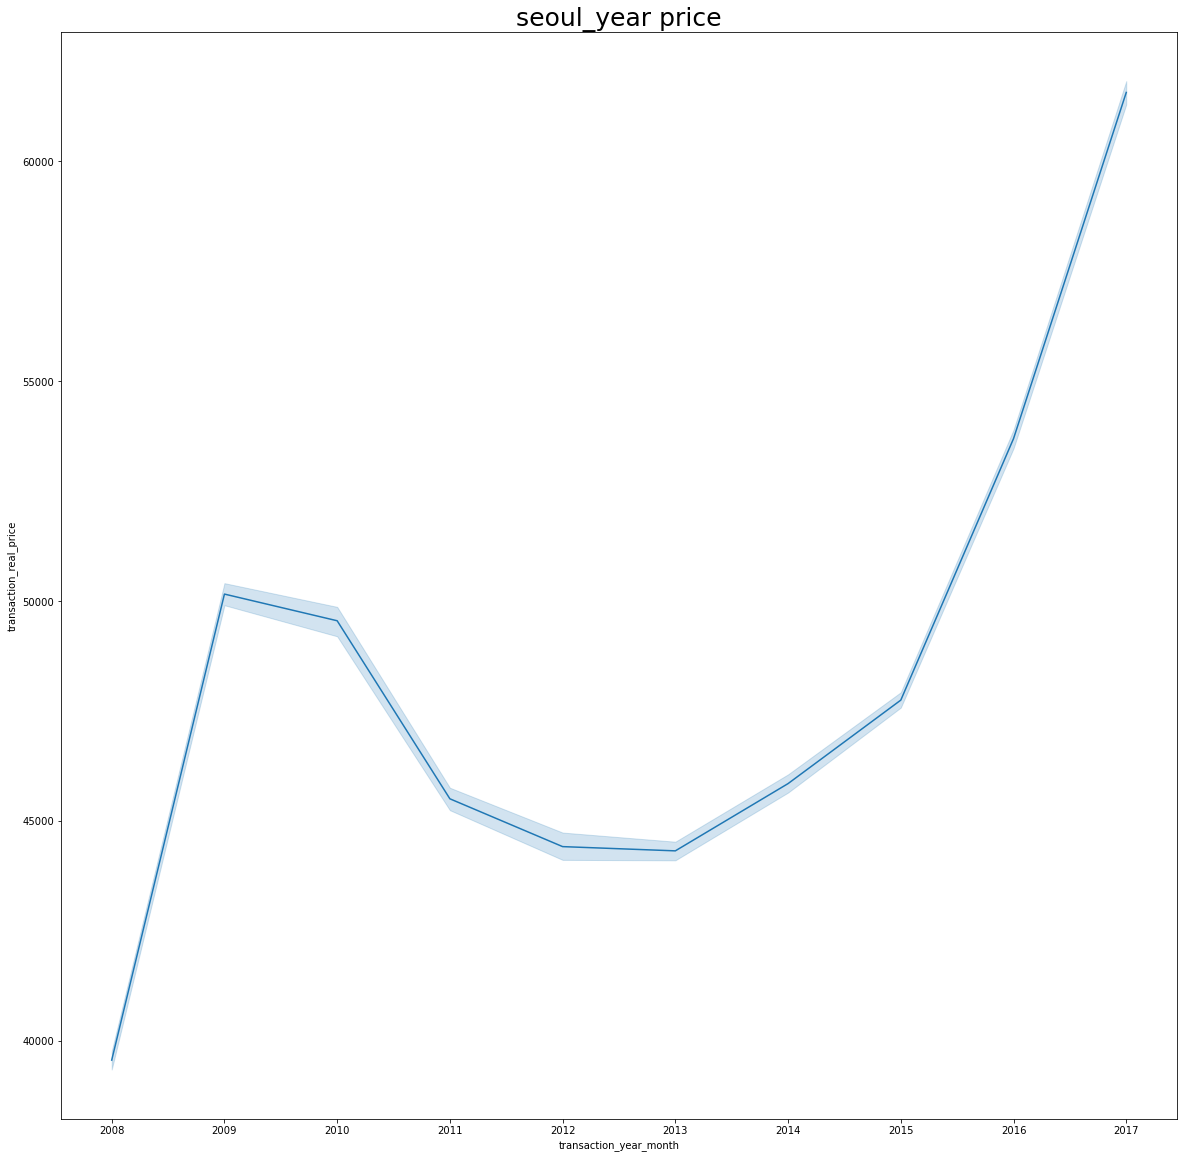

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

sns.lineplot(data = seoul_year, x = 'transaction_year_month', y = 'transaction_real_price')
plt.title('seoul_year price', fontsize=25)
plt.show()

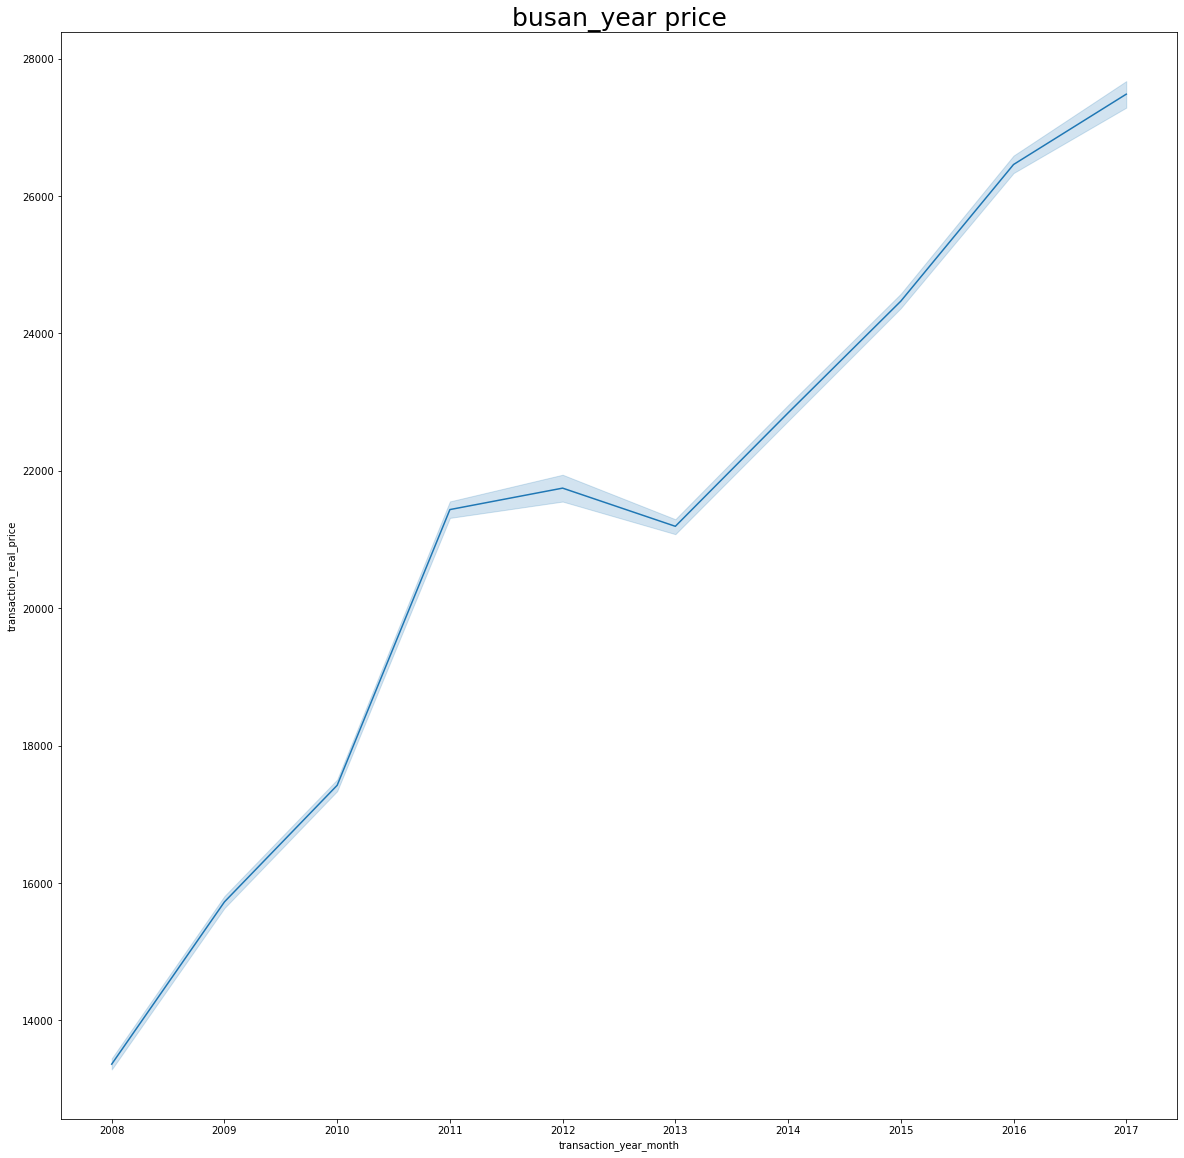

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

sns.lineplot(data = busan_year, x = 'transaction_year_month', y = 'transaction_real_price')
plt.title('busan_year price', fontsize=25)
plt.show()


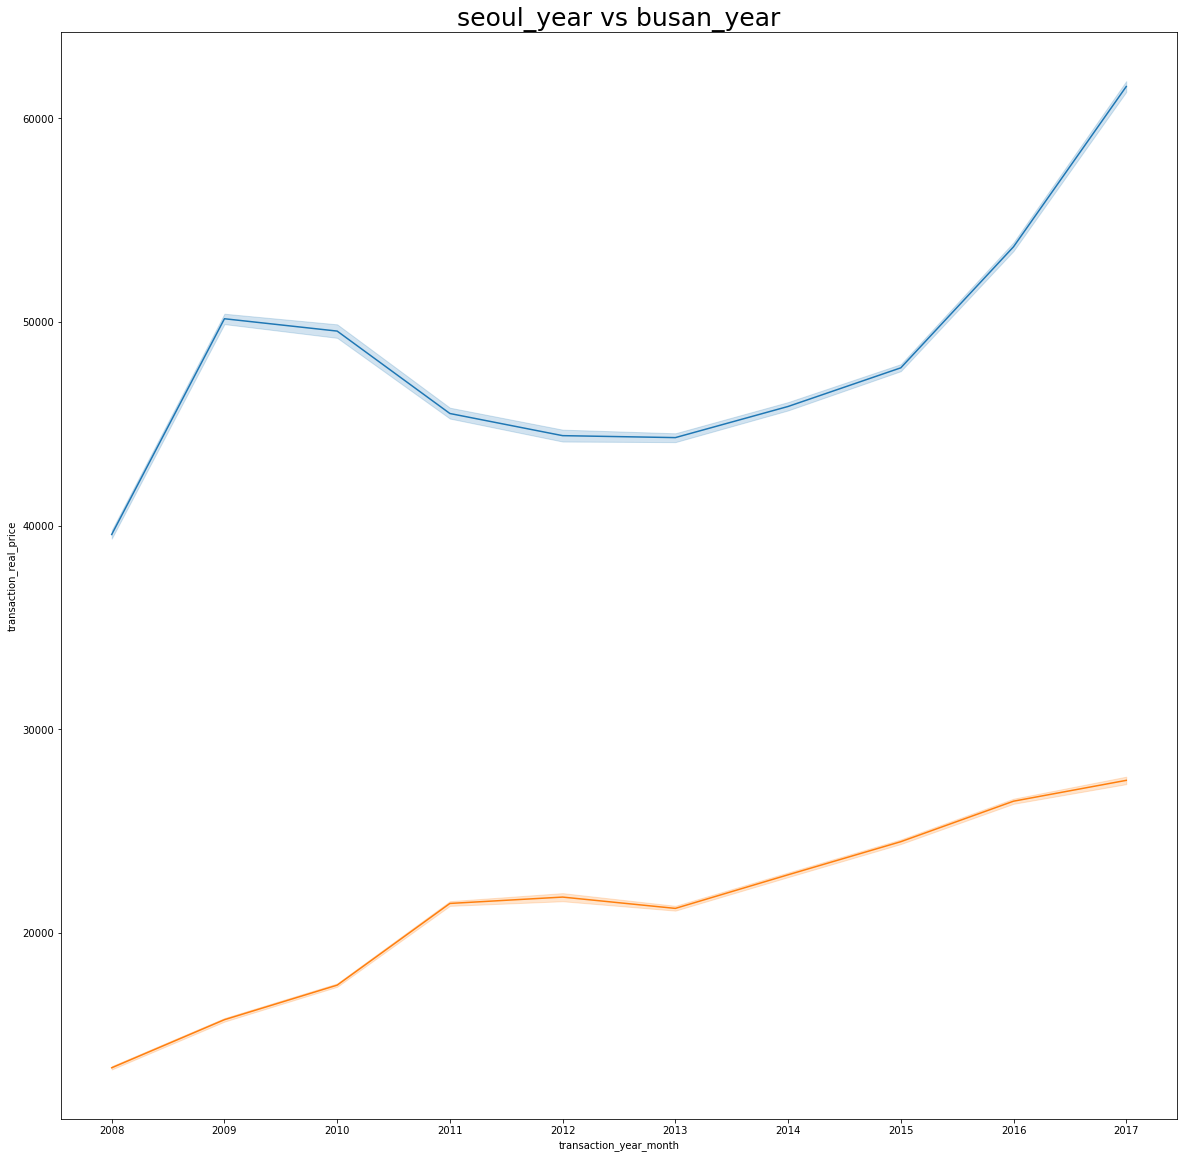

In [41]:

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

sns.lineplot(data = seoul_year, x = 'transaction_year_month', y = 'transaction_real_price')
sns.lineplot(data = busan_year, x = 'transaction_year_month', y = 'transaction_real_price')
plt.title('seoul_year vs busan_year', fontsize=25)
plt.show()

#### **월별 가격 변화**

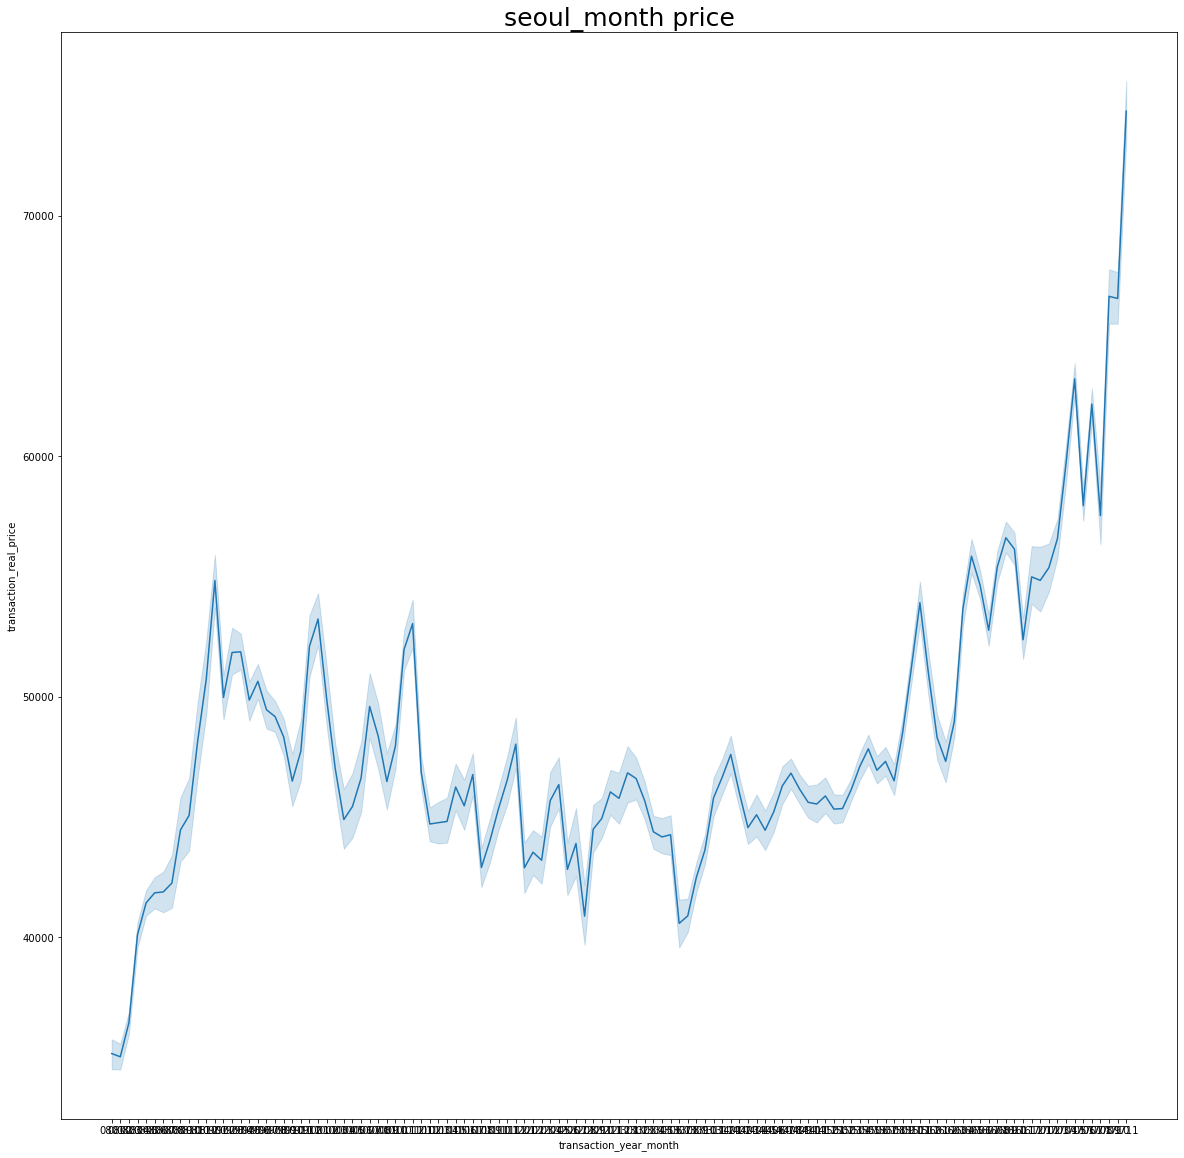

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

sns.lineplot(data = seoul_month, x = 'transaction_year_month', y = 'transaction_real_price')
plt.title('seoul_month price', fontsize=25)
plt.show()

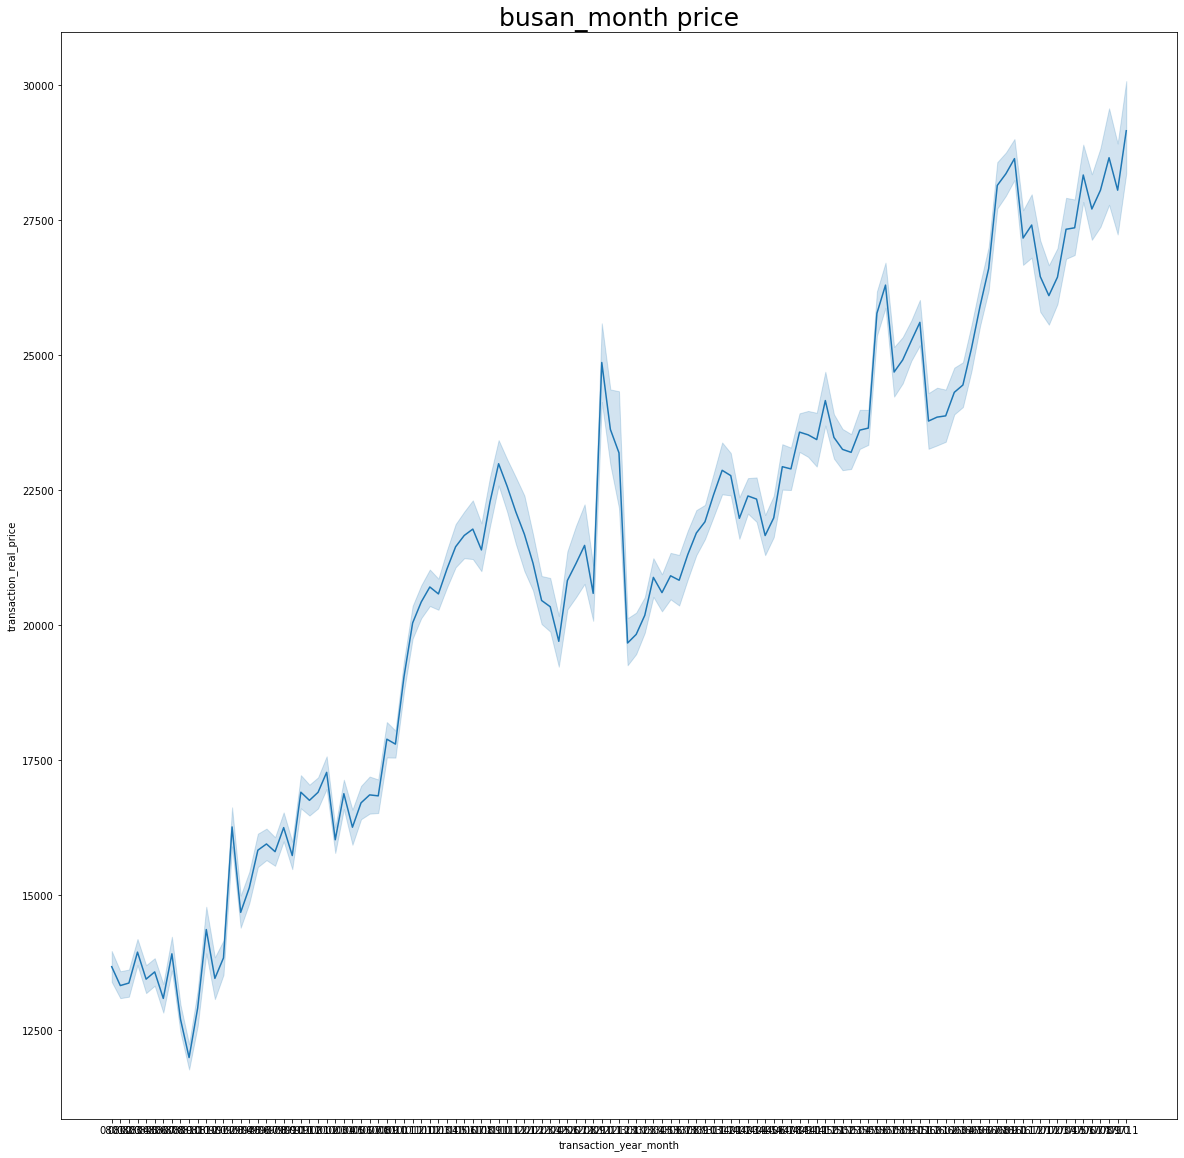

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

sns.lineplot(data = busan_month, x = 'transaction_year_month', y = 'transaction_real_price')
plt.title('busan_month price', fontsize=25)
plt.show()

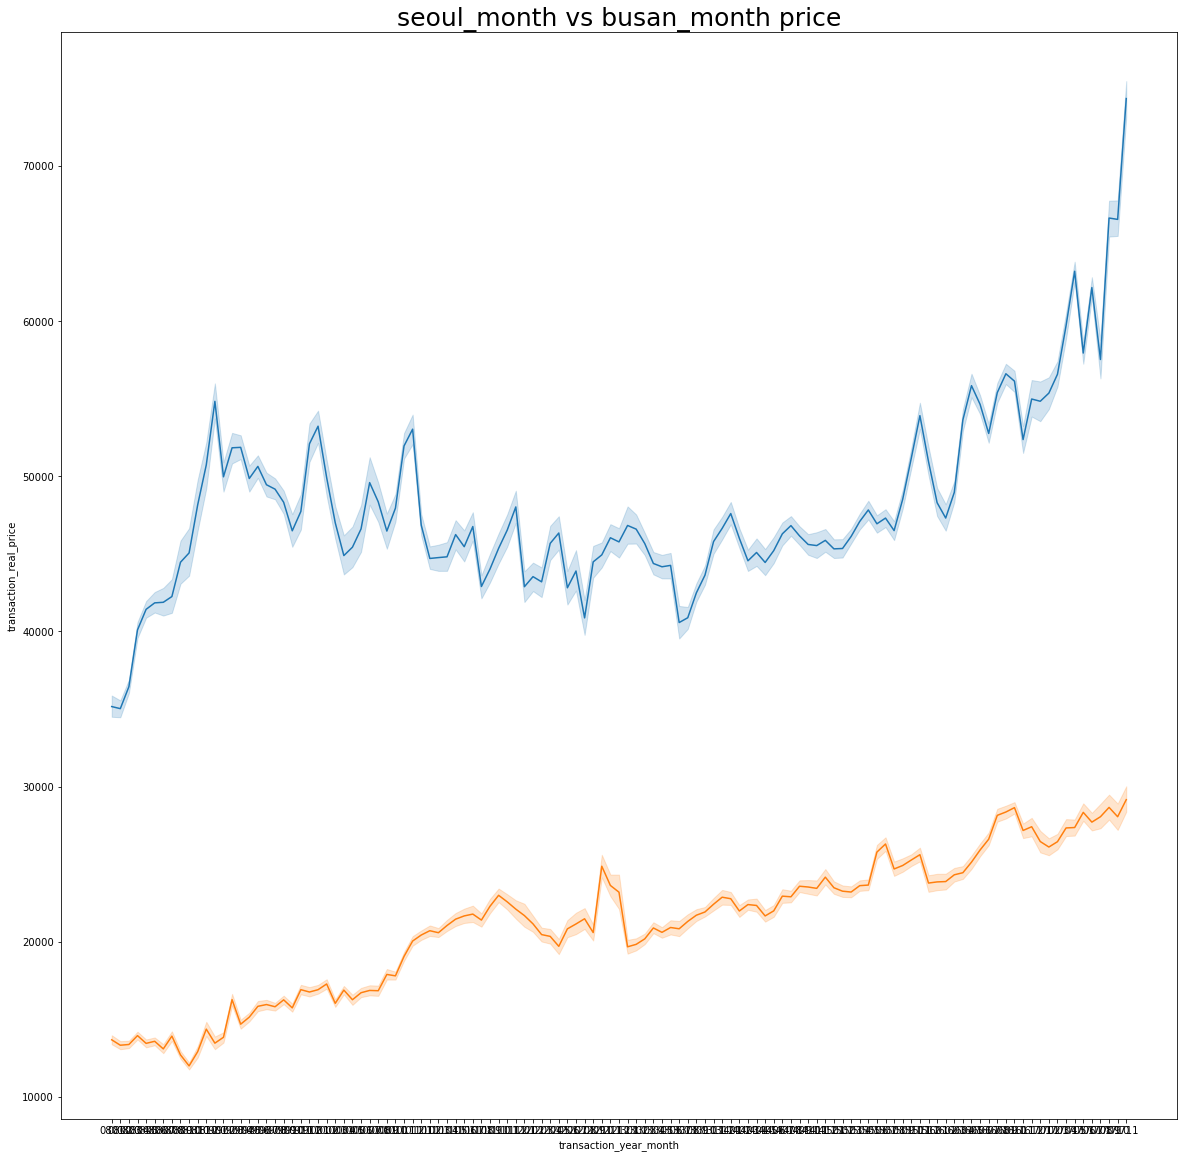

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

sns.lineplot(data = seoul_month, x = 'transaction_year_month', y = 'transaction_real_price')
sns.lineplot(data = busan_month, x = 'transaction_year_month', y = 'transaction_real_price')
plt.title('seoul_month vs busan_month price', fontsize=25)
plt.show()

## 월 별 변수로 나누기

In [45]:
s_0801 = seoul_month.loc[seoul_month['transaction_year_month']== '0801']
s_0802 = seoul_month.loc[seoul_month['transaction_year_month']== '0802']
s_0803 = seoul_month.loc[seoul_month['transaction_year_month']== '0803']
s_0804 = seoul_month.loc[seoul_month['transaction_year_month']== '0804']
s_0805 = seoul_month.loc[seoul_month['transaction_year_month']== '0805']
s_0806 = seoul_month.loc[seoul_month['transaction_year_month']== '0806']
s_0807 = seoul_month.loc[seoul_month['transaction_year_month']== '0807']
s_0808 = seoul_month.loc[seoul_month['transaction_year_month']== '0808']
s_0809 = seoul_month.loc[seoul_month['transaction_year_month']== '0809']
s_0810 = seoul_month.loc[seoul_month['transaction_year_month']== '0810']
s_0811 = seoul_month.loc[seoul_month['transaction_year_month']== '0811']
s_0812 = seoul_month.loc[seoul_month['transaction_year_month']== '0812']

s_month_08 = pd.concat([s_0801, s_0802, s_0803,s_0804, s_0805, s_0806, s_0807, s_0808, s_0809, s_0810, s_0811, s_0812] ,axis = 0)

s_0901 = seoul_month.loc[seoul_month['transaction_year_month']== '0901']
s_0902 = seoul_month.loc[seoul_month['transaction_year_month']== '0902']
s_0903 = seoul_month.loc[seoul_month['transaction_year_month']== '0903']
s_0904 = seoul_month.loc[seoul_month['transaction_year_month']== '0904']
s_0905 = seoul_month.loc[seoul_month['transaction_year_month']== '0905']
s_0906 = seoul_month.loc[seoul_month['transaction_year_month']== '0906']
s_0907 = seoul_month.loc[seoul_month['transaction_year_month']== '0907']
s_0908 = seoul_month.loc[seoul_month['transaction_year_month']== '0908']
s_0909 = seoul_month.loc[seoul_month['transaction_year_month']== '0909']
s_0910 = seoul_month.loc[seoul_month['transaction_year_month']== '0910']
s_0911 = seoul_month.loc[seoul_month['transaction_year_month']== '0911']
s_0912 = seoul_month.loc[seoul_month['transaction_year_month']== '0912']

s_month_09 = pd.concat([s_0901, s_0902, s_0903, s_0904, s_0905, s_0906, s_0907, s_0908, s_0909, s_0910, s_0911, s_0912] ,axis = 0)

s_1001 = seoul_month.loc[seoul_month['transaction_year_month']== '1001']
s_1002 = seoul_month.loc[seoul_month['transaction_year_month']== '1002']
s_1003 = seoul_month.loc[seoul_month['transaction_year_month']== '1003']
s_1004 = seoul_month.loc[seoul_month['transaction_year_month']== '1004']
s_1005 = seoul_month.loc[seoul_month['transaction_year_month']== '1005']
s_1006 = seoul_month.loc[seoul_month['transaction_year_month']== '1006']
s_1007 = seoul_month.loc[seoul_month['transaction_year_month']== '1007']
s_1008 = seoul_month.loc[seoul_month['transaction_year_month']== '1008']
s_1009 = seoul_month.loc[seoul_month['transaction_year_month']== '1009']
s_1010 = seoul_month.loc[seoul_month['transaction_year_month']== '1010']
s_1011 = seoul_month.loc[seoul_month['transaction_year_month']== '1011']
s_1012 = seoul_month.loc[seoul_month['transaction_year_month']== '1012']

s_month_10 = pd.concat([s_1001, s_1002, s_1003,s_1004, s_1005, s_1006, s_1007, s_1008, s_1009, s_1010, s_1011, s_1012] ,axis = 0)

s_1101 = seoul_month.loc[seoul_month['transaction_year_month']== '1101']
s_1102 = seoul_month.loc[seoul_month['transaction_year_month']== '1102']
s_1103 = seoul_month.loc[seoul_month['transaction_year_month']== '1103']
s_1104 = seoul_month.loc[seoul_month['transaction_year_month']== '1104']
s_1105 = seoul_month.loc[seoul_month['transaction_year_month']== '1105']
s_1106 = seoul_month.loc[seoul_month['transaction_year_month']== '1106']
s_1107 = seoul_month.loc[seoul_month['transaction_year_month']== '1107']
s_1108 = seoul_month.loc[seoul_month['transaction_year_month']== '1108']
s_1109 = seoul_month.loc[seoul_month['transaction_year_month']== '1109']
s_1110 = seoul_month.loc[seoul_month['transaction_year_month']== '1110']
s_1111 = seoul_month.loc[seoul_month['transaction_year_month']== '1111']
s_1112 = seoul_month.loc[seoul_month['transaction_year_month']== '1112']

s_month_11 = pd.concat([s_1101, s_1102, s_1103,s_1104, s_1105, s_1106, s_1107, s_1108, s_1109, s_1110, s_1111, s_1112] ,axis = 0)

s_1201 = seoul_month.loc[seoul_month['transaction_year_month']== '1201']
s_1202 = seoul_month.loc[seoul_month['transaction_year_month']== '1202']
s_1203 = seoul_month.loc[seoul_month['transaction_year_month']== '1203']
s_1204 = seoul_month.loc[seoul_month['transaction_year_month']== '1204']
s_1205 = seoul_month.loc[seoul_month['transaction_year_month']== '1205']
s_1206 = seoul_month.loc[seoul_month['transaction_year_month']== '1206']
s_1207 = seoul_month.loc[seoul_month['transaction_year_month']== '1207']
s_1208 = seoul_month.loc[seoul_month['transaction_year_month']== '1208']
s_1209 = seoul_month.loc[seoul_month['transaction_year_month']== '1209']
s_1210 = seoul_month.loc[seoul_month['transaction_year_month']== '1210']
s_1211 = seoul_month.loc[seoul_month['transaction_year_month']== '1211']
s_1212 = seoul_month.loc[seoul_month['transaction_year_month']== '1212']

s_month_12 = pd.concat([s_1201, s_1202, s_1203,s_1204, s_1205, s_1206, s_1207, s_1208, s_1209, s_1210, s_1211, s_1212] ,axis = 0)



s_1301 = seoul_month.loc[seoul_month['transaction_year_month']== '1301']
s_1302 = seoul_month.loc[seoul_month['transaction_year_month']== '1302']
s_1303 = seoul_month.loc[seoul_month['transaction_year_month']== '1303']
s_1304 = seoul_month.loc[seoul_month['transaction_year_month']== '1304']
s_1305 = seoul_month.loc[seoul_month['transaction_year_month']== '1305']
s_1306 = seoul_month.loc[seoul_month['transaction_year_month']== '1306']
s_1307 = seoul_month.loc[seoul_month['transaction_year_month']== '1307']
s_1308 = seoul_month.loc[seoul_month['transaction_year_month']== '1308']
s_1309 = seoul_month.loc[seoul_month['transaction_year_month']== '1309']
s_1310 = seoul_month.loc[seoul_month['transaction_year_month']== '1310']
s_1311 = seoul_month.loc[seoul_month['transaction_year_month']== '1311']
s_1312 = seoul_month.loc[seoul_month['transaction_year_month']== '1312']

s_month_13 = pd.concat([s_1301, s_1302, s_1303,s_1304, s_1305, s_1306, s_1307, s_1308, s_1309, s_1310, s_1311, s_1312] ,axis = 0)

s_1401 = seoul_month.loc[seoul_month['transaction_year_month']== '1401']
s_1402 = seoul_month.loc[seoul_month['transaction_year_month']== '1402']
s_1403 = seoul_month.loc[seoul_month['transaction_year_month']== '1403']
s_1404 = seoul_month.loc[seoul_month['transaction_year_month']== '1404']
s_1405 = seoul_month.loc[seoul_month['transaction_year_month']== '1405']
s_1406 = seoul_month.loc[seoul_month['transaction_year_month']== '1406']
s_1407 = seoul_month.loc[seoul_month['transaction_year_month']== '1407']
s_1408 = seoul_month.loc[seoul_month['transaction_year_month']== '1408']
s_1409 = seoul_month.loc[seoul_month['transaction_year_month']== '1409']
s_1410 = seoul_month.loc[seoul_month['transaction_year_month']== '1410']
s_1411 = seoul_month.loc[seoul_month['transaction_year_month']== '1411']
s_1412 = seoul_month.loc[seoul_month['transaction_year_month']== '1412']

s_month_14 = pd.concat([s_1401, s_1402, s_1403,s_1404, s_1405, s_1406, s_1407, s_1408, s_1409, s_1410, s_1411, s_1412] ,axis = 0)

s_1501 = seoul_month.loc[seoul_month['transaction_year_month']== '1501']
s_1502 = seoul_month.loc[seoul_month['transaction_year_month']== '1502']
s_1503 = seoul_month.loc[seoul_month['transaction_year_month']== '1503']
s_1504 = seoul_month.loc[seoul_month['transaction_year_month']== '1504']
s_1505 = seoul_month.loc[seoul_month['transaction_year_month']== '1505']
s_1506 = seoul_month.loc[seoul_month['transaction_year_month']== '1506']
s_1507 = seoul_month.loc[seoul_month['transaction_year_month']== '1507']
s_1508 = seoul_month.loc[seoul_month['transaction_year_month']== '1508']
s_1509 = seoul_month.loc[seoul_month['transaction_year_month']== '1509']
s_1510 = seoul_month.loc[seoul_month['transaction_year_month']== '1510']
s_1511 = seoul_month.loc[seoul_month['transaction_year_month']== '1511']
s_1512 = seoul_month.loc[seoul_month['transaction_year_month']== '1512']

s_month_15 = pd.concat([s_1501, s_1502, s_1503, s_1504, s_1505, s_1506, s_1507, s_1508, s_1509, s_1510, s_1511, s_1512] ,axis = 0)

s_1601 = seoul_month.loc[seoul_month['transaction_year_month']== '1601']
s_1602 = seoul_month.loc[seoul_month['transaction_year_month']== '1602']
s_1603 = seoul_month.loc[seoul_month['transaction_year_month']== '1603']
s_1604 = seoul_month.loc[seoul_month['transaction_year_month']== '1604']
s_1605 = seoul_month.loc[seoul_month['transaction_year_month']== '1605']
s_1606 = seoul_month.loc[seoul_month['transaction_year_month']== '1606']
s_1607 = seoul_month.loc[seoul_month['transaction_year_month']== '1607']
s_1608 = seoul_month.loc[seoul_month['transaction_year_month']== '1608']
s_1609 = seoul_month.loc[seoul_month['transaction_year_month']== '1609']
s_1610 = seoul_month.loc[seoul_month['transaction_year_month']== '1610']
s_1611 = seoul_month.loc[seoul_month['transaction_year_month']== '1611']
s_1612 = seoul_month.loc[seoul_month['transaction_year_month']== '1612']

s_month_16 = pd.concat([s_1601, s_1602, s_1603,s_1604, s_1605, s_1606, s_1607, s_1608, s_1609, s_1610, s_1611, s_1612] ,axis = 0)

s_1701 = seoul_month.loc[seoul_month['transaction_year_month']== '1701']
s_1702 = seoul_month.loc[seoul_month['transaction_year_month']== '1702']
s_1703 = seoul_month.loc[seoul_month['transaction_year_month']== '1703']
s_1704 = seoul_month.loc[seoul_month['transaction_year_month']== '1704']
s_1705 = seoul_month.loc[seoul_month['transaction_year_month']== '1705']
s_1706 = seoul_month.loc[seoul_month['transaction_year_month']== '1706']
s_1707 = seoul_month.loc[seoul_month['transaction_year_month']== '1707']
s_1708 = seoul_month.loc[seoul_month['transaction_year_month']== '1708']
s_1709 = seoul_month.loc[seoul_month['transaction_year_month']== '1709']
s_1710 = seoul_month.loc[seoul_month['transaction_year_month']== '1710']
s_1711 = seoul_month.loc[seoul_month['transaction_year_month']== '1711']
s_1712 = seoul_month.loc[seoul_month['transaction_year_month']== '1712']

s_month_17 = pd.concat([s_1701, s_1702, s_1703,s_1704, s_1705, s_1706, s_1707, s_1708, s_1709, s_1710, s_1711, s_1712] ,axis = 0)

b_0801 = busan_month.loc[busan_month['transaction_year_month']== '0801']
b_0802 = busan_month.loc[busan_month['transaction_year_month']== '0802']
b_0803 = busan_month.loc[busan_month['transaction_year_month']== '0803']
b_0804 = busan_month.loc[busan_month['transaction_year_month']== '0804']
b_0805 = busan_month.loc[busan_month['transaction_year_month']== '0805']
b_0806 = busan_month.loc[busan_month['transaction_year_month']== '0806']
b_0807 = busan_month.loc[busan_month['transaction_year_month']== '0807']
b_0808 = busan_month.loc[busan_month['transaction_year_month']== '0808']
b_0809 = busan_month.loc[busan_month['transaction_year_month']== '0809']
b_0810 = busan_month.loc[busan_month['transaction_year_month']== '0810']
b_0811 = busan_month.loc[busan_month['transaction_year_month']== '0811']
b_0812 = busan_month.loc[busan_month['transaction_year_month']== '0812']

b_month_08 = pd.concat([b_0801, b_0802, b_0803, b_0804, b_0805, b_0806, b_0807, b_0808, b_0809, b_0810, b_0811, b_0812] ,axis = 0)

b_0901 = busan_month.loc[busan_month['transaction_year_month']== '0901']
b_0902 = busan_month.loc[busan_month['transaction_year_month']== '0902']
b_0903 = busan_month.loc[busan_month['transaction_year_month']== '0903']
b_0904 = busan_month.loc[busan_month['transaction_year_month']== '0904']
b_0905 = busan_month.loc[busan_month['transaction_year_month']== '0905']
b_0906 = busan_month.loc[busan_month['transaction_year_month']== '0906']
b_0907 = busan_month.loc[busan_month['transaction_year_month']== '0907']
b_0908 = busan_month.loc[busan_month['transaction_year_month']== '0908']
b_0909 = busan_month.loc[busan_month['transaction_year_month']== '0909']
b_0910 = busan_month.loc[busan_month['transaction_year_month']== '0910']
b_0911 = busan_month.loc[busan_month['transaction_year_month']== '0911']
b_0912 = busan_month.loc[busan_month['transaction_year_month']== '0912']

b_month_09 = pd.concat([b_0901, b_0902, b_0903, b_0904, b_0905, b_0906, b_0907, b_0908, b_0909, b_0910, b_0911, b_0912] ,axis = 0)

b_1001 = busan_month.loc[busan_month['transaction_year_month']== '1001']
b_1002 = busan_month.loc[busan_month['transaction_year_month']== '1002']
b_1003 = busan_month.loc[busan_month['transaction_year_month']== '1003']
b_1004 = busan_month.loc[busan_month['transaction_year_month']== '1004']
b_1005 = busan_month.loc[busan_month['transaction_year_month']== '1005']
b_1006 = busan_month.loc[busan_month['transaction_year_month']== '1006']
b_1007 = busan_month.loc[busan_month['transaction_year_month']== '1007']
b_1008 = busan_month.loc[busan_month['transaction_year_month']== '1008']
b_1009 = busan_month.loc[busan_month['transaction_year_month']== '1009']
b_1010 = busan_month.loc[busan_month['transaction_year_month']== '1010']
b_1011 = busan_month.loc[busan_month['transaction_year_month']== '1011']
b_1012 = busan_month.loc[busan_month['transaction_year_month']== '1012']

b_month_10 = pd.concat([b_1001, b_1002, b_1003,b_1004, b_1005, b_1006, b_1007, b_1008, b_1009, b_1010, b_1011, b_1012] ,axis = 0)

b_1101 = busan_month.loc[busan_month['transaction_year_month']== '1101']
b_1102 = busan_month.loc[busan_month['transaction_year_month']== '1102']
b_1103 = busan_month.loc[busan_month['transaction_year_month']== '1103']
b_1104 = busan_month.loc[busan_month['transaction_year_month']== '1104']
b_1105 = busan_month.loc[busan_month['transaction_year_month']== '1105']
b_1106 = busan_month.loc[busan_month['transaction_year_month']== '1106']
b_1107 = busan_month.loc[busan_month['transaction_year_month']== '1107']
b_1108 = busan_month.loc[busan_month['transaction_year_month']== '1108']
b_1109 = busan_month.loc[busan_month['transaction_year_month']== '1109']
b_1110 = busan_month.loc[busan_month['transaction_year_month']== '1110']
b_1111 = busan_month.loc[busan_month['transaction_year_month']== '1111']
b_1112 = busan_month.loc[busan_month['transaction_year_month']== '1112']

b_month_11 = pd.concat([b_1101, b_1102, b_1103,b_1104, b_1105, b_1106, b_1107, b_1108, b_1109, b_1110, b_1111, b_1112] ,axis = 0)


b_1201 = busan_month.loc[busan_month['transaction_year_month']== '1201']
b_1202 = busan_month.loc[busan_month['transaction_year_month']== '1202']
b_1203 = busan_month.loc[busan_month['transaction_year_month']== '1203']
b_1204 = busan_month.loc[busan_month['transaction_year_month']== '1204']
b_1205 = busan_month.loc[busan_month['transaction_year_month']== '1205']
b_1206 = busan_month.loc[busan_month['transaction_year_month']== '1206']
b_1207 = busan_month.loc[busan_month['transaction_year_month']== '1207']
b_1208 = busan_month.loc[busan_month['transaction_year_month']== '1208']
b_1209 = busan_month.loc[busan_month['transaction_year_month']== '1209']
b_1210 = busan_month.loc[busan_month['transaction_year_month']== '1210']
b_1211 = busan_month.loc[busan_month['transaction_year_month']== '1211']
b_1212 = busan_month.loc[busan_month['transaction_year_month']== '1212']

b_month_12 = pd.concat([b_1201, b_1202, b_1203, b_1204, b_1205, b_1206, b_1207, b_1208, b_1209, b_1210, b_1211, b_1212] ,axis = 0)

b_1301 = busan_month.loc[busan_month['transaction_year_month']== '1301']
b_1302 = busan_month.loc[busan_month['transaction_year_month']== '1302']
b_1303 = busan_month.loc[busan_month['transaction_year_month']== '1303']
b_1304 = busan_month.loc[busan_month['transaction_year_month']== '1304']
b_1305 = busan_month.loc[busan_month['transaction_year_month']== '1305']
b_1306 = busan_month.loc[busan_month['transaction_year_month']== '1306']
b_1307 = busan_month.loc[busan_month['transaction_year_month']== '1307']
b_1308 = busan_month.loc[busan_month['transaction_year_month']== '1308']
b_1309 = busan_month.loc[busan_month['transaction_year_month']== '1309']
b_1310 = busan_month.loc[busan_month['transaction_year_month']== '1310']
b_1311 = busan_month.loc[busan_month['transaction_year_month']== '1311']
b_1312 = busan_month.loc[busan_month['transaction_year_month']== '1312']

b_month_13 = pd.concat([b_1301, b_1302, b_1303,b_1304, b_1305, b_1306, b_1307, b_1308, b_1309, b_1310, b_1311, b_1312] ,axis = 0)

b_1401 = busan_month.loc[busan_month['transaction_year_month']== '1401']
b_1402 = busan_month.loc[busan_month['transaction_year_month']== '1402']
b_1403 = busan_month.loc[busan_month['transaction_year_month']== '1403']
b_1404 = busan_month.loc[busan_month['transaction_year_month']== '1404']
b_1405 = busan_month.loc[busan_month['transaction_year_month']== '1405']
b_1406 = busan_month.loc[busan_month['transaction_year_month']== '1406']
b_1407 = busan_month.loc[busan_month['transaction_year_month']== '1407']
b_1408 = busan_month.loc[busan_month['transaction_year_month']== '1408']
b_1409 = busan_month.loc[busan_month['transaction_year_month']== '1409']
b_1410 = busan_month.loc[busan_month['transaction_year_month']== '1410']
b_1411 = busan_month.loc[busan_month['transaction_year_month']== '1411']
b_1412 = busan_month.loc[busan_month['transaction_year_month']== '1412']

b_month_14 = pd.concat([b_1401, b_1402, b_1403, b_1404, b_1405, b_1406, b_1407, b_1408, b_1409, b_1410, b_1411, b_1412] ,axis = 0)

b_1501 = busan_month.loc[busan_month['transaction_year_month']== '1501']
b_1502 = busan_month.loc[busan_month['transaction_year_month']== '1502']
b_1503 = busan_month.loc[busan_month['transaction_year_month']== '1503']
b_1504 = busan_month.loc[busan_month['transaction_year_month']== '1504']
b_1505 = busan_month.loc[busan_month['transaction_year_month']== '1505']
b_1506 = busan_month.loc[busan_month['transaction_year_month']== '1506']
b_1507 = busan_month.loc[busan_month['transaction_year_month']== '1507']
b_1508 = busan_month.loc[busan_month['transaction_year_month']== '1508']
b_1509 = busan_month.loc[busan_month['transaction_year_month']== '1509']
b_1510 = busan_month.loc[busan_month['transaction_year_month']== '1510']
b_1511 = busan_month.loc[busan_month['transaction_year_month']== '1511']
b_1512 = busan_month.loc[busan_month['transaction_year_month']== '1512']

b_month_15 = pd.concat([b_1501, b_1502, b_1503, b_1504, b_1505, b_1506, b_1507, b_1508, b_1509, b_1510, b_1511, b_1512] ,axis = 0)

b_1601 = busan_month.loc[busan_month['transaction_year_month']== '1601']
b_1602 = busan_month.loc[busan_month['transaction_year_month']== '1602']
b_1603 = busan_month.loc[busan_month['transaction_year_month']== '1603']
b_1604 = busan_month.loc[busan_month['transaction_year_month']== '1604']
b_1605 = busan_month.loc[busan_month['transaction_year_month']== '1605']
b_1606 = busan_month.loc[busan_month['transaction_year_month']== '1606']
b_1607 = busan_month.loc[busan_month['transaction_year_month']== '1607']
b_1608 = busan_month.loc[busan_month['transaction_year_month']== '1608']
b_1609 = busan_month.loc[busan_month['transaction_year_month']== '1609']
b_1610 = busan_month.loc[busan_month['transaction_year_month']== '1610']
b_1611 = busan_month.loc[busan_month['transaction_year_month']== '1611']
b_1612 = busan_month.loc[busan_month['transaction_year_month']== '1612']

b_month_16 = pd.concat([b_1601, b_1602, b_1603, b_1604, b_1605, b_1606, b_1607, b_1608, b_1609, b_1610, b_1611, b_1612] ,axis = 0)

b_1701 = busan_month.loc[busan_month['transaction_year_month']== '1701']
b_1702 = busan_month.loc[busan_month['transaction_year_month']== '1702']
b_1703 = busan_month.loc[busan_month['transaction_year_month']== '1703']
b_1704 = busan_month.loc[busan_month['transaction_year_month']== '1704']
b_1705 = busan_month.loc[busan_month['transaction_year_month']== '1705']
b_1706 = busan_month.loc[busan_month['transaction_year_month']== '1706']
b_1707 = busan_month.loc[busan_month['transaction_year_month']== '1707']
b_1708 = busan_month.loc[busan_month['transaction_year_month']== '1708']
b_1709 = busan_month.loc[busan_month['transaction_year_month']== '1709']
b_1710 = busan_month.loc[busan_month['transaction_year_month']== '1710']
b_1711 = busan_month.loc[busan_month['transaction_year_month']== '1711']
b_1712 = busan_month.loc[busan_month['transaction_year_month']== '1712']

b_month_17 = pd.concat([b_1701, b_1702, b_1703, b_1704, b_1705, b_1706, b_1707, b_1708, b_1709, b_1710, b_1711, b_1712] ,axis = 0)

## 연도 별 거래량 그래프

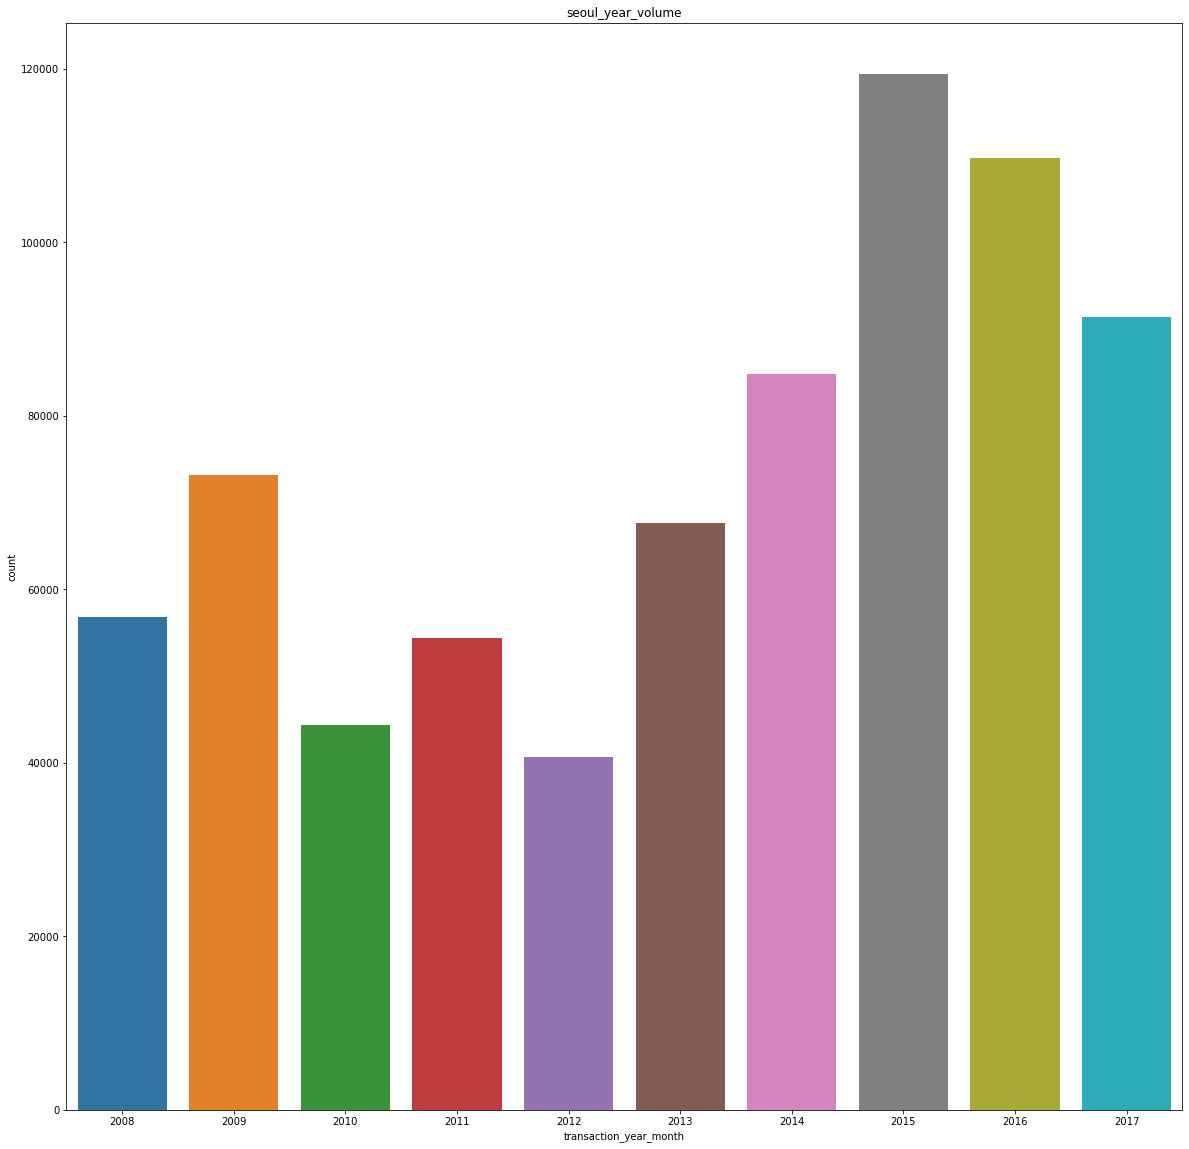

In [46]:
# 연도 별 총 거래량

plt.subplots(1,1, figsize=(20,20))

sns.countplot(data = seoul_year, x ='transaction_year_month')
plt.title('seoul_year_volume')
plt.show()

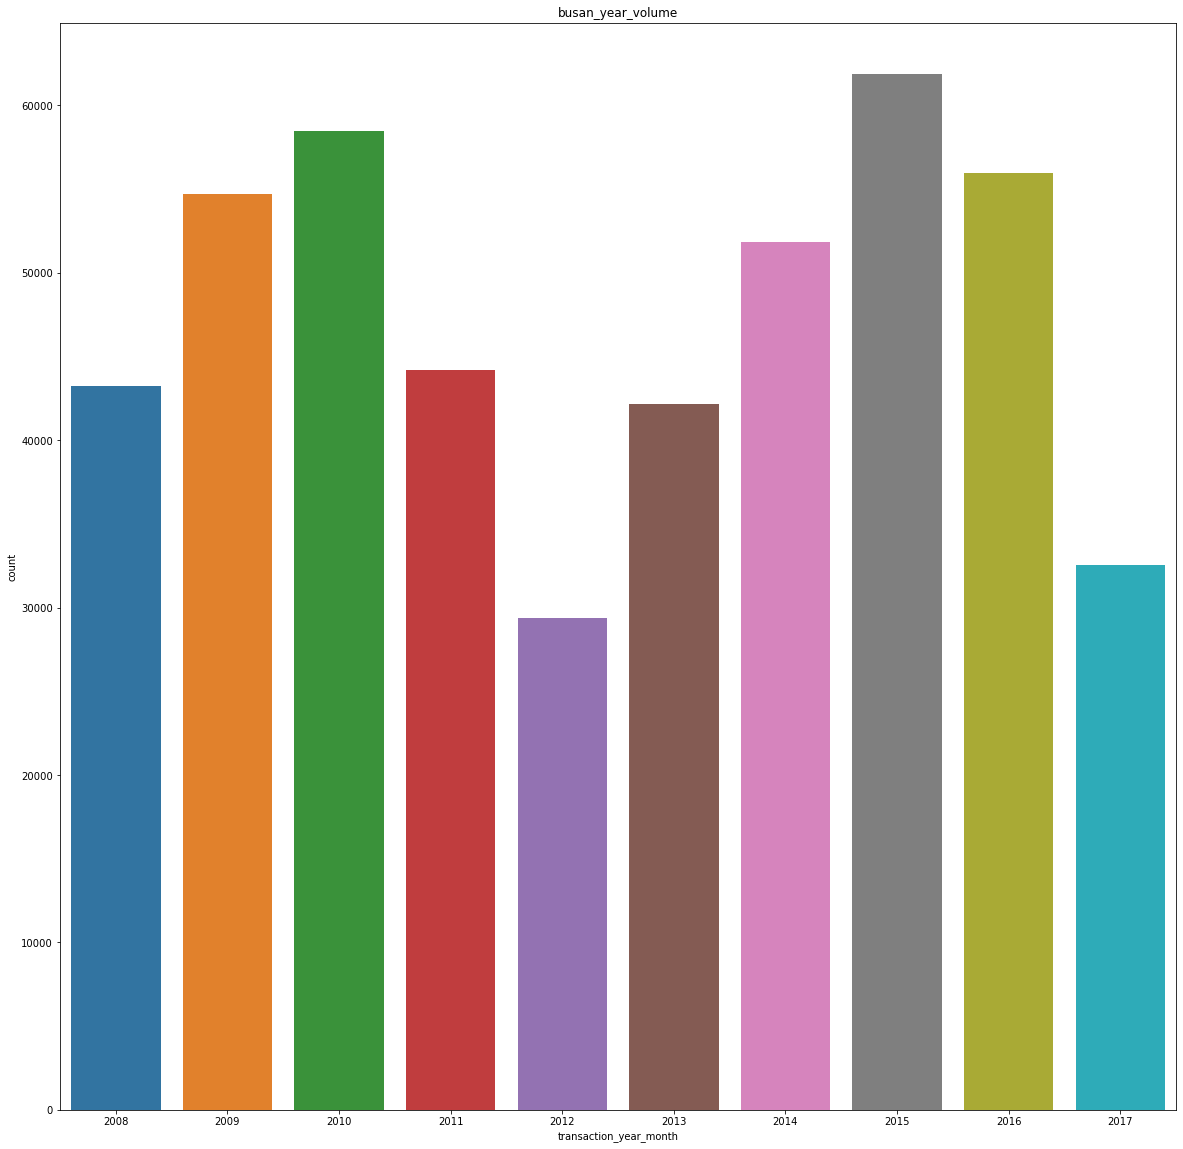

In [47]:
plt.subplots(1,1, figsize=(20,20))

sns.countplot(data = busan_year, x ='transaction_year_month')
plt.title('busan_year_volume')
plt.show()

####    3-2. 연/월별 거래량 그래프 그리기

#### 서울 연도 간 월 별 거래량

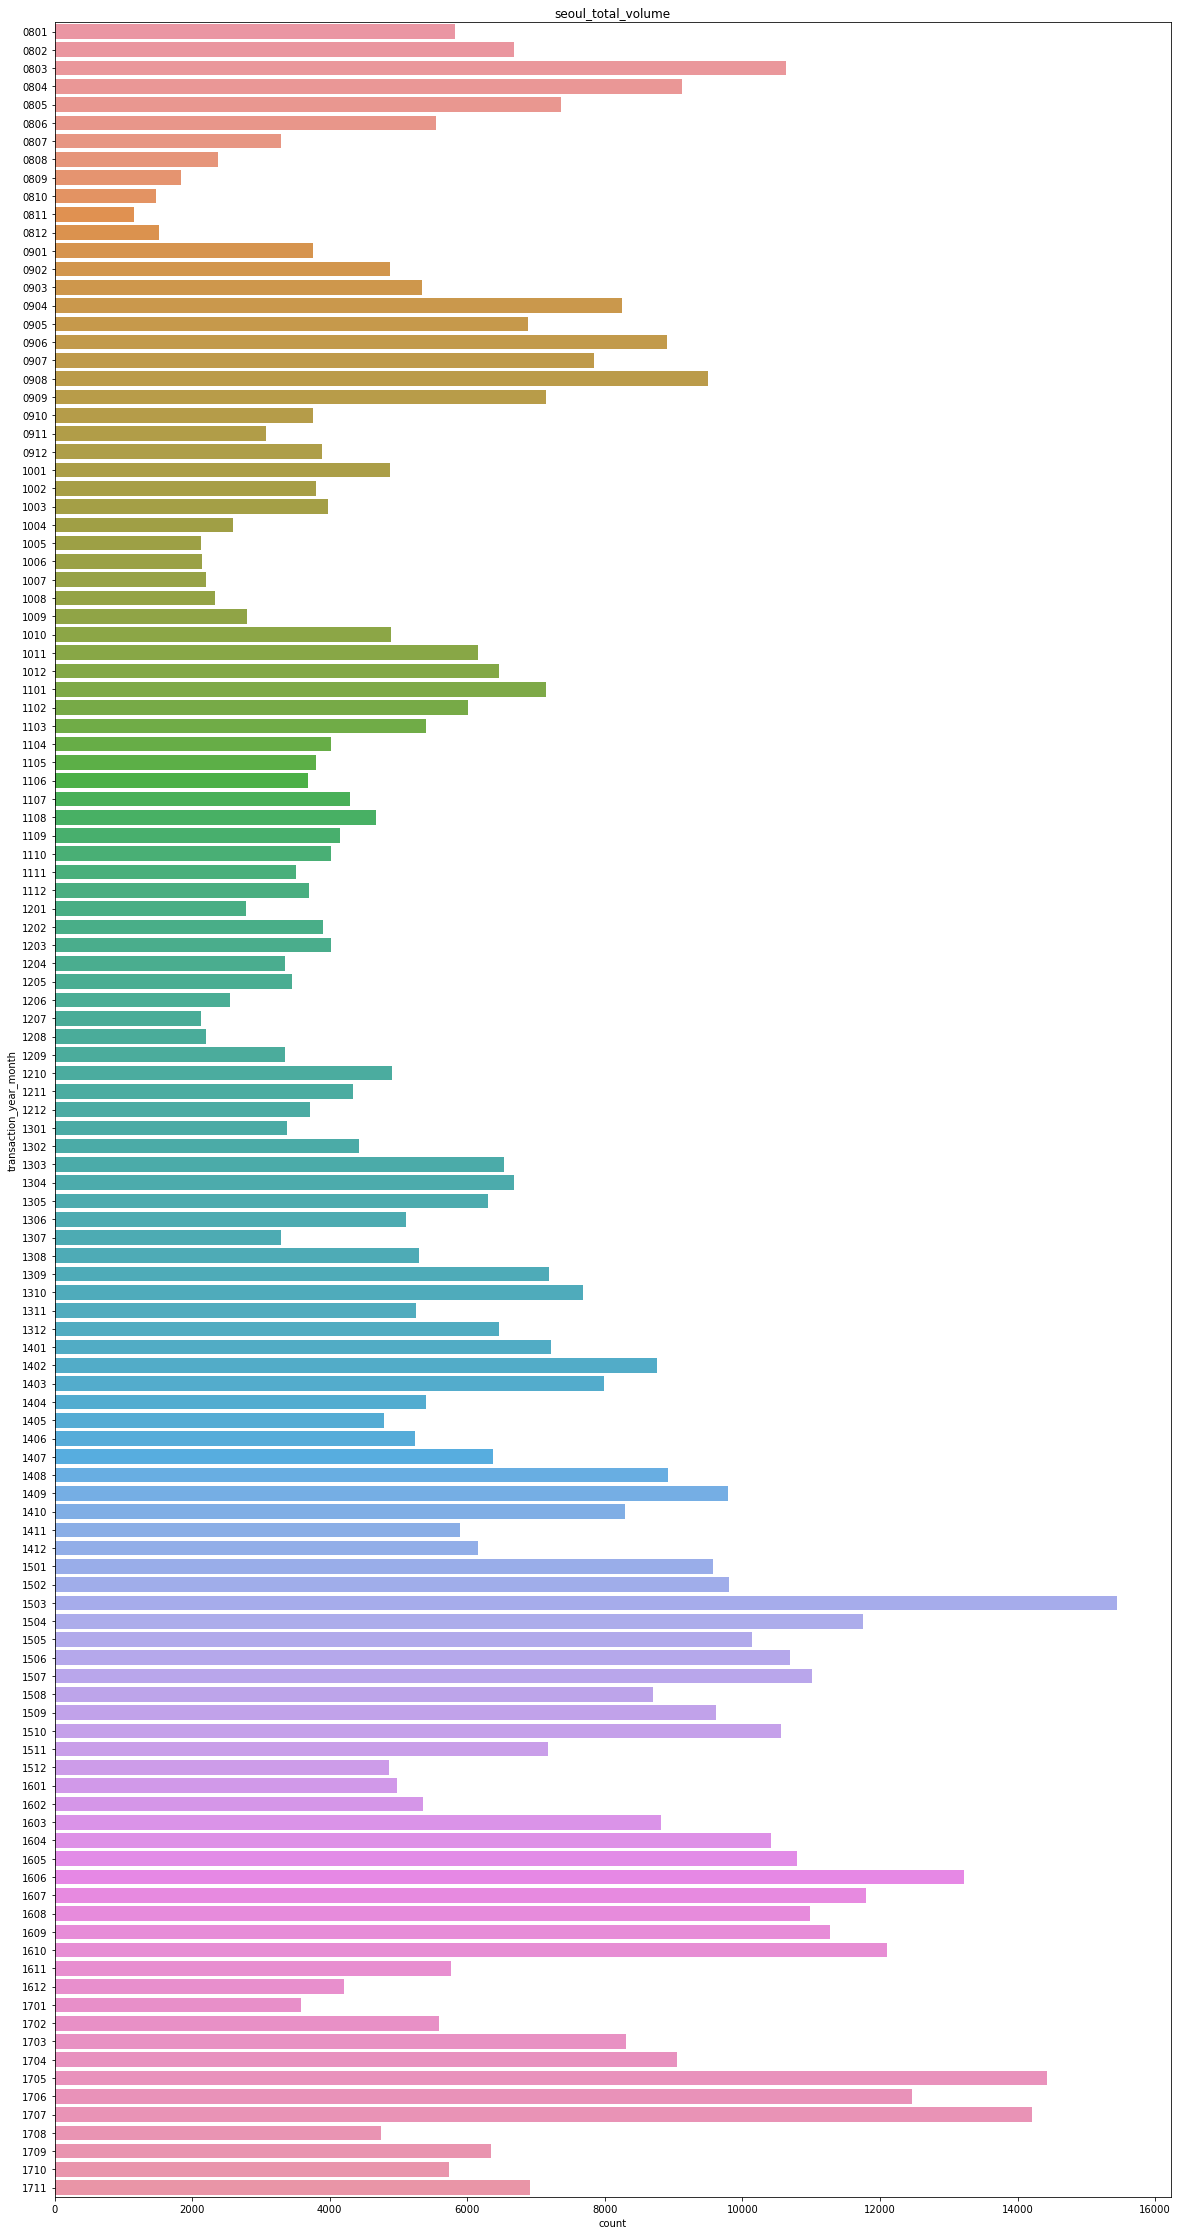

In [48]:
plt.subplots(1,1, figsize=(20,40))

sns.countplot(data = seoul_month, y ='transaction_year_month')
plt.title('seoul_total_volume')
plt.show()

#### 부산 연도 간 월 별 거래량

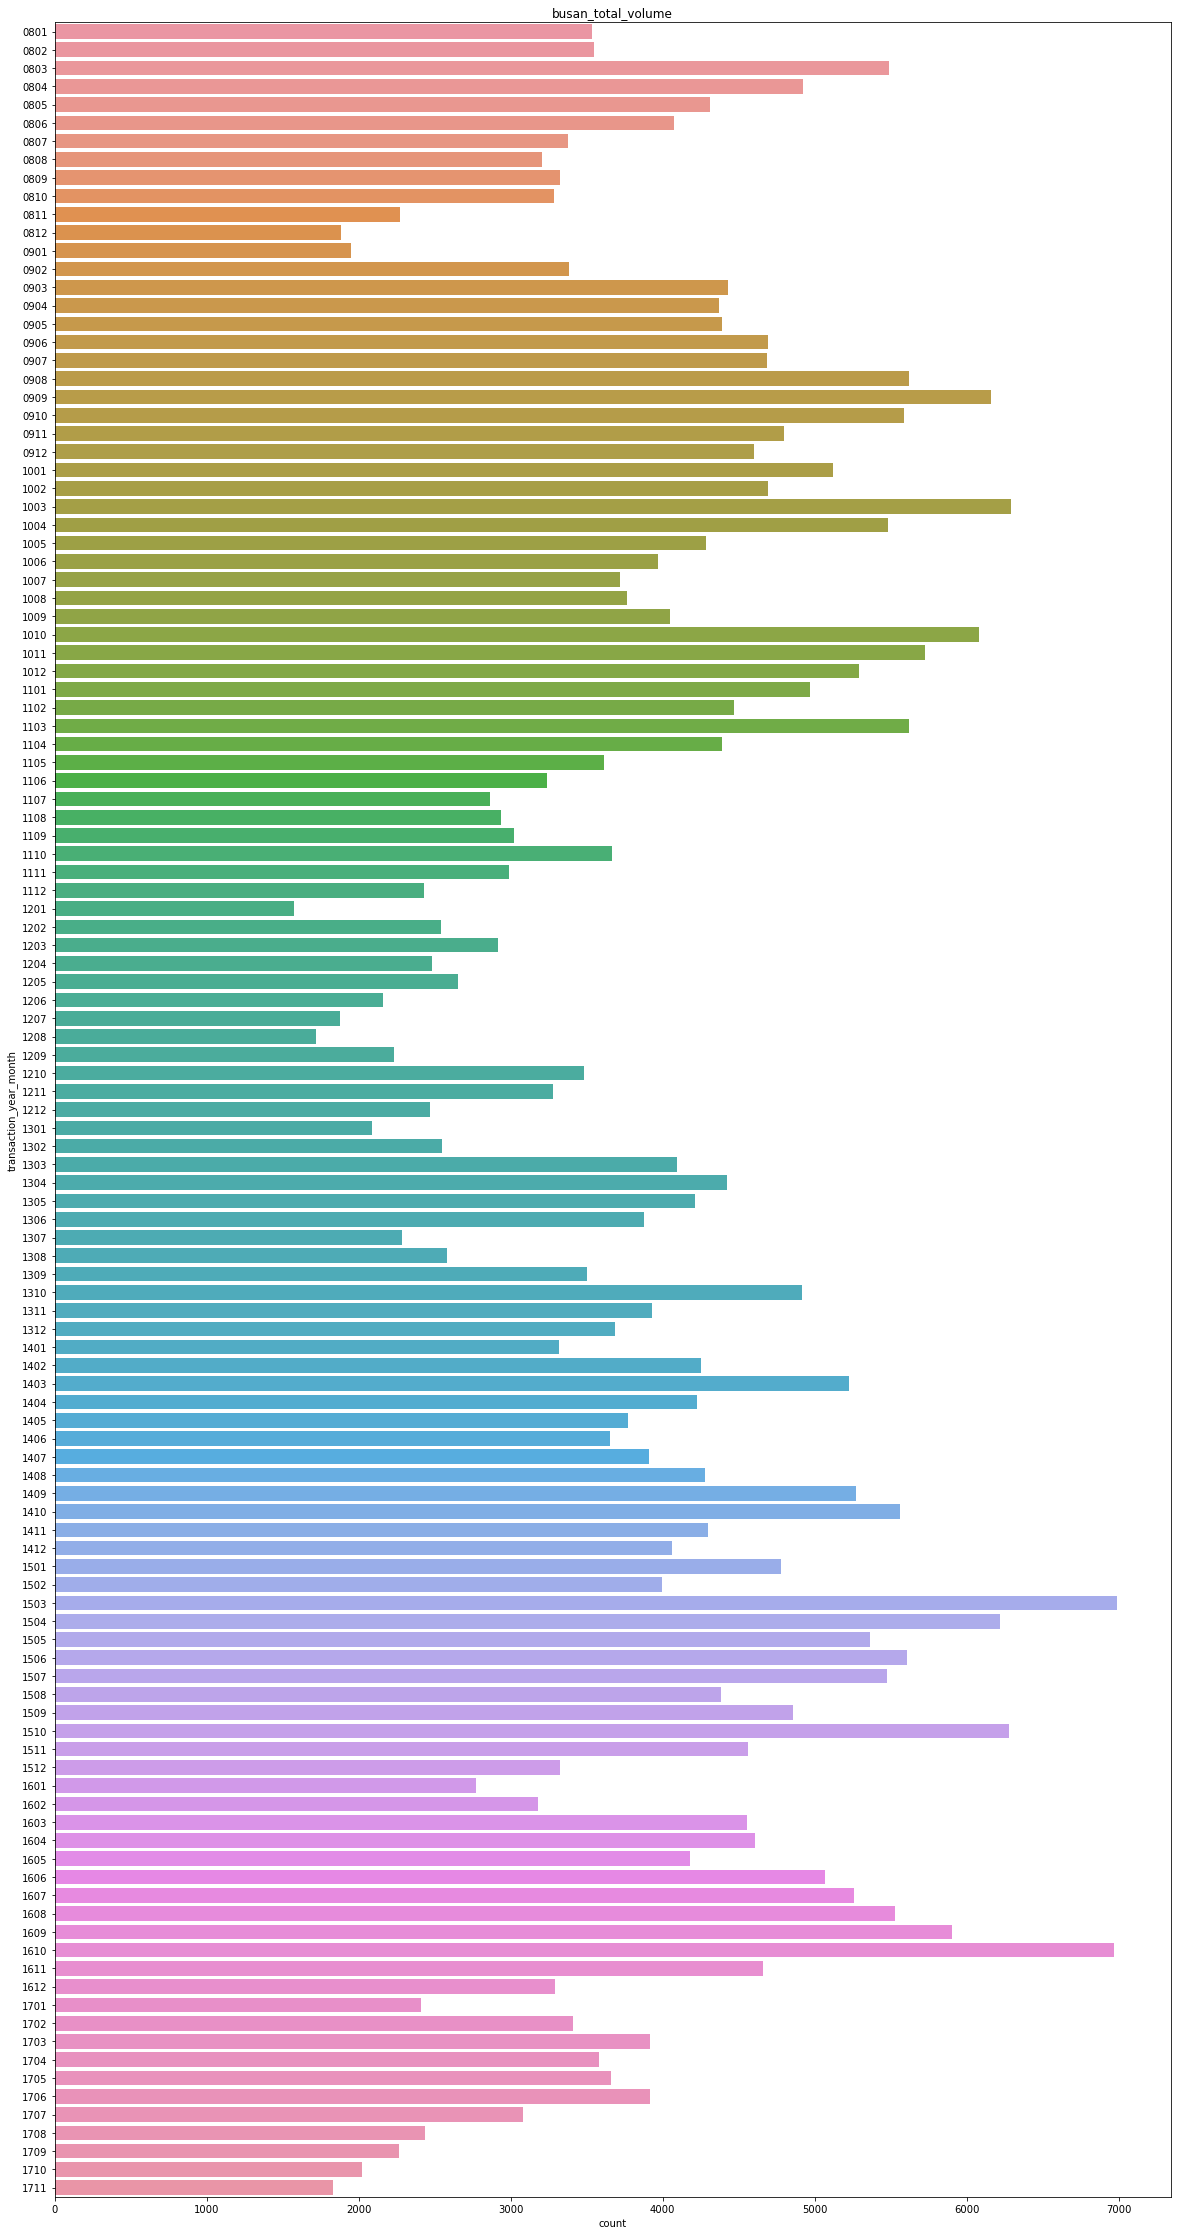

In [49]:
plt.subplots(1,1, figsize=(20,40))

sns.countplot(data = busan_month, y ='transaction_year_month')
plt.title('busan_total_volume')
plt.show()

## 월 별 거래량 그래프

### 서울시 월 별 거래량 그래프

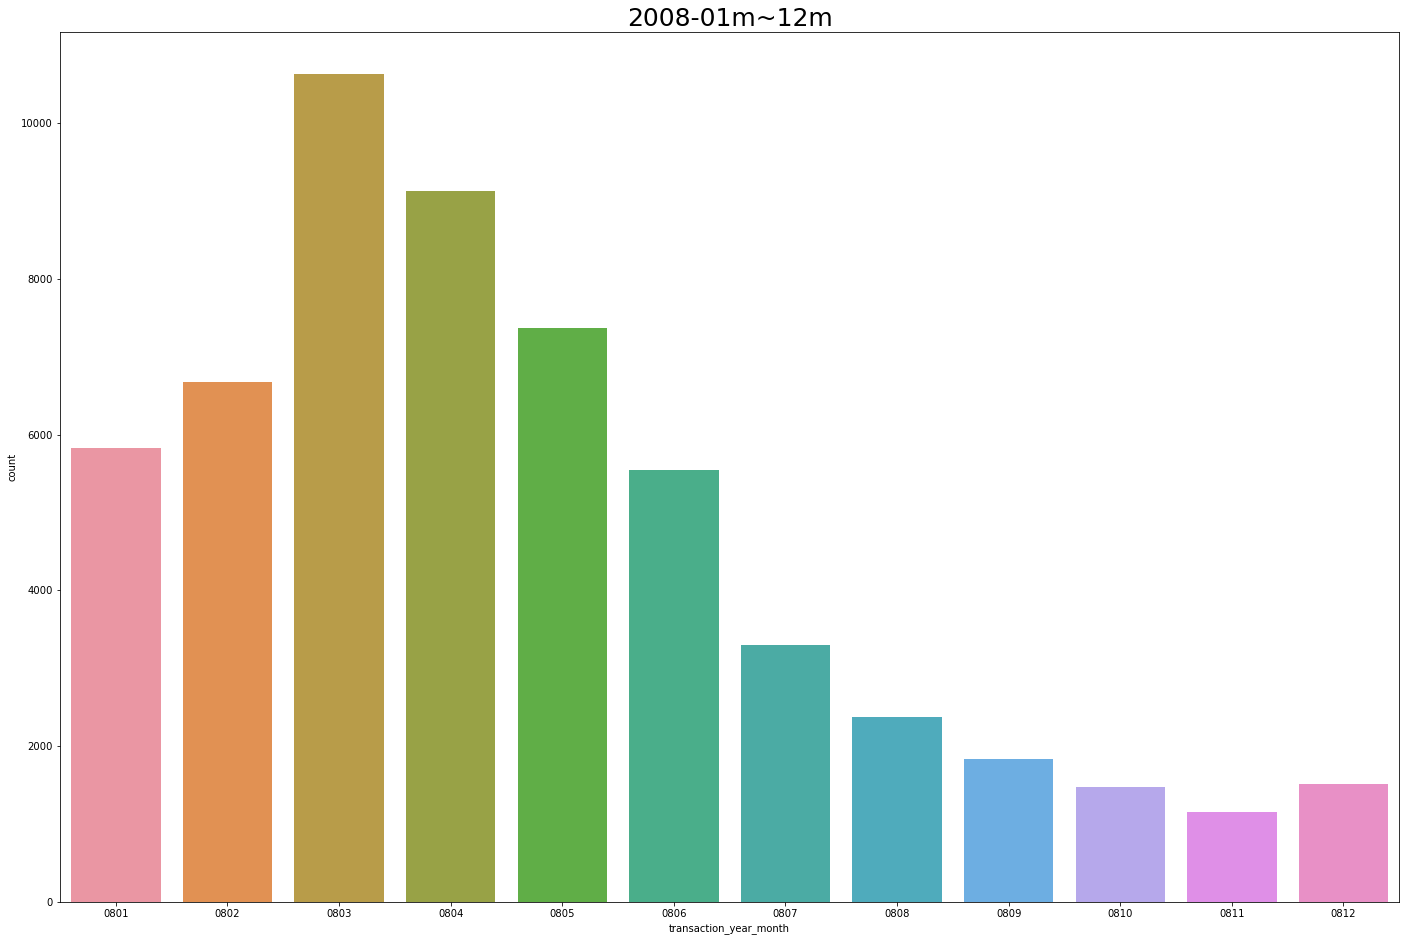

In [50]:
x = [s_month_08, s_month_09, s_month_10,s_month_11,s_month_12, s_month_13, s_month_14, s_month_15 ,s_month_16,s_month_17]
y = [b_month_08, b_month_09, b_month_10,b_month_11,b_month_12, b_month_13, b_month_14, b_month_15 ,b_month_16,b_month_17]

plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[0], x = 'transaction_year_month')
plt.title('2008-01m~12m', fontsize=25)

plt.show()

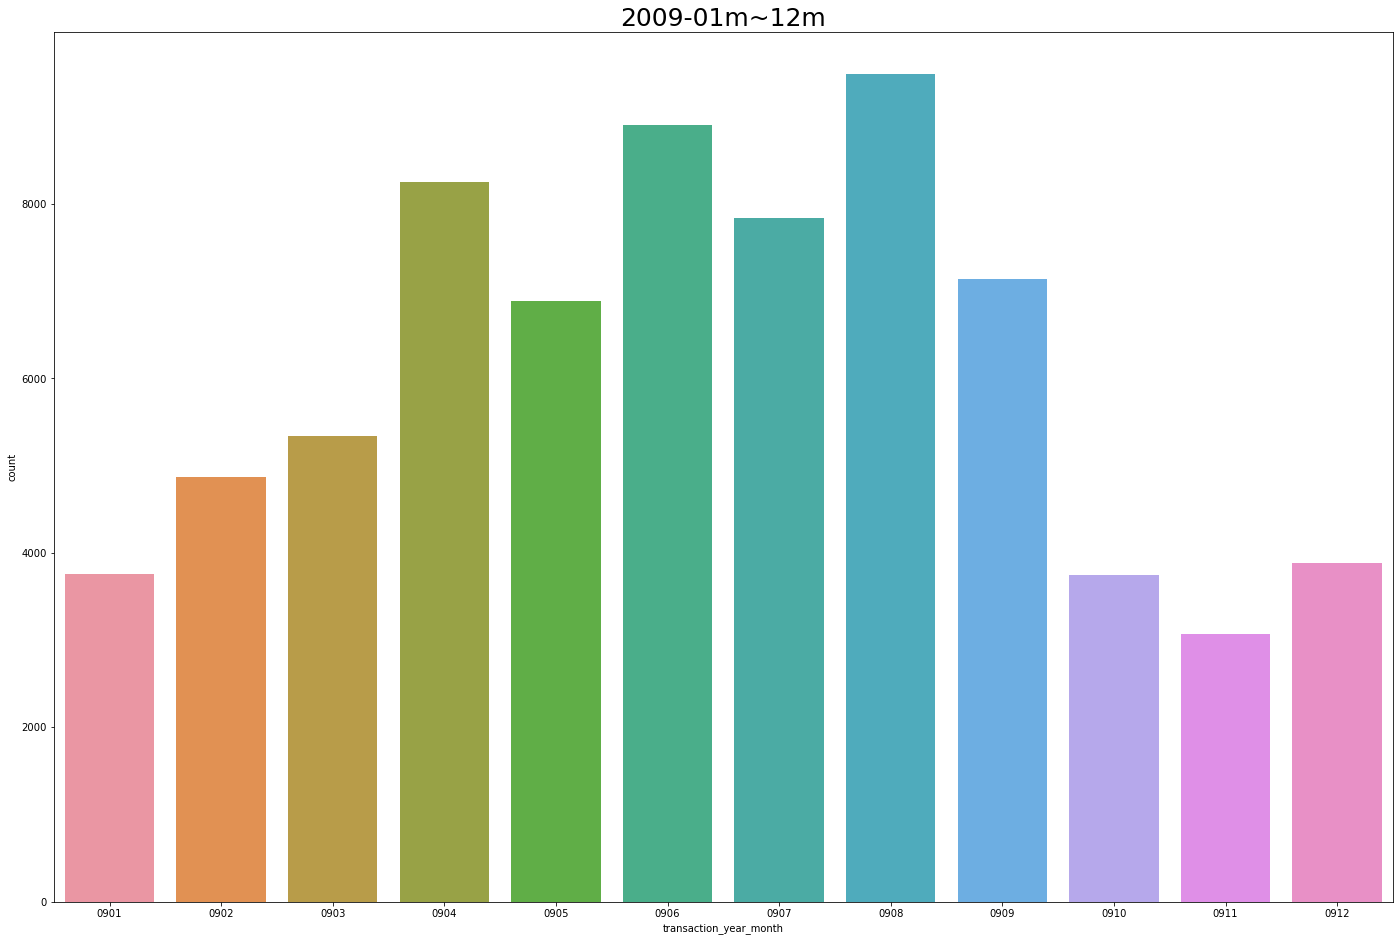

In [51]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[1], x = 'transaction_year_month')
plt.title('2009-01m~12m', fontsize=25)
    
plt.show()

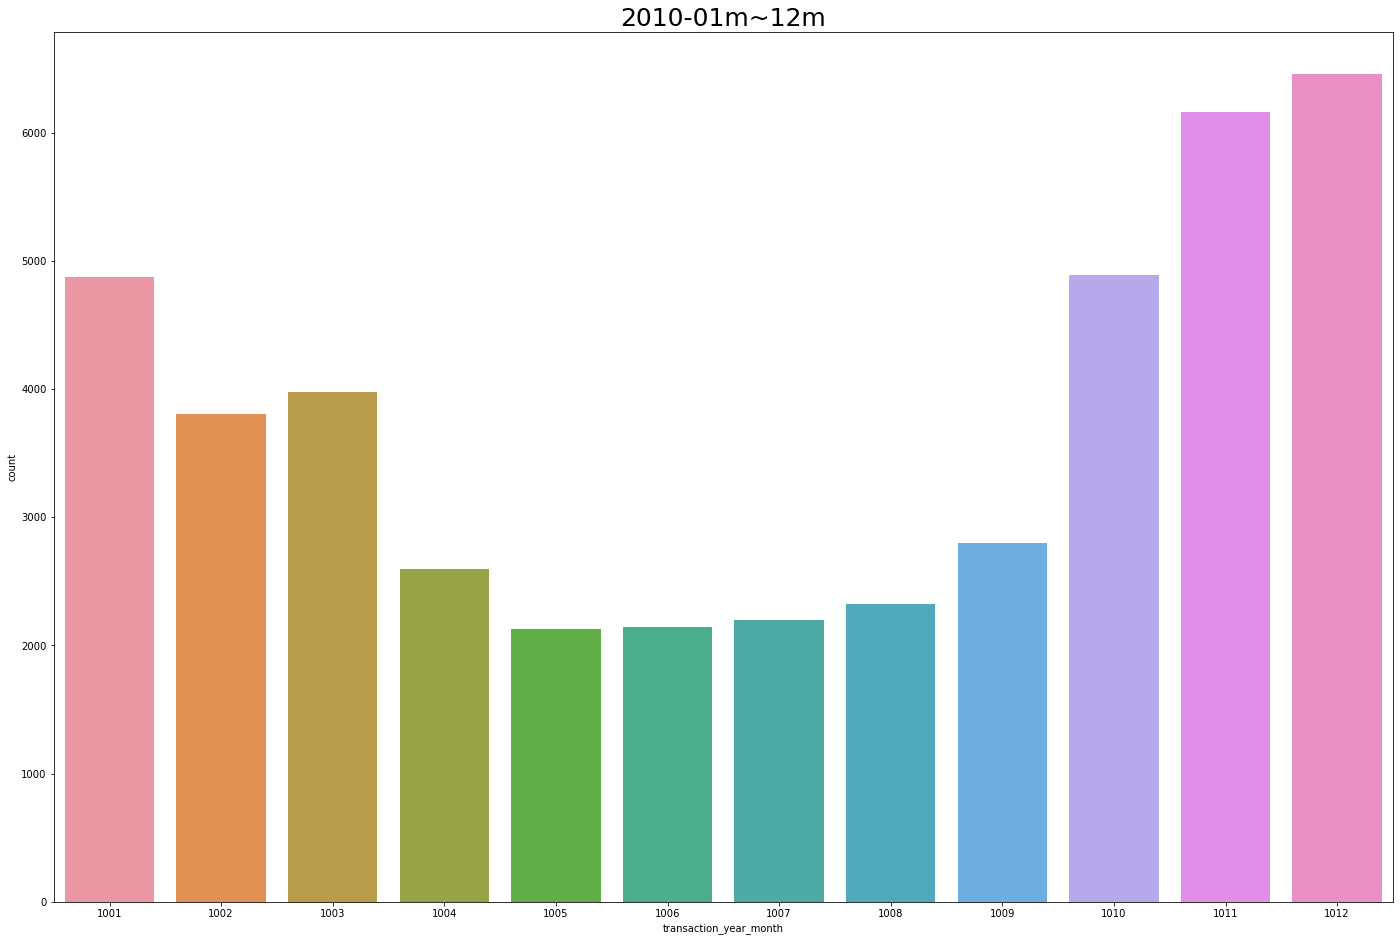

In [52]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[2], x = 'transaction_year_month')
plt.title('2010-01m~12m', fontsize=25)
    
plt.show()

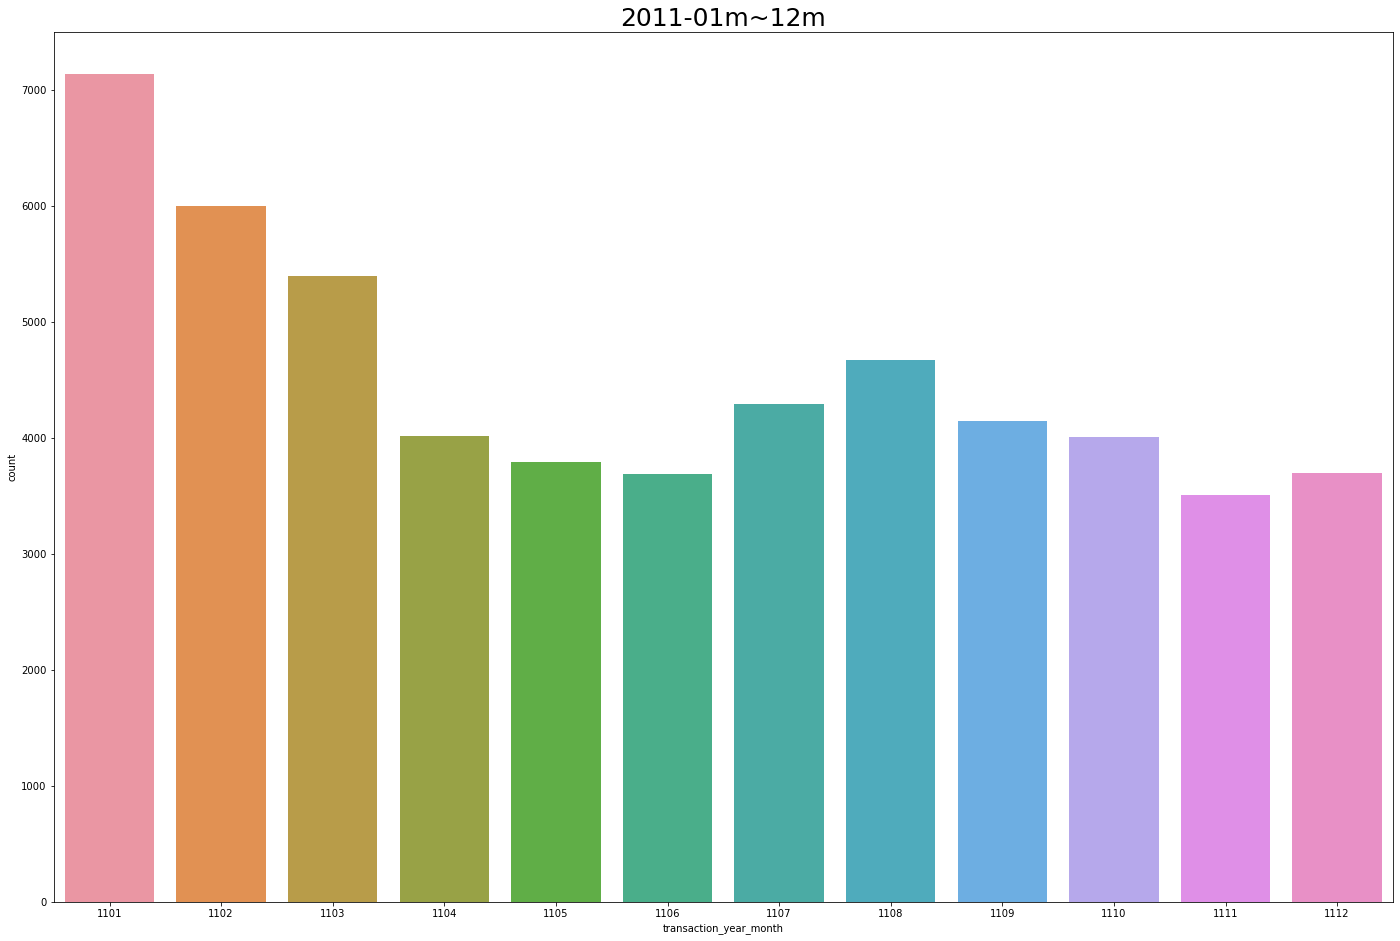

In [53]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[3], x = 'transaction_year_month')
plt.title('2011-01m~12m', fontsize=25)
    
plt.show()

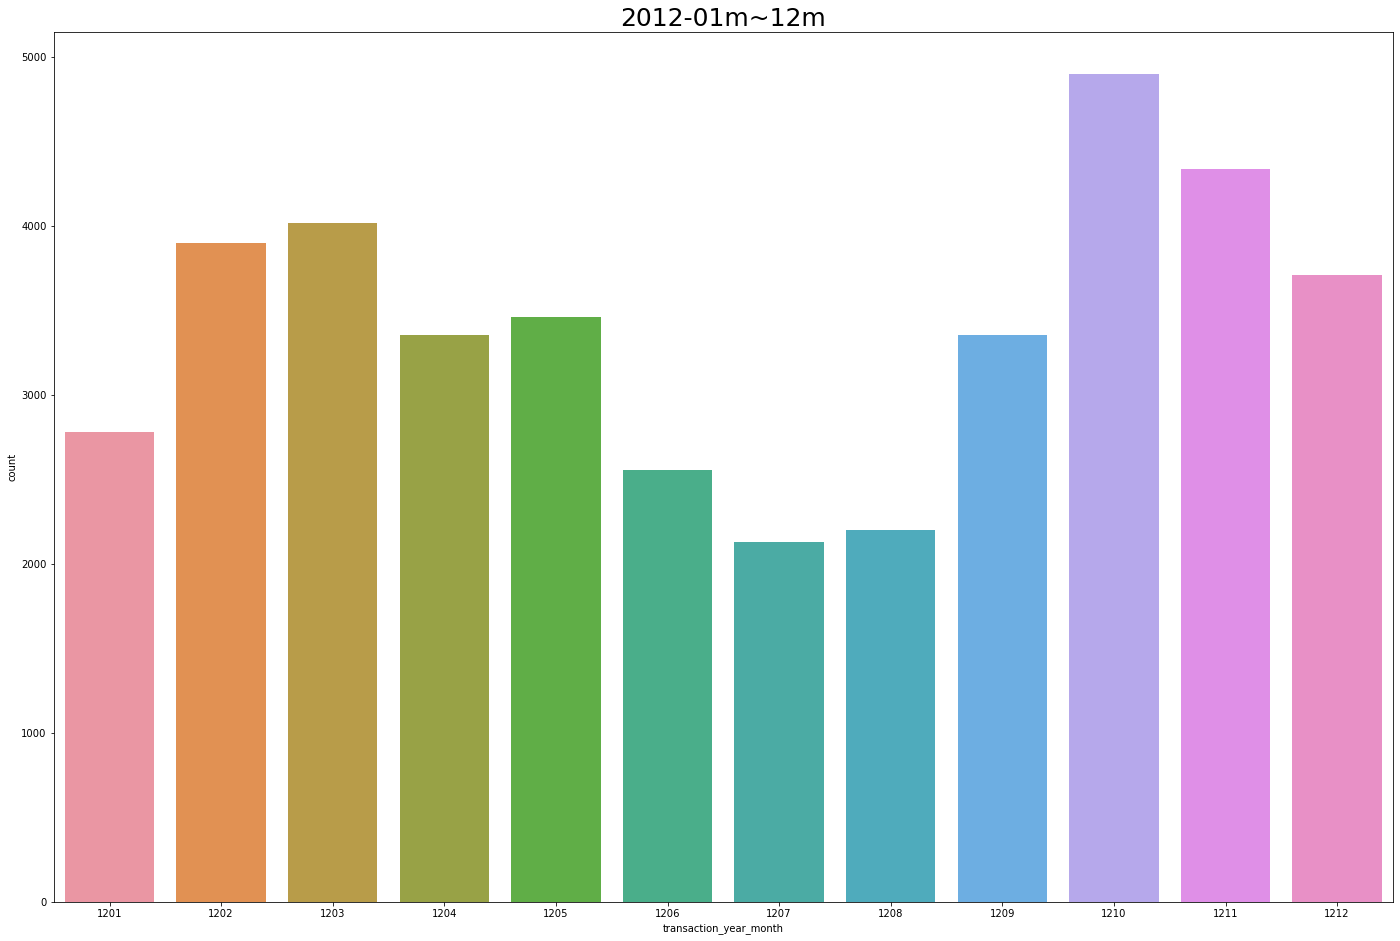

In [54]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[4], x = 'transaction_year_month')
plt.title('2012-01m~12m', fontsize=25)
    
plt.show()

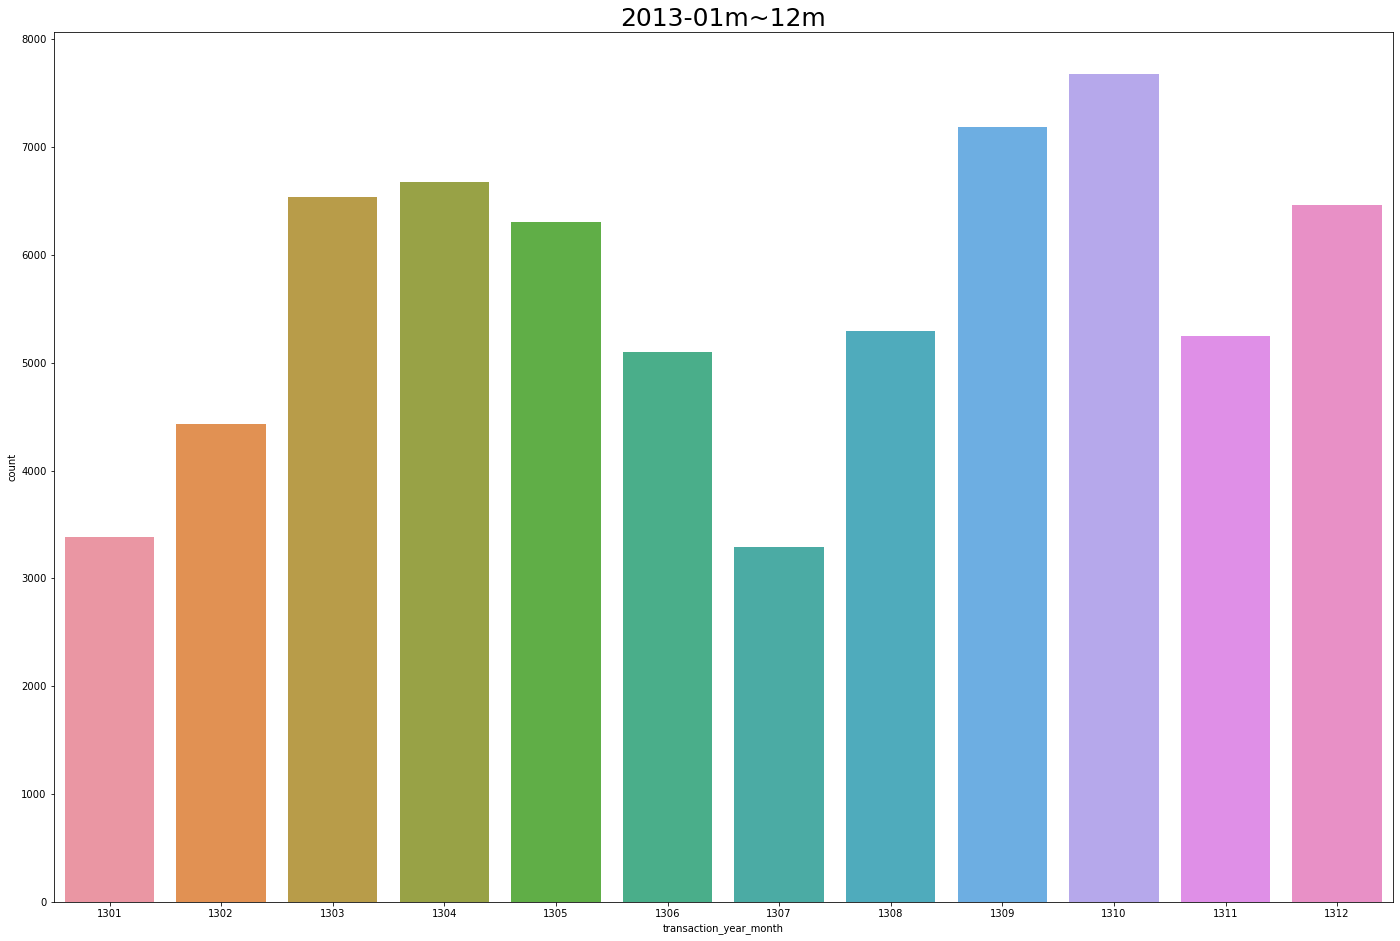

In [55]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[5], x = 'transaction_year_month')
plt.title('2013-01m~12m', fontsize=25)
    
plt.show()

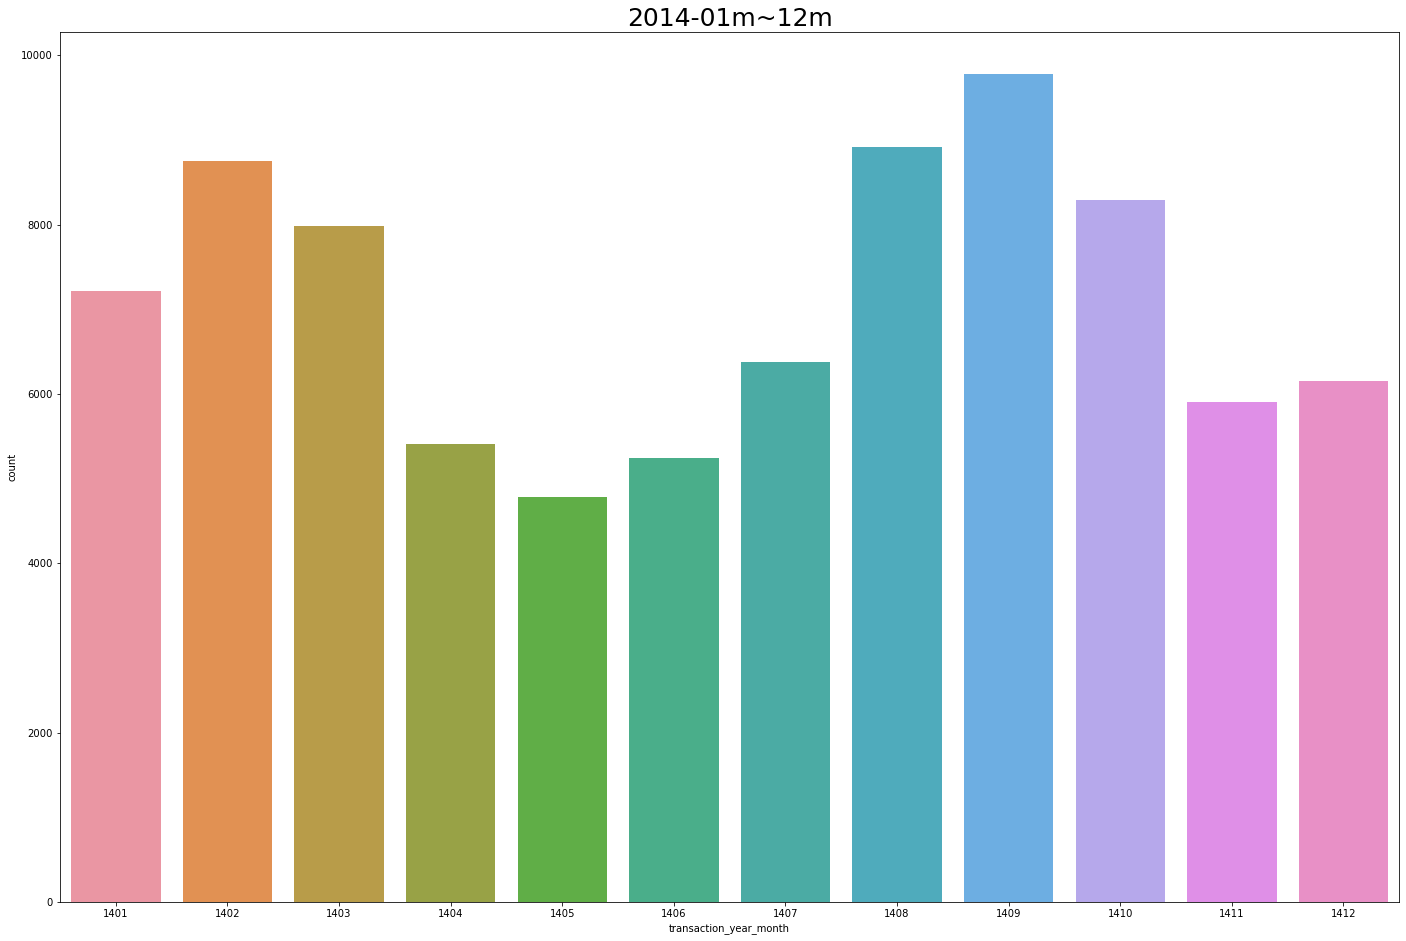

In [56]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[6], x = 'transaction_year_month')
plt.title('2014-01m~12m', fontsize=25)
    
plt.show()

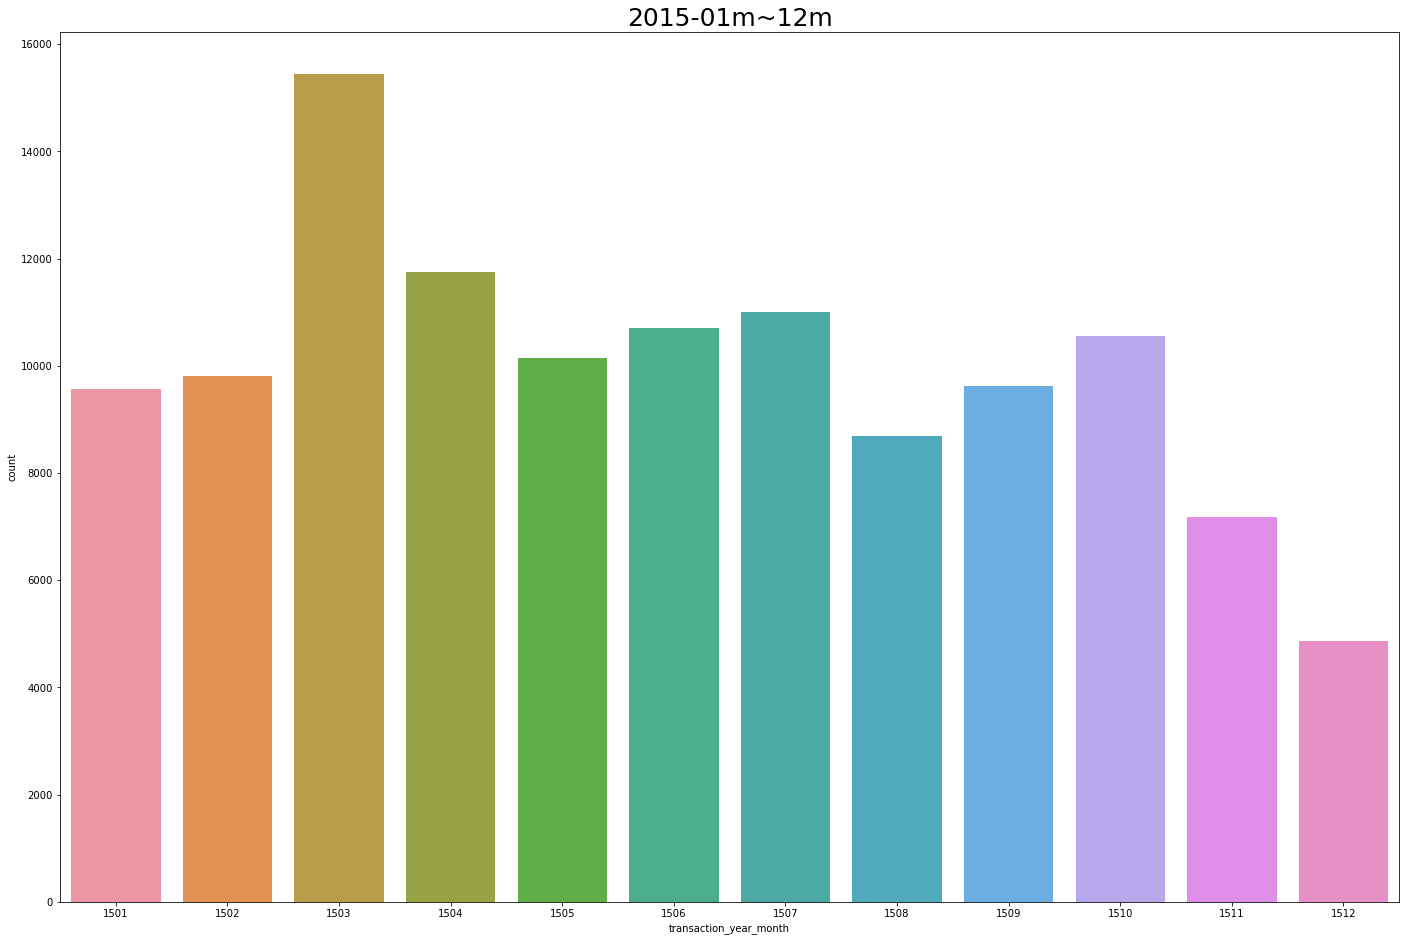

In [57]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[7], x = 'transaction_year_month')
plt.title('2015-01m~12m', fontsize=25)
    
plt.show()

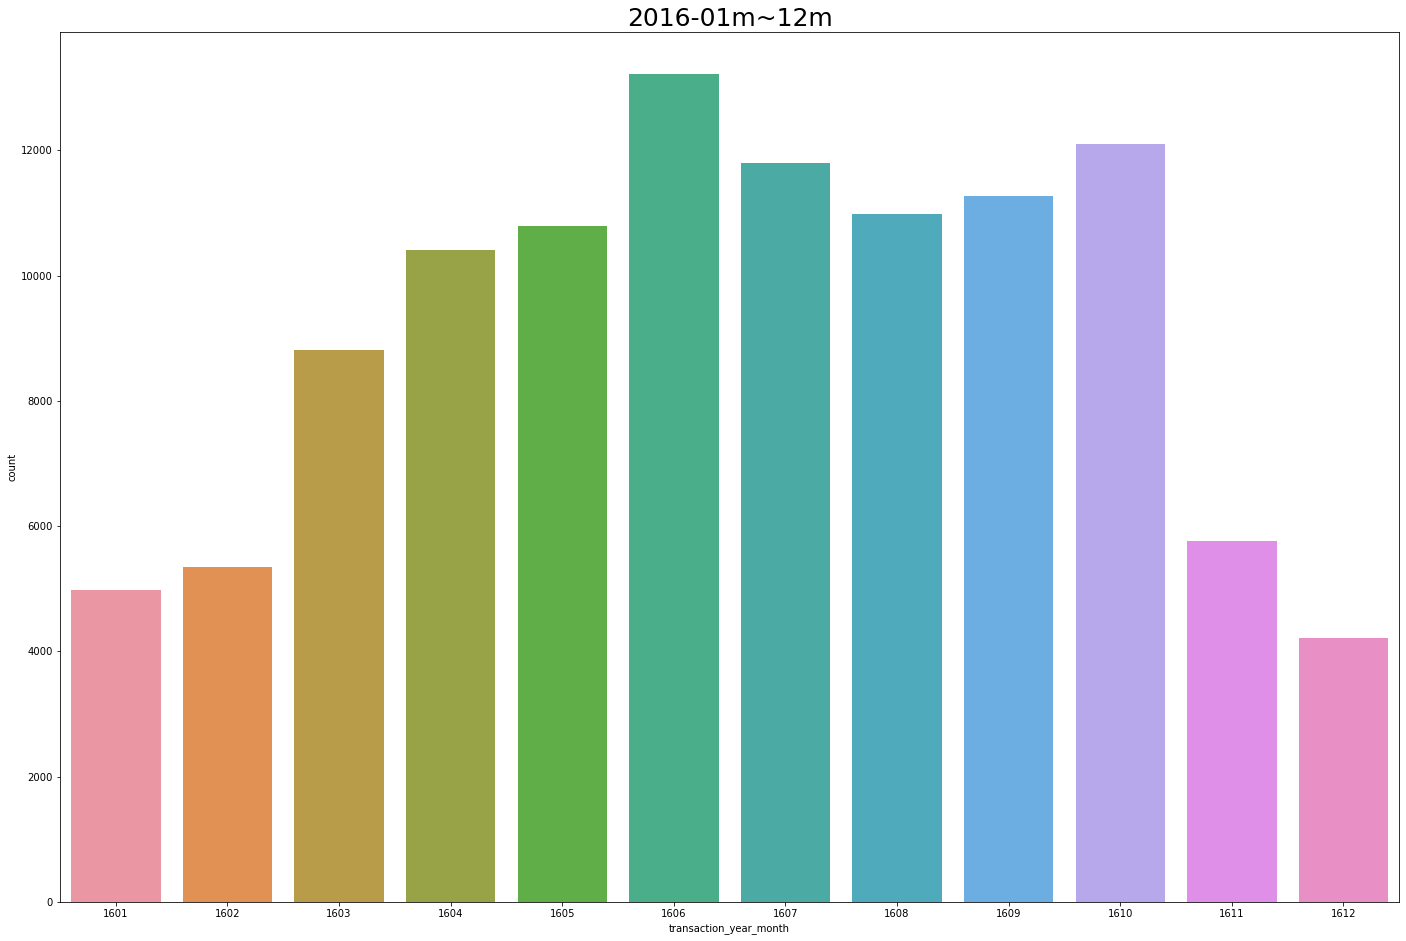

In [58]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[8], x = 'transaction_year_month')
plt.title('2016-01m~12m', fontsize=25)
    
plt.show()

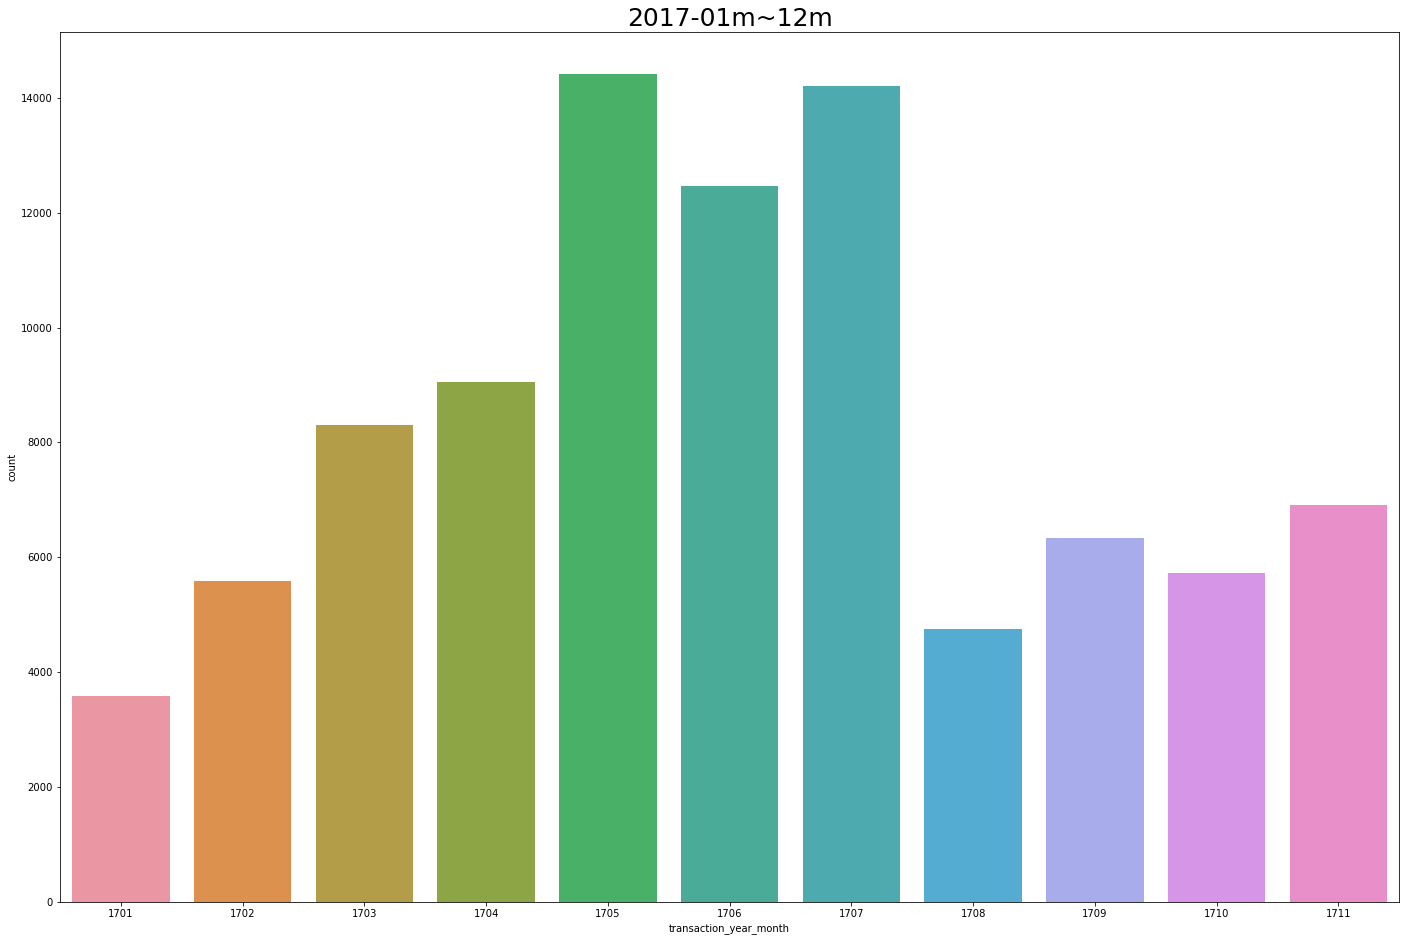

In [59]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = x[9], x = 'transaction_year_month')
plt.title('2017-01m~12m', fontsize=25)
    
plt.show()

### 부산시 월 별 거래량 그래프

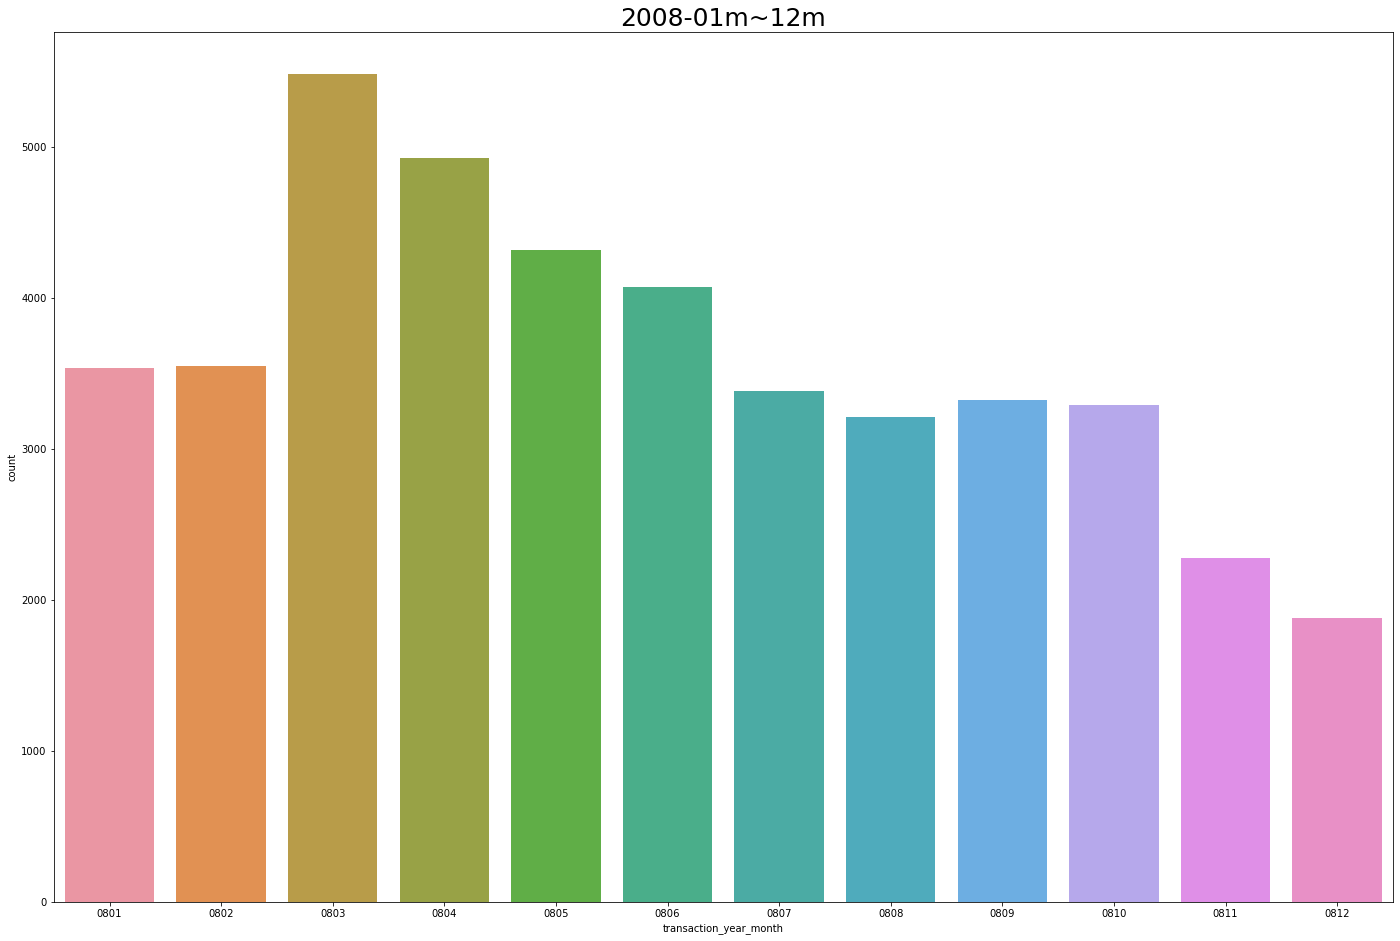

In [60]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[0], x = 'transaction_year_month')
plt.title('2008-01m~12m', fontsize=25)

plt.show()

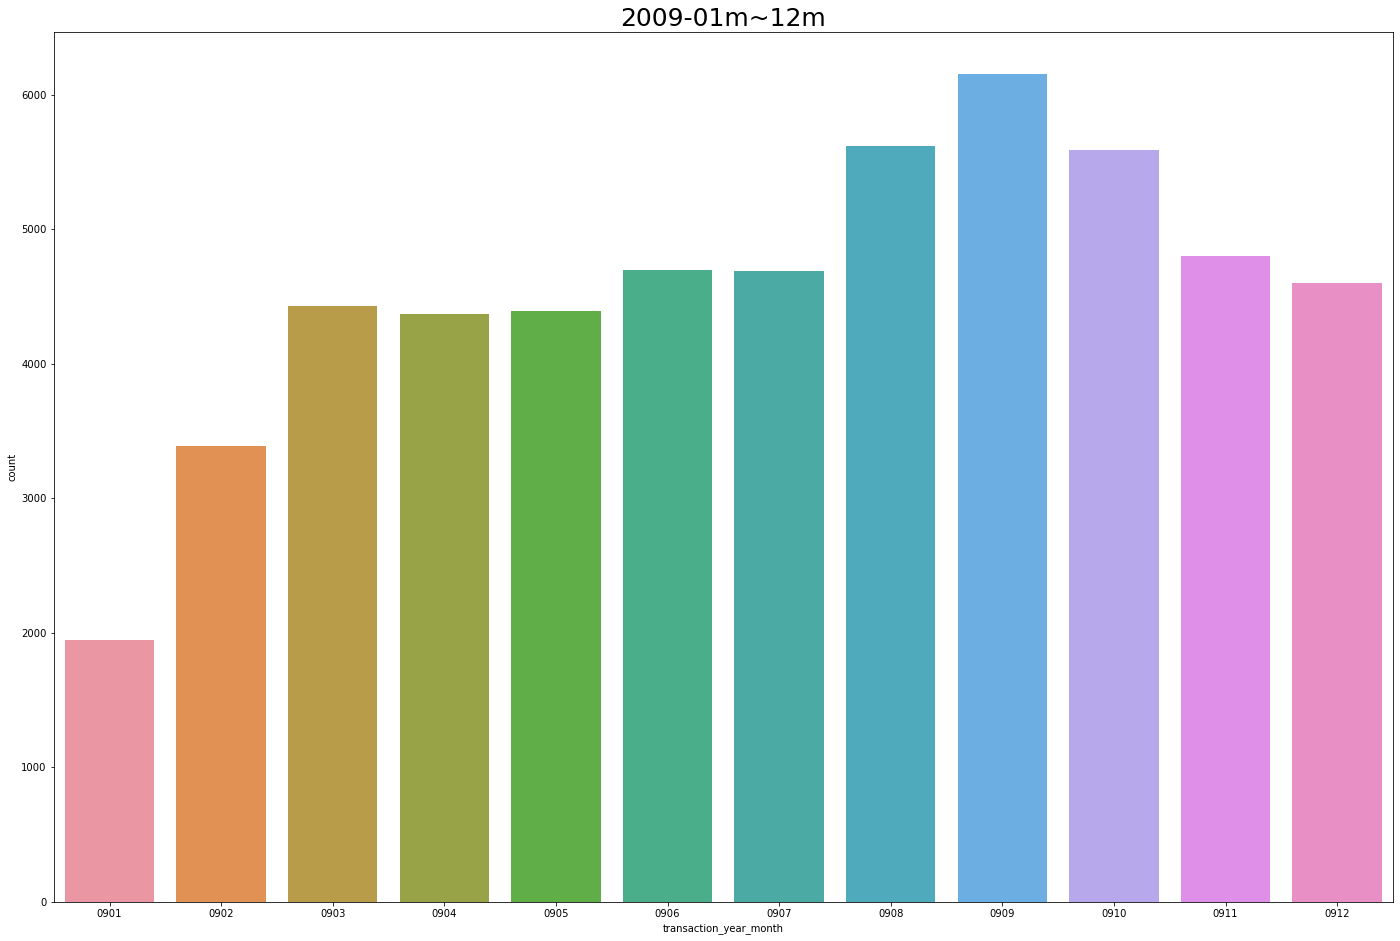

In [61]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[1], x = 'transaction_year_month')
plt.title('2009-01m~12m', fontsize=25)

plt.show()

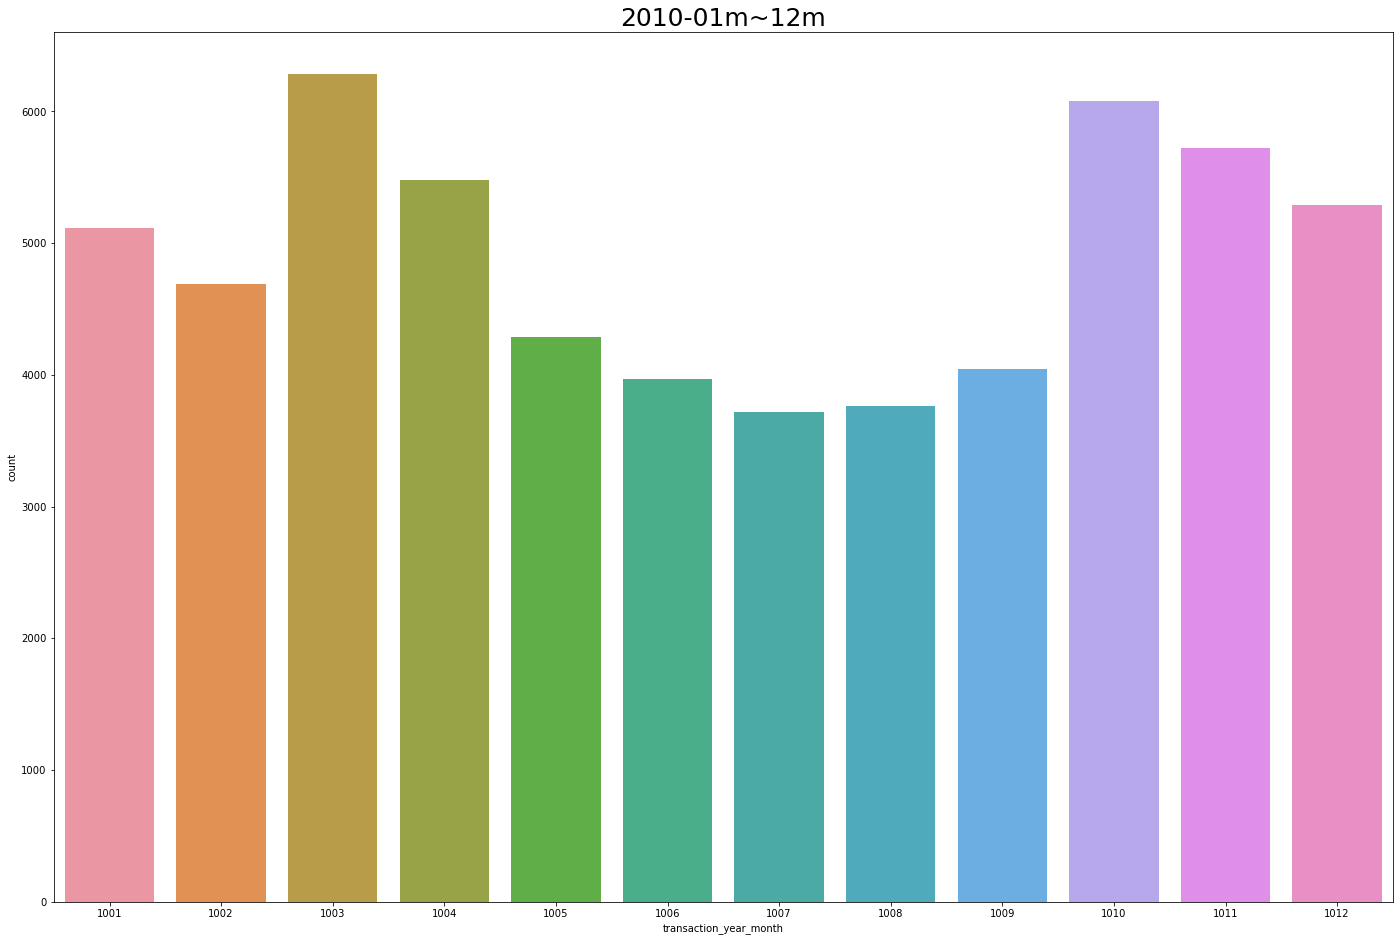

In [62]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[2], x = 'transaction_year_month')
plt.title('2010-01m~12m', fontsize=25)

plt.show()

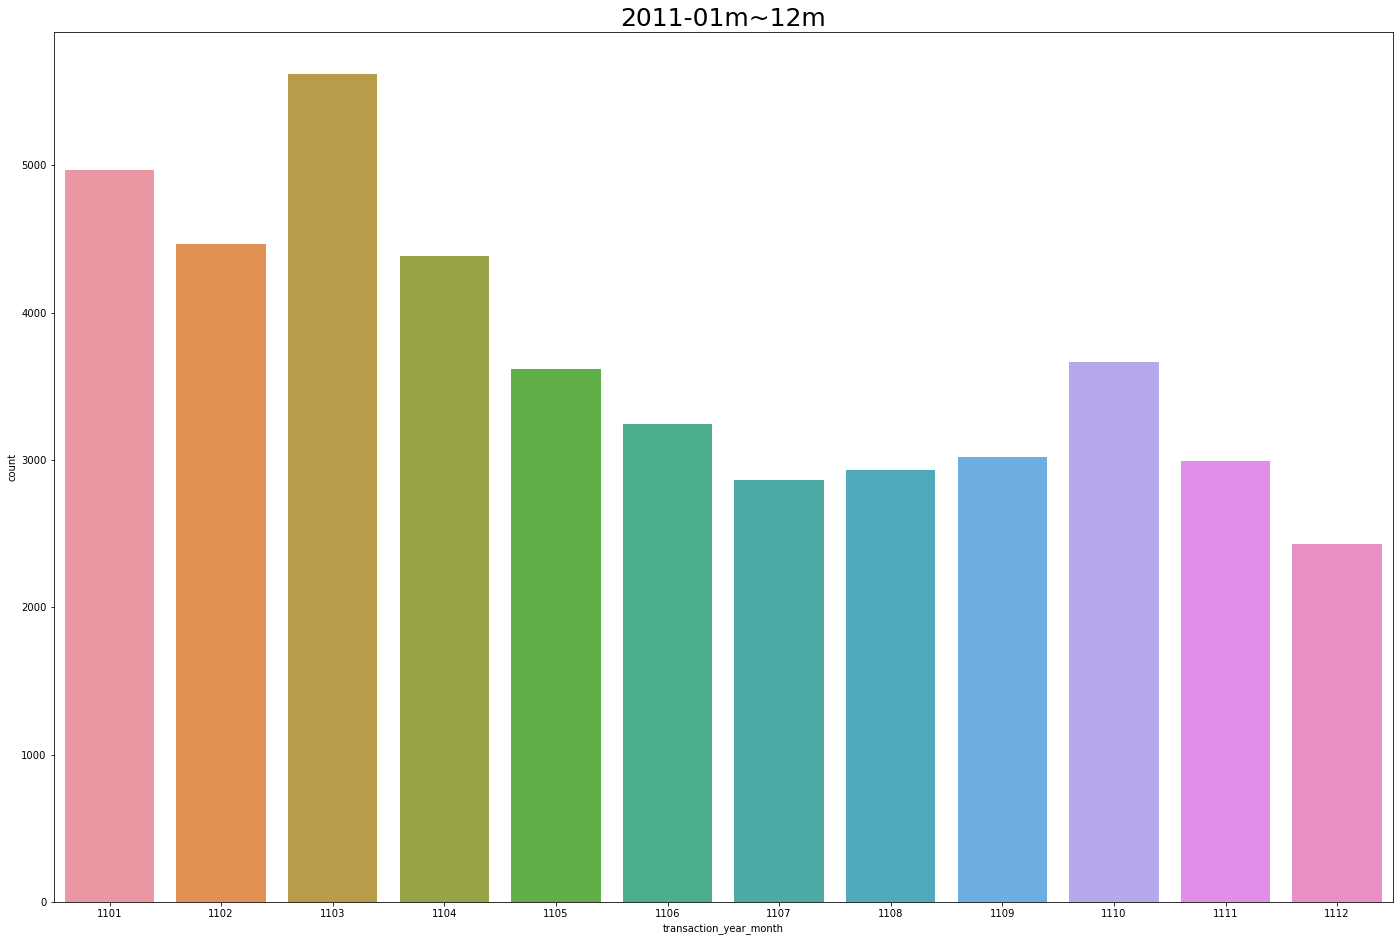

In [63]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[3], x = 'transaction_year_month')
plt.title('2011-01m~12m', fontsize=25)

plt.show()

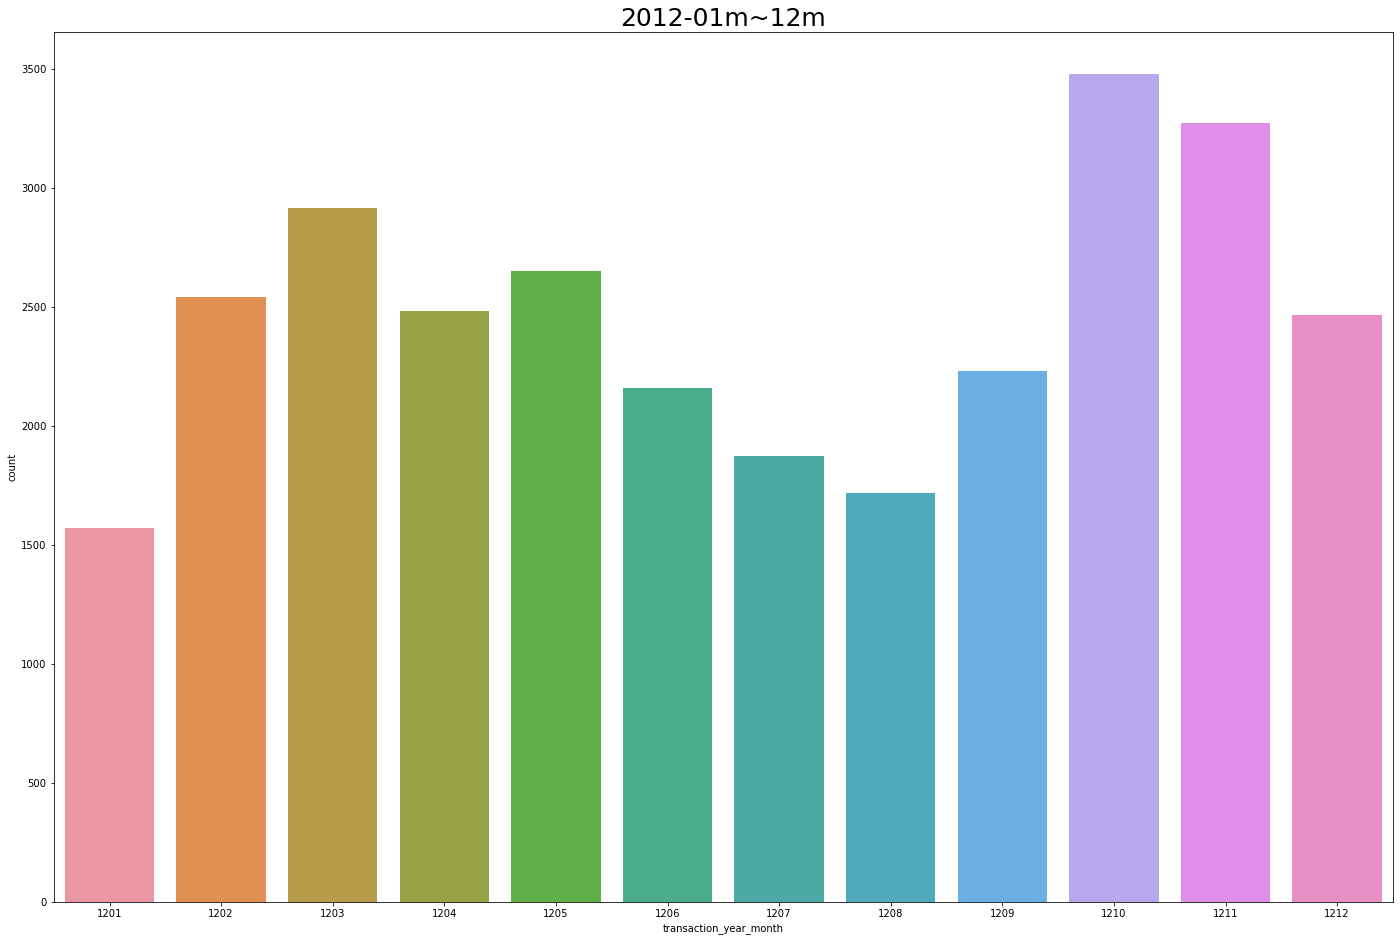

In [64]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[4], x = 'transaction_year_month')
plt.title('2012-01m~12m', fontsize=25)

plt.show()

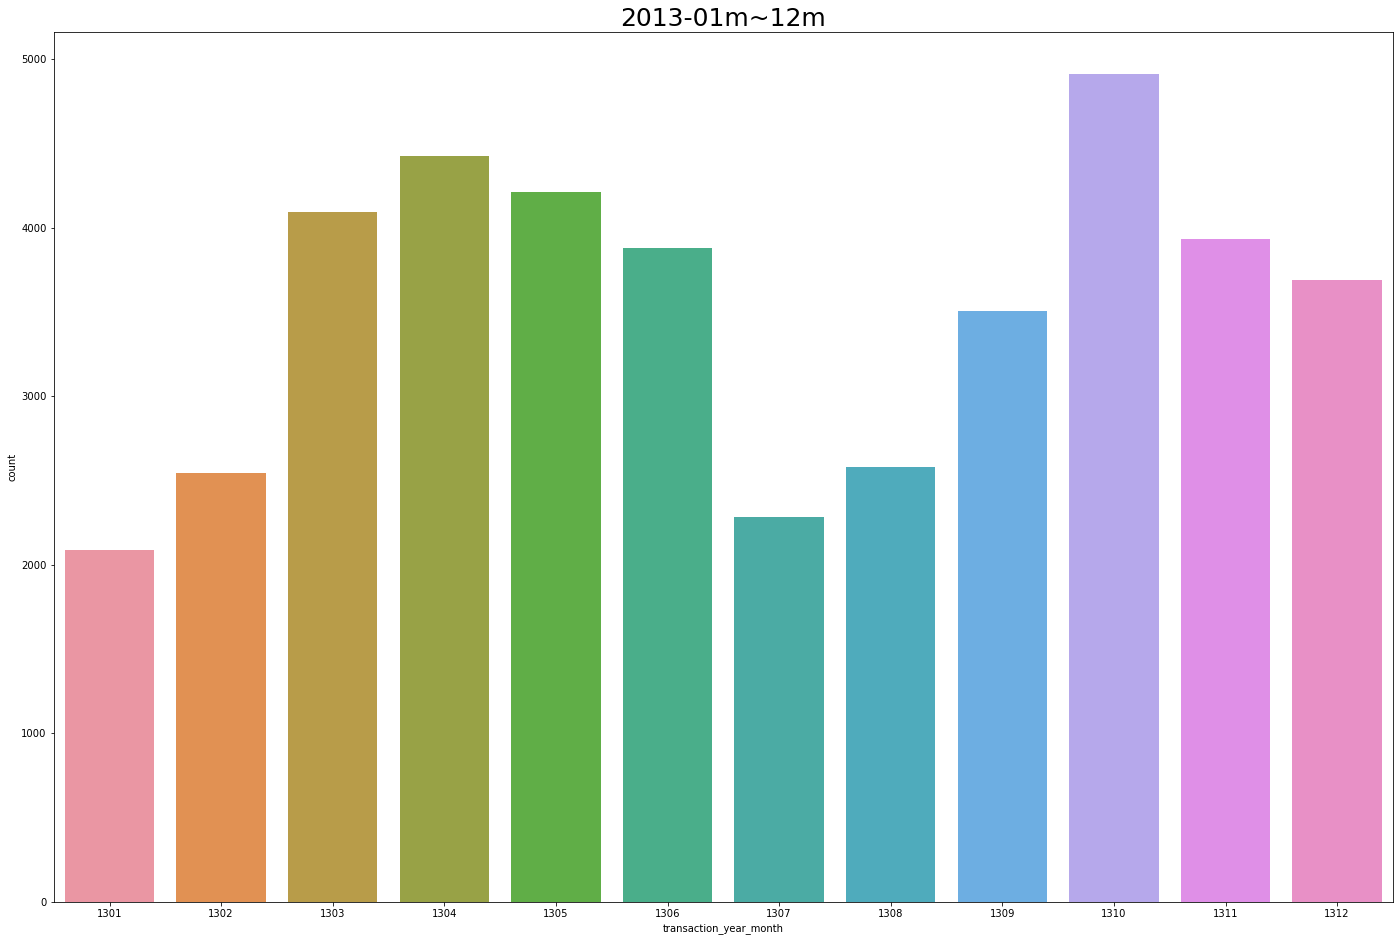

In [65]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[5], x = 'transaction_year_month')
plt.title('2013-01m~12m', fontsize=25)

plt.show()

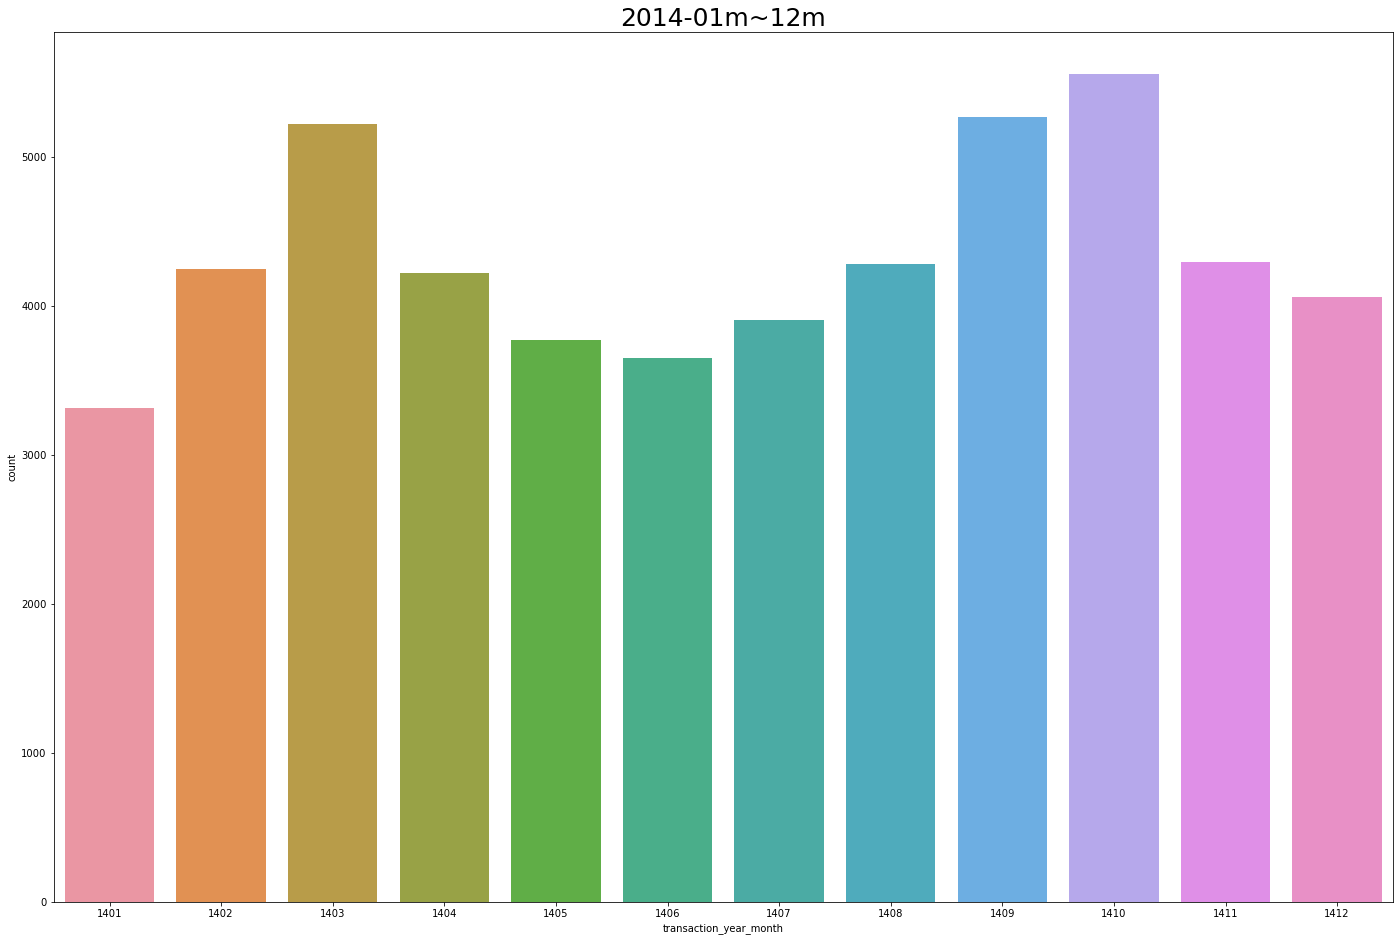

In [66]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[6], x = 'transaction_year_month')
plt.title('2014-01m~12m', fontsize=25)

plt.show()

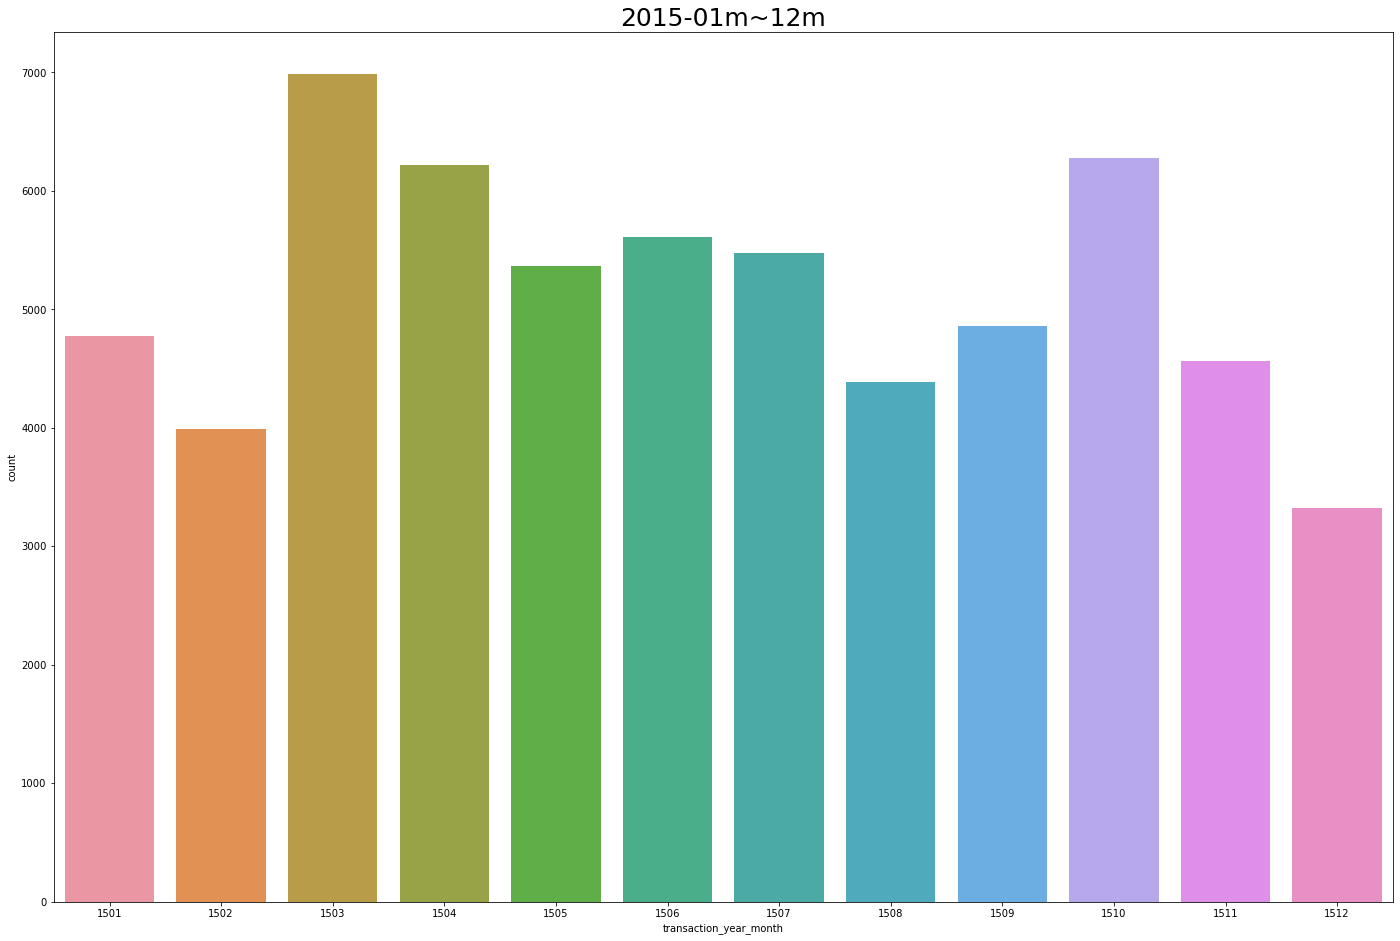

In [67]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[7], x = 'transaction_year_month')
plt.title('2015-01m~12m', fontsize=25)

plt.show()

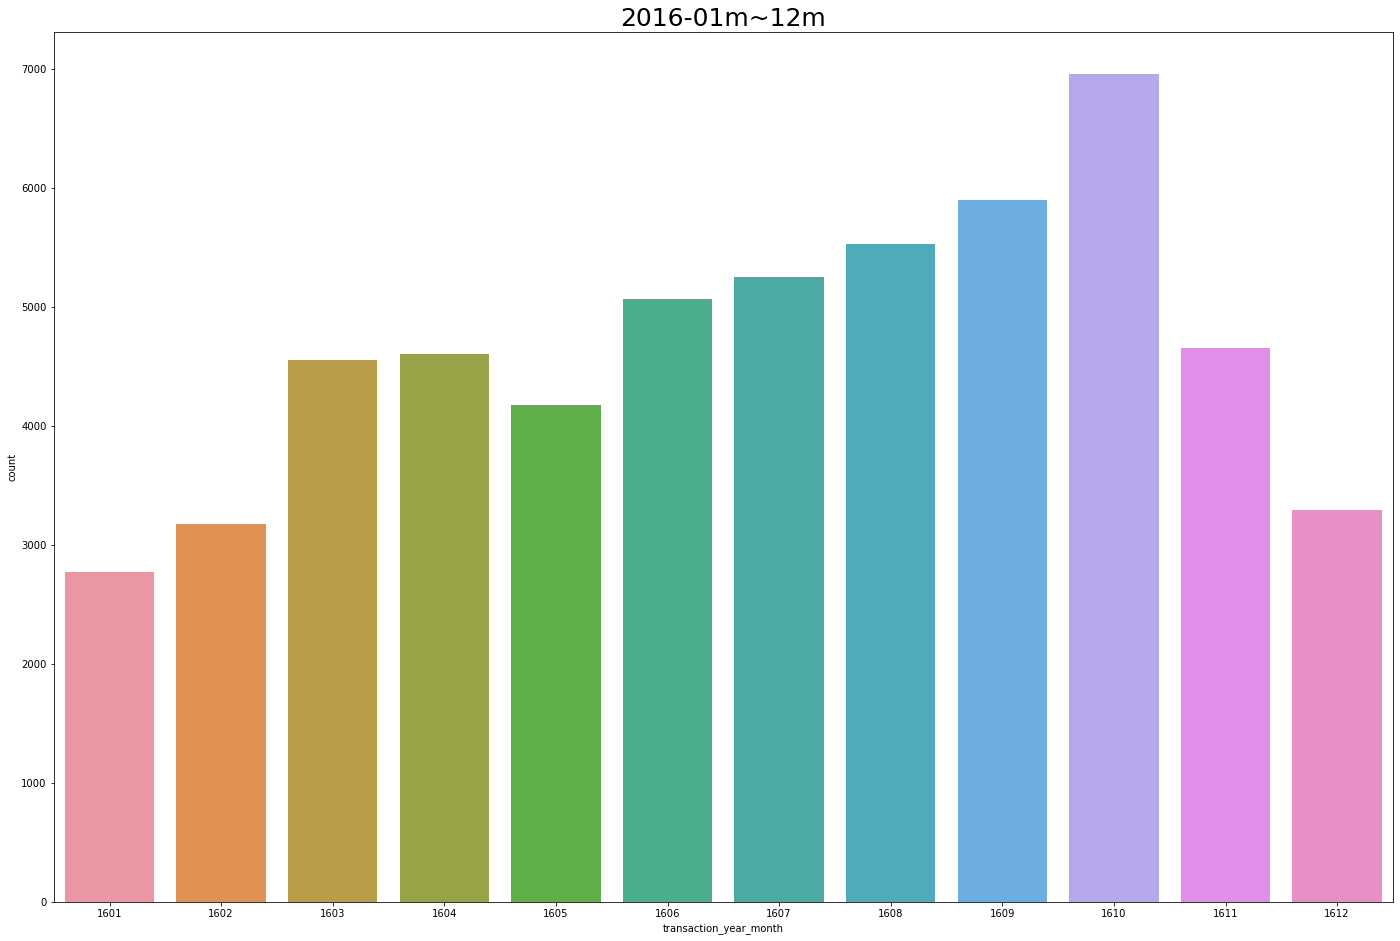

In [68]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[8], x = 'transaction_year_month')
plt.title('2016-01m~12m', fontsize=25)

plt.show()

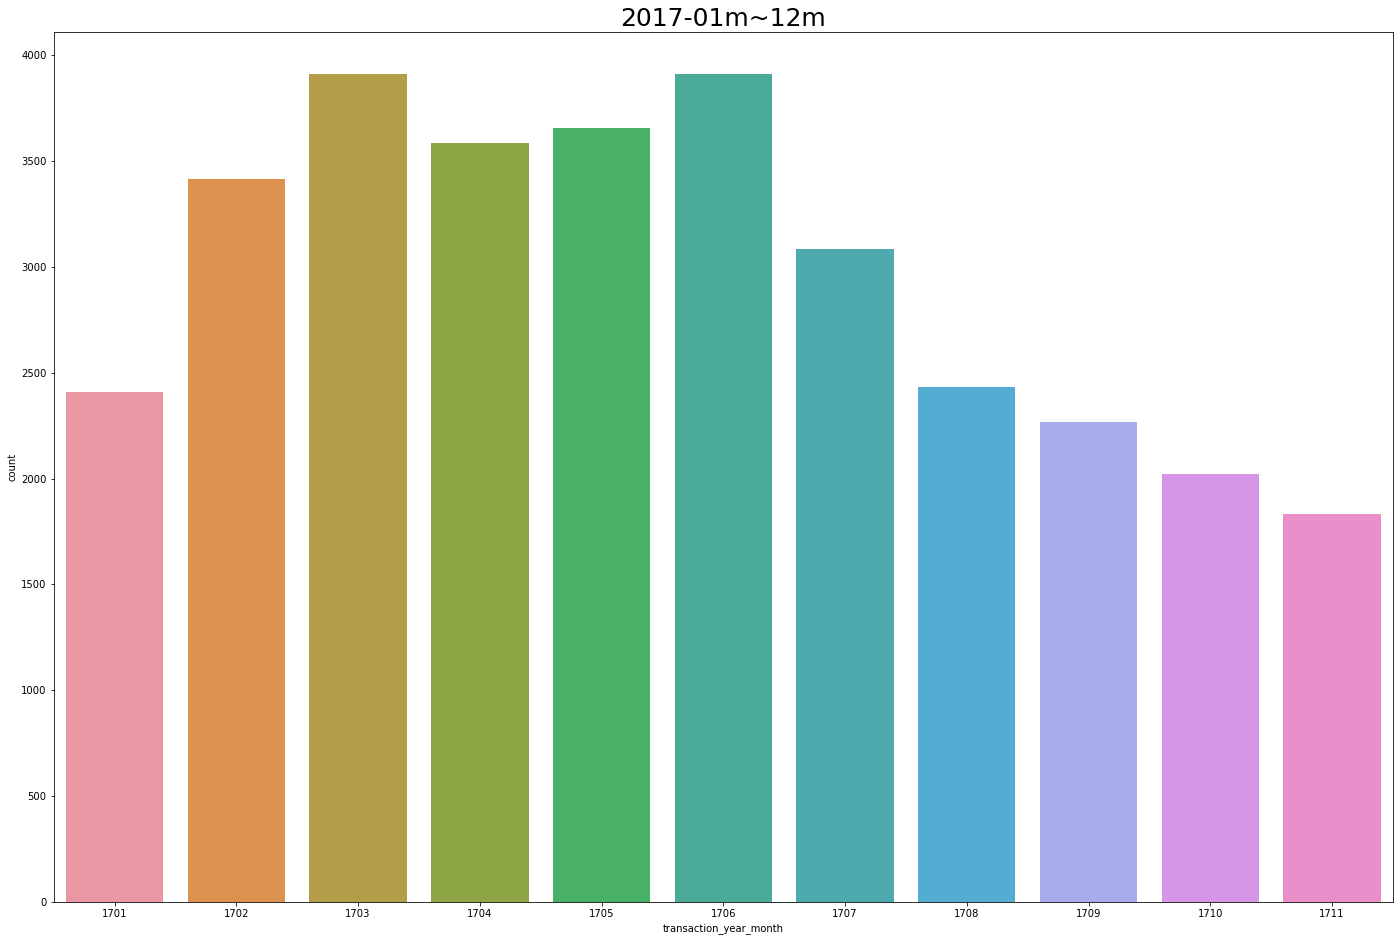

In [69]:
plt.subplots(1,1, figsize=(24,16))

sns.countplot(data = y[9], x = 'transaction_year_month')
plt.title('2017-01m~12m', fontsize=25)

plt.show()

In [70]:
first_date = train.loc[train['transaction_date'] == '1~10']
second_date = train.loc[train['transaction_date'] == '11~20']
t1_date = train.loc[train['transaction_date'] == '21~28']
t2_date = train.loc[train['transaction_date'] == '21~29']
t3_date = train.loc[train['transaction_date'] == '21~30']
t4_date = train.loc[train['transaction_date'] == '21~31']
third_date = pd.concat([t1_date, t2_date, t3_date, t4_date], axis = 0)

s_first_date = seoul.loc[seoul['transaction_date'] == '1~10']
s_second_date = seoul.loc[seoul['transaction_date'] == '11~20']
s_t1_date = seoul.loc[seoul['transaction_date'] == '21~28']
s_t2_date = seoul.loc[seoul['transaction_date'] == '21~29']
s_t3_date = seoul.loc[seoul['transaction_date'] == '21~30']
s_t4_date = seoul.loc[seoul['transaction_date'] == '21~31']
s_third_date = pd.concat([s_t1_date, s_t2_date, s_t3_date, s_t4_date], axis = 0)

b_first_date = busan.loc[busan['transaction_date'] == '1~10']
b_second_date = busan.loc[busan['transaction_date'] == '11~20']
b_t1_date = busan.loc[busan['transaction_date'] == '21~28']
b_t2_date = busan.loc[busan['transaction_date'] == '21~29']
b_t3_date = busan.loc[busan['transaction_date'] == '21~30']
b_t4_date = busan.loc[busan['transaction_date'] == '21~31']
b_third_date = pd.concat([b_t1_date, b_t2_date, b_t3_date, b_t4_date], axis = 0)

total_date = pd.concat([first_date, second_date, third_date])

s_total_date = pd.concat([s_first_date, s_second_date, s_third_date])

b_total_date = pd.concat([b_first_date, b_second_date, b_third_date])

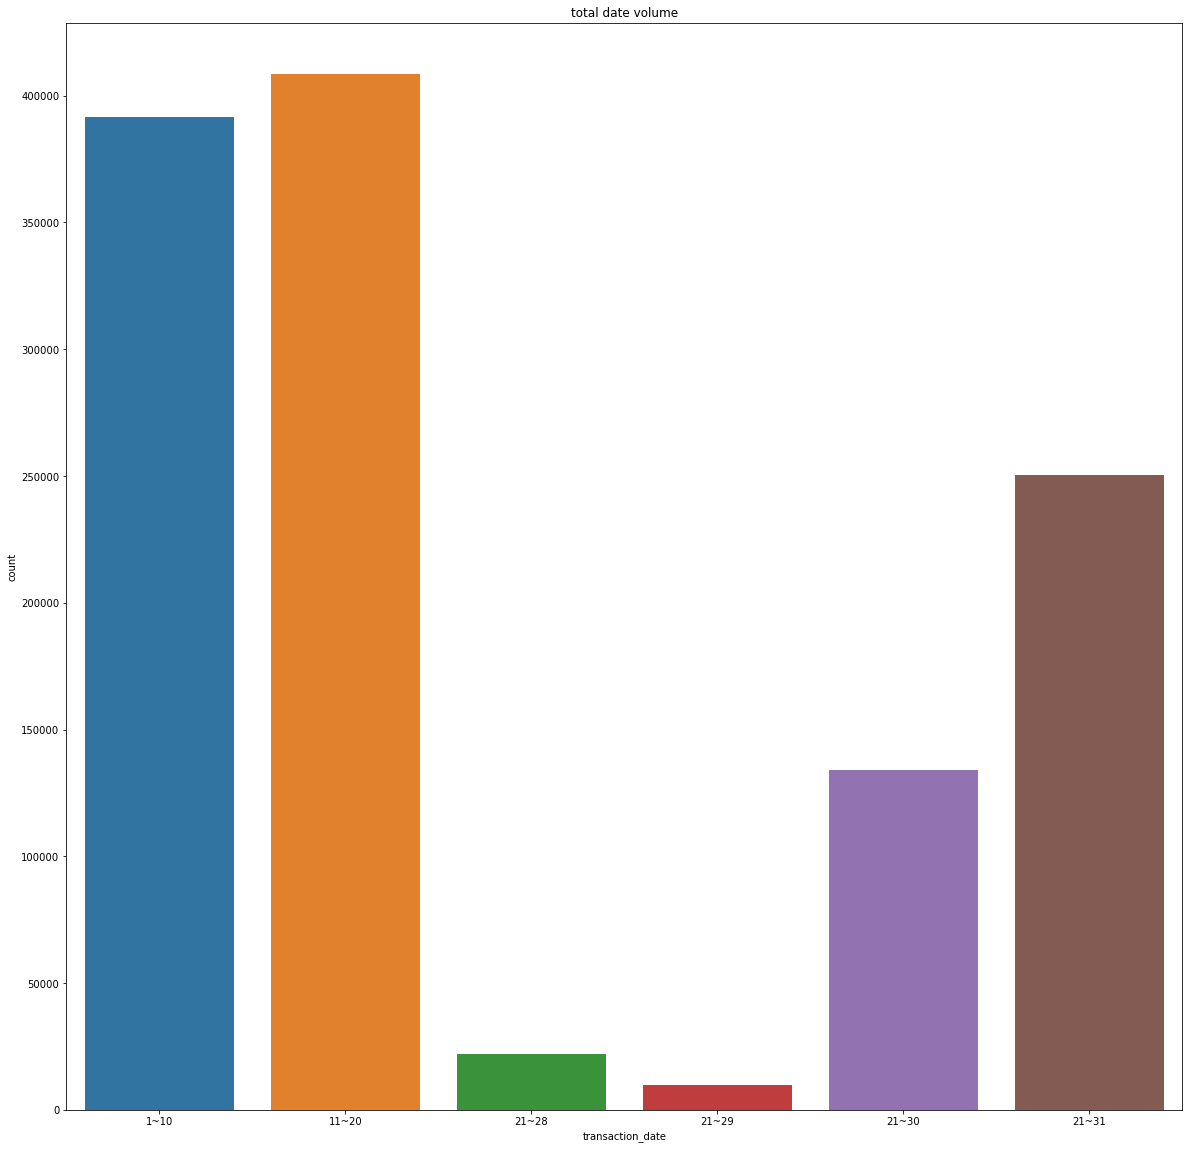

In [71]:
plt.subplots(1,1, figsize=(20,20))

sns.countplot(data = total_date, x = 'transaction_date')
plt.title('total date volume')
plt.show()

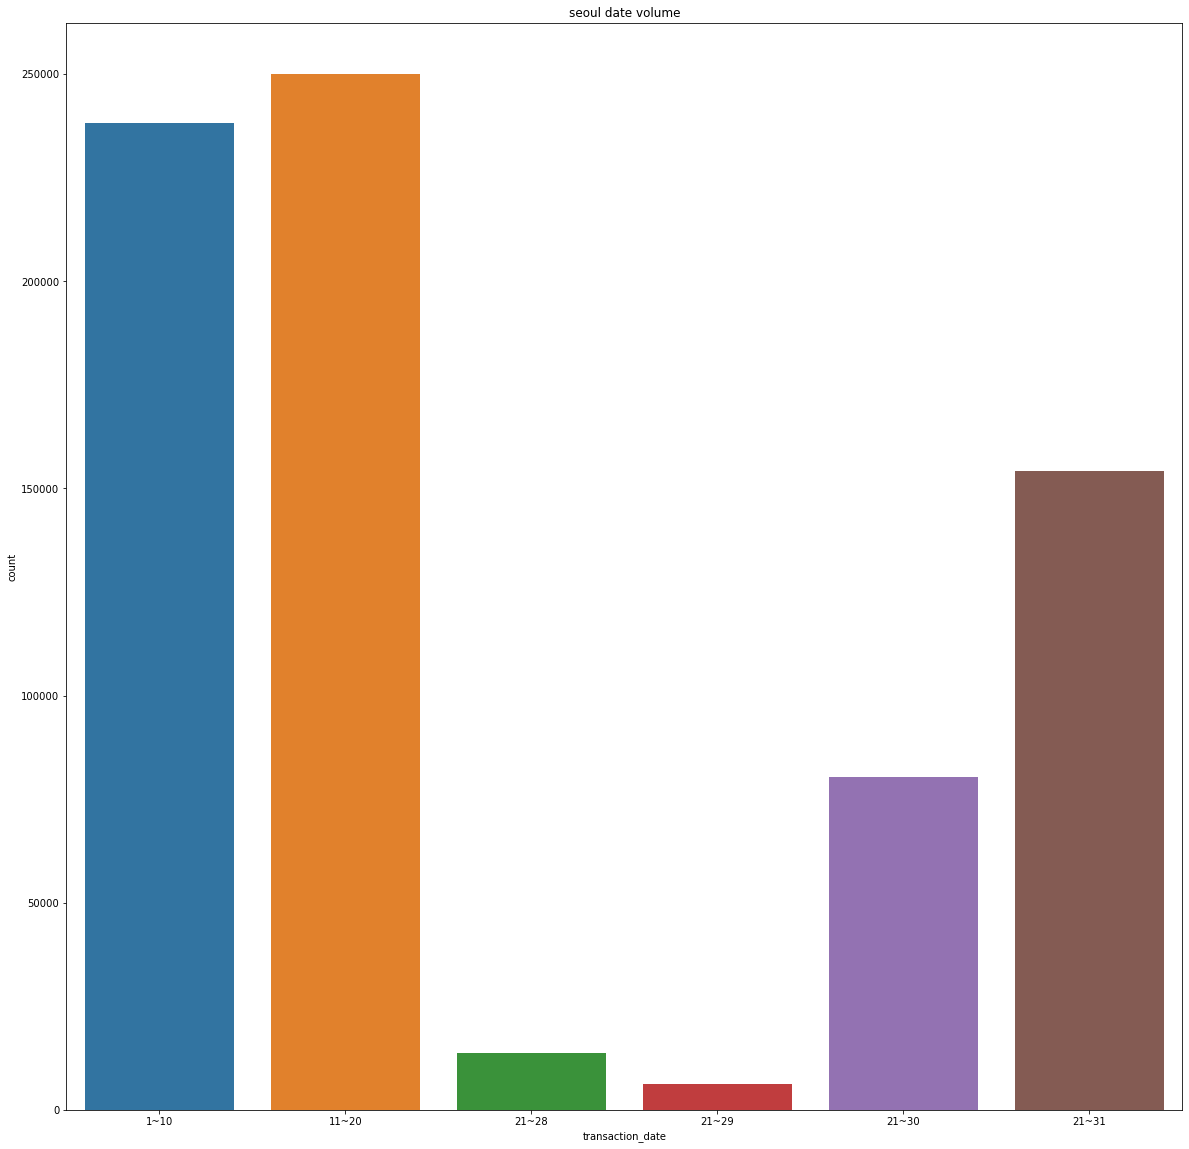

In [72]:
plt.subplots(1,1, figsize=(20,20))

sns.countplot(data = s_total_date, x = 'transaction_date')
plt.title('seoul date volume')
plt.show()

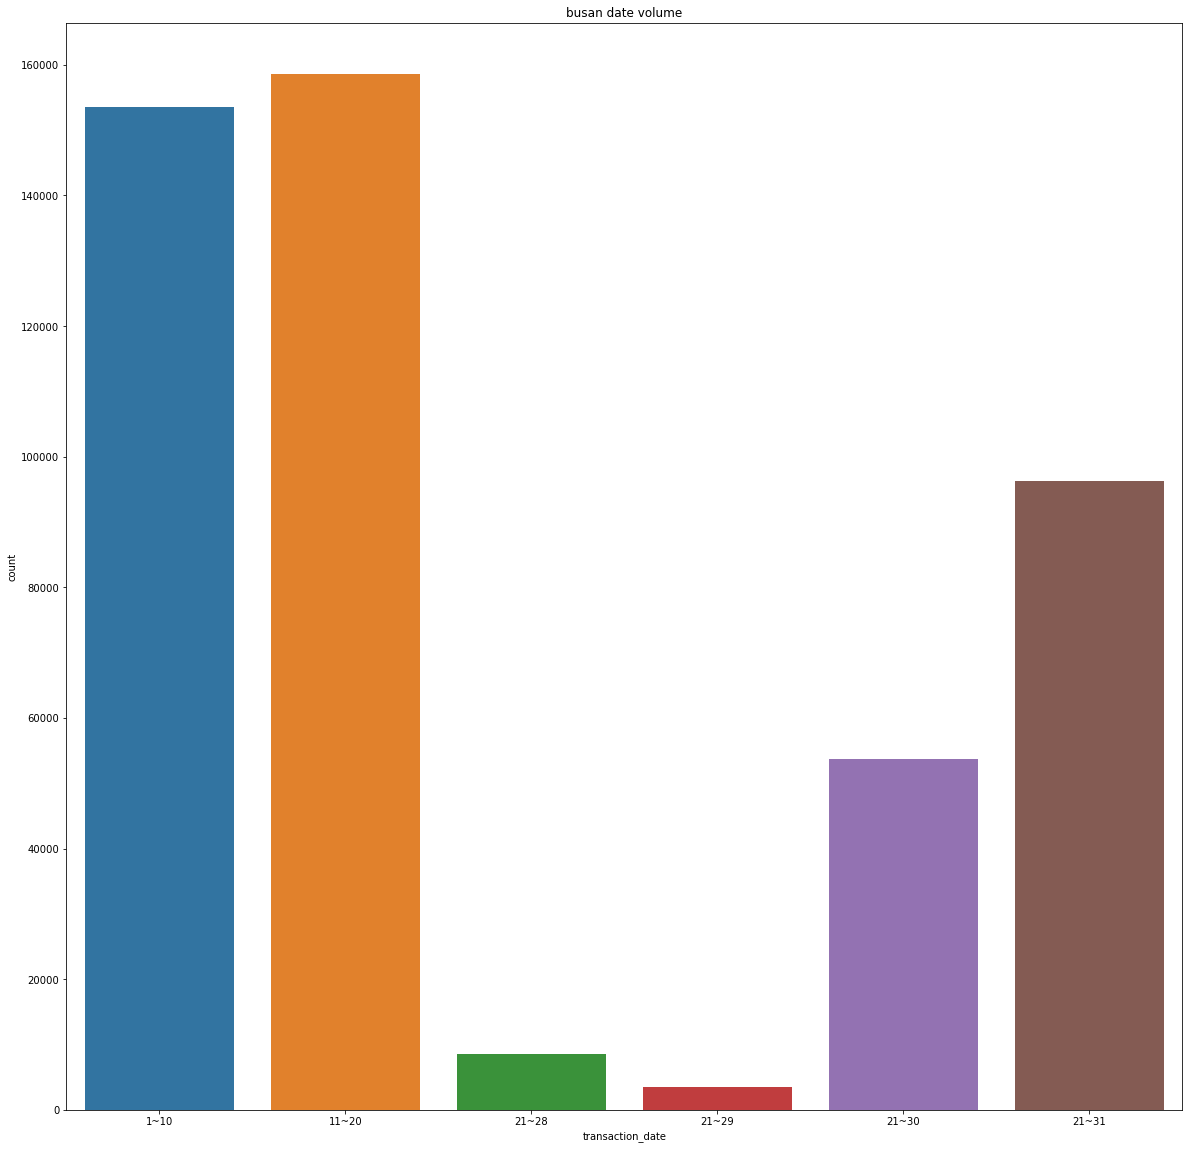

In [73]:
plt.subplots(1,1, figsize=(20,20))

sns.countplot(data = b_total_date, x = 'transaction_date')
plt.title('busan date volume')
plt.show()

####    3-3. 시/구/동별 가격 추세 그래프 그리기

## 구 별 가격 추세 및 거래량 통계

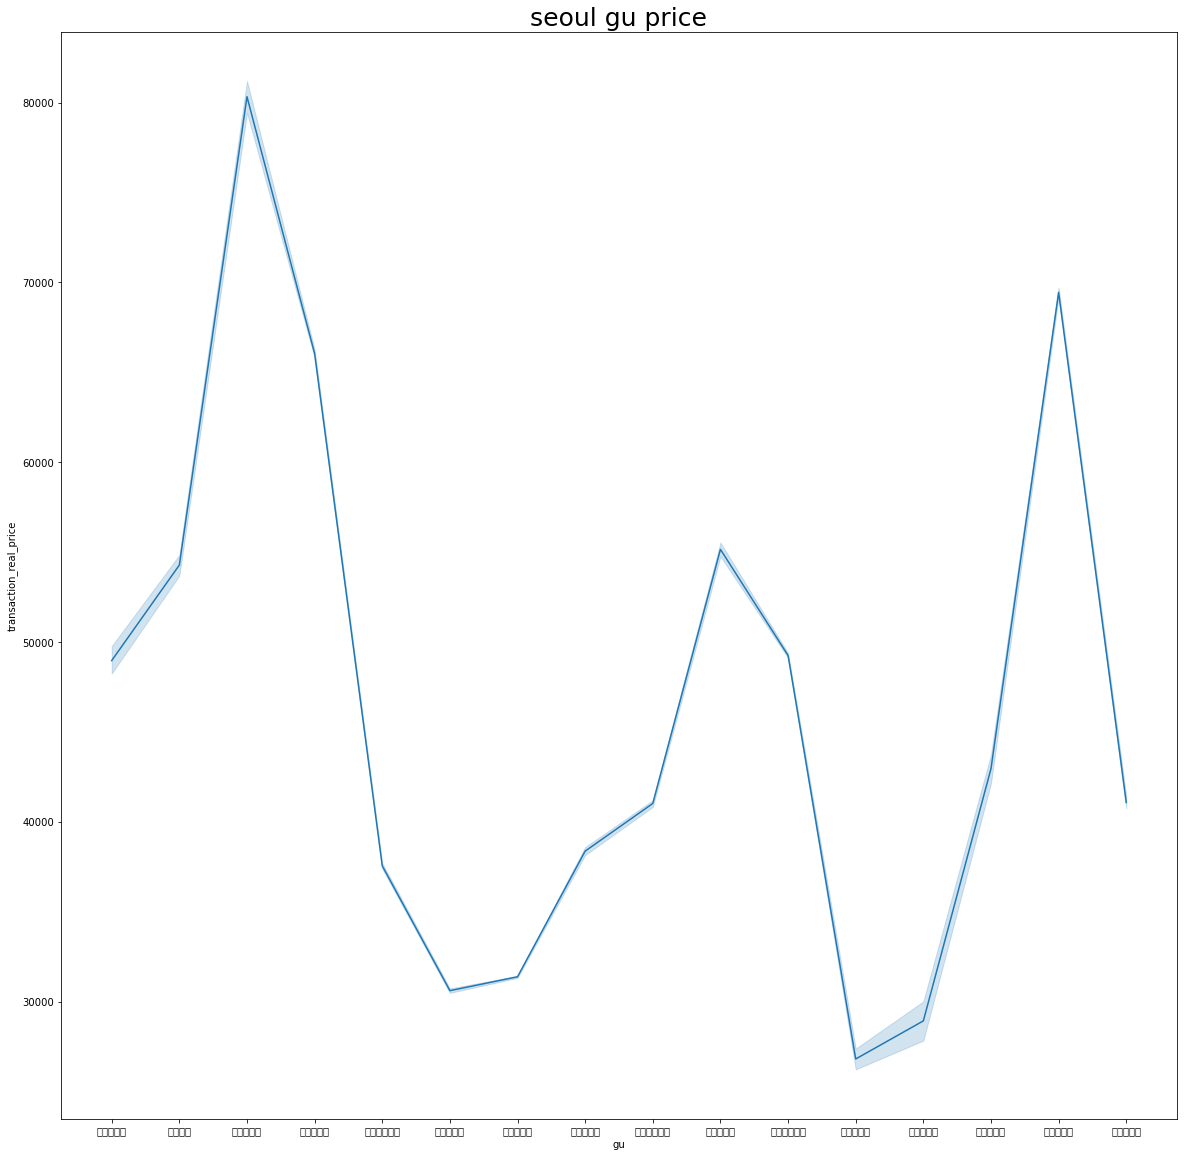

In [74]:
plt.subplots(1, 1, figsize=(20, 20))

sns.lineplot(data = seoul_year, x = 'gu', y = 'transaction_real_price')
plt.title('seoul gu price', fontsize=25)
plt.show()

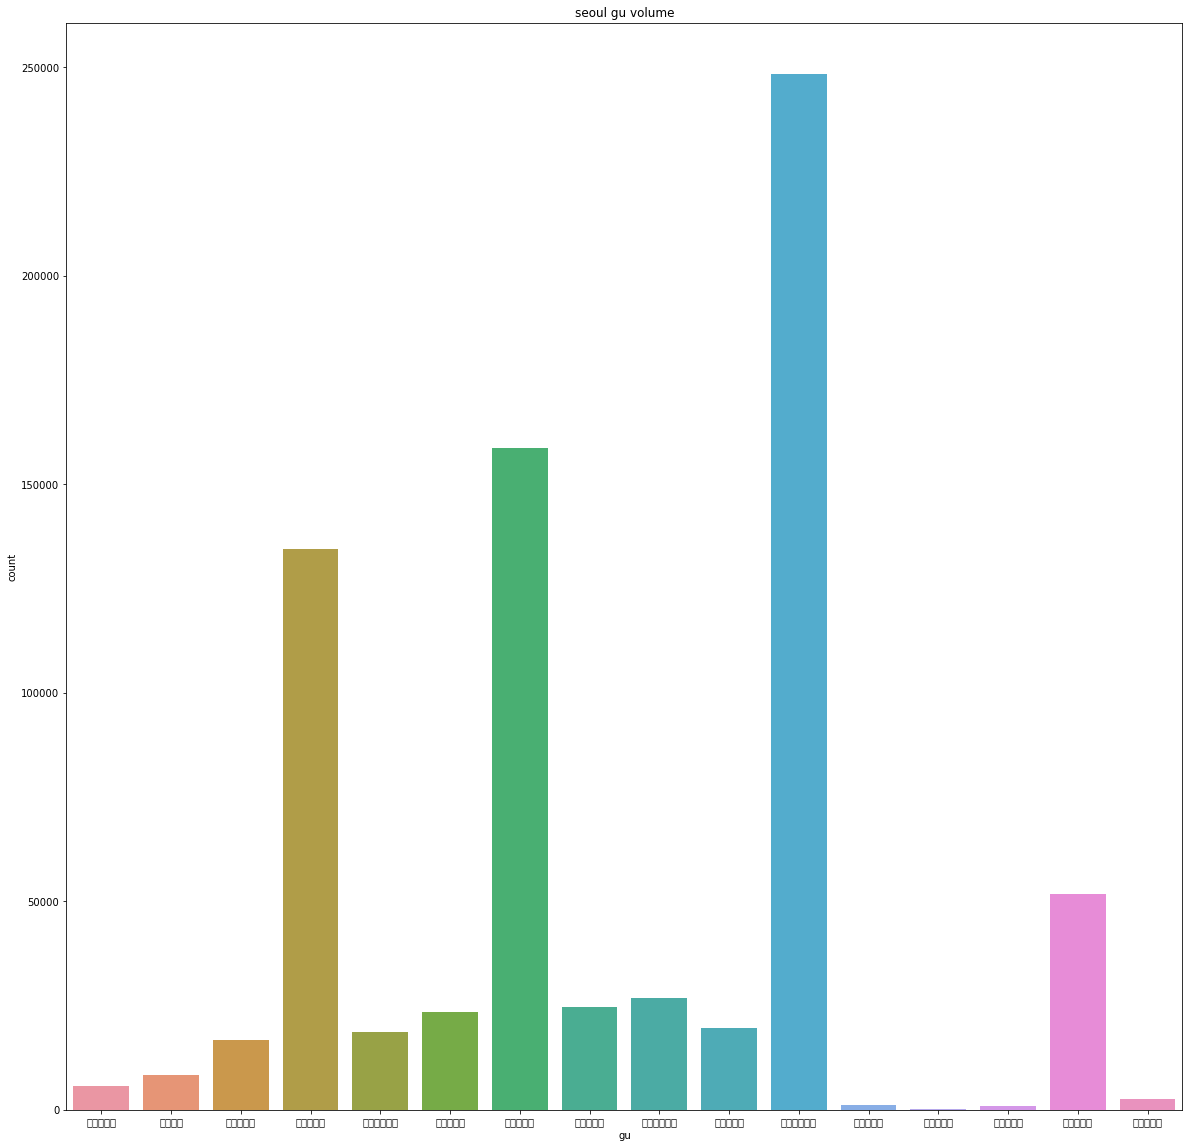

In [75]:
plt.subplots(1,1, figsize=(20,20))

sns.countplot(data = seoul_year, x = 'gu')
plt.title('seoul gu volume')
plt.show()

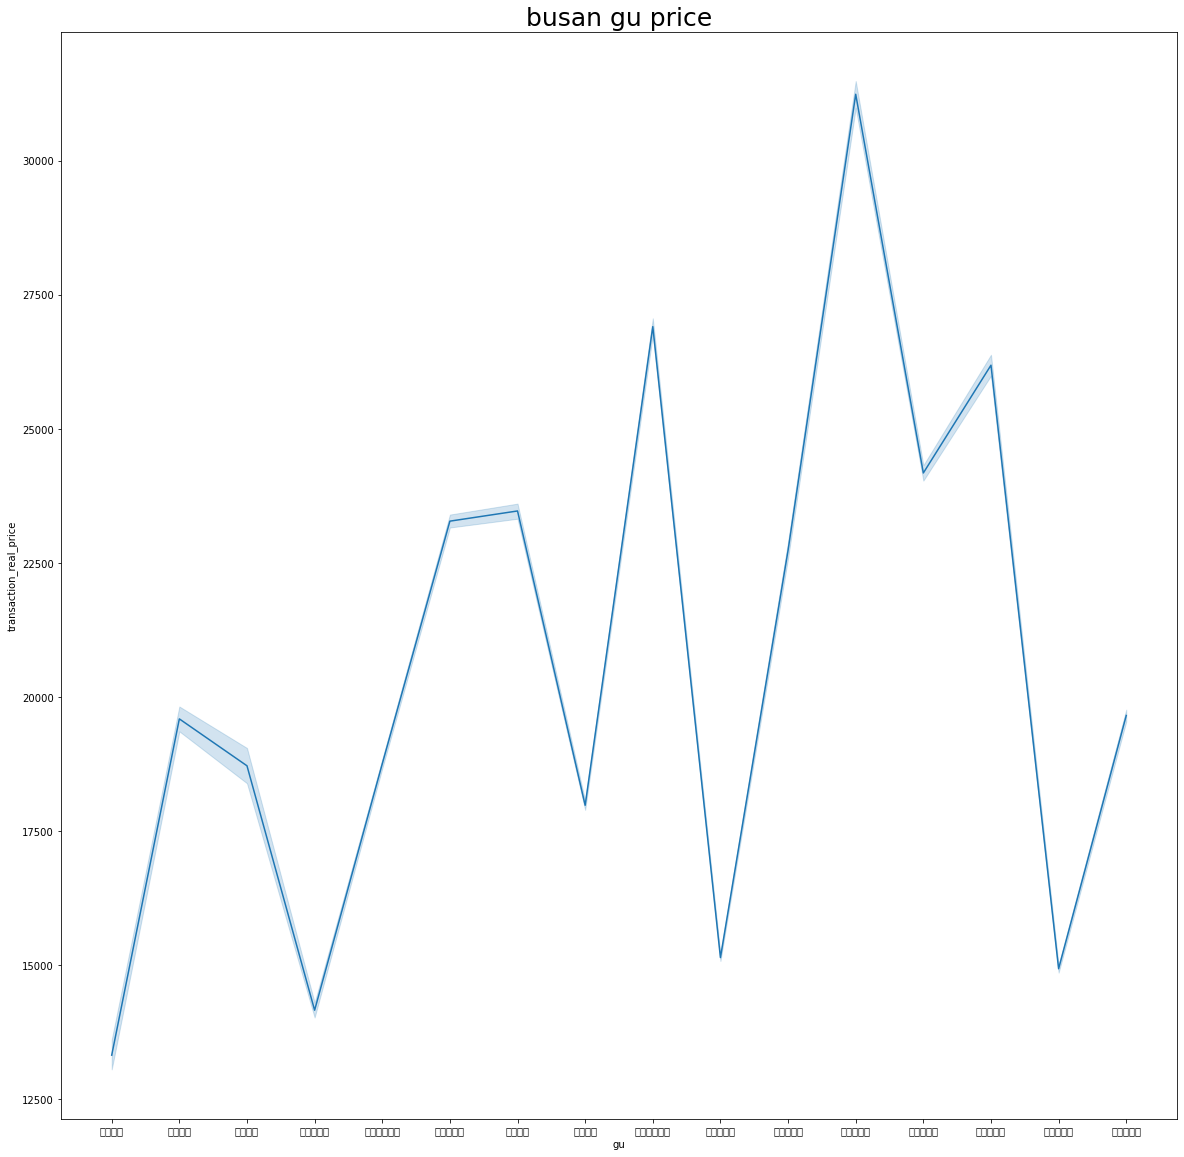

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

sns.lineplot(data = busan_year, x = 'gu', y = 'transaction_real_price')
plt.title('busan gu price', fontsize=25)
plt.show()

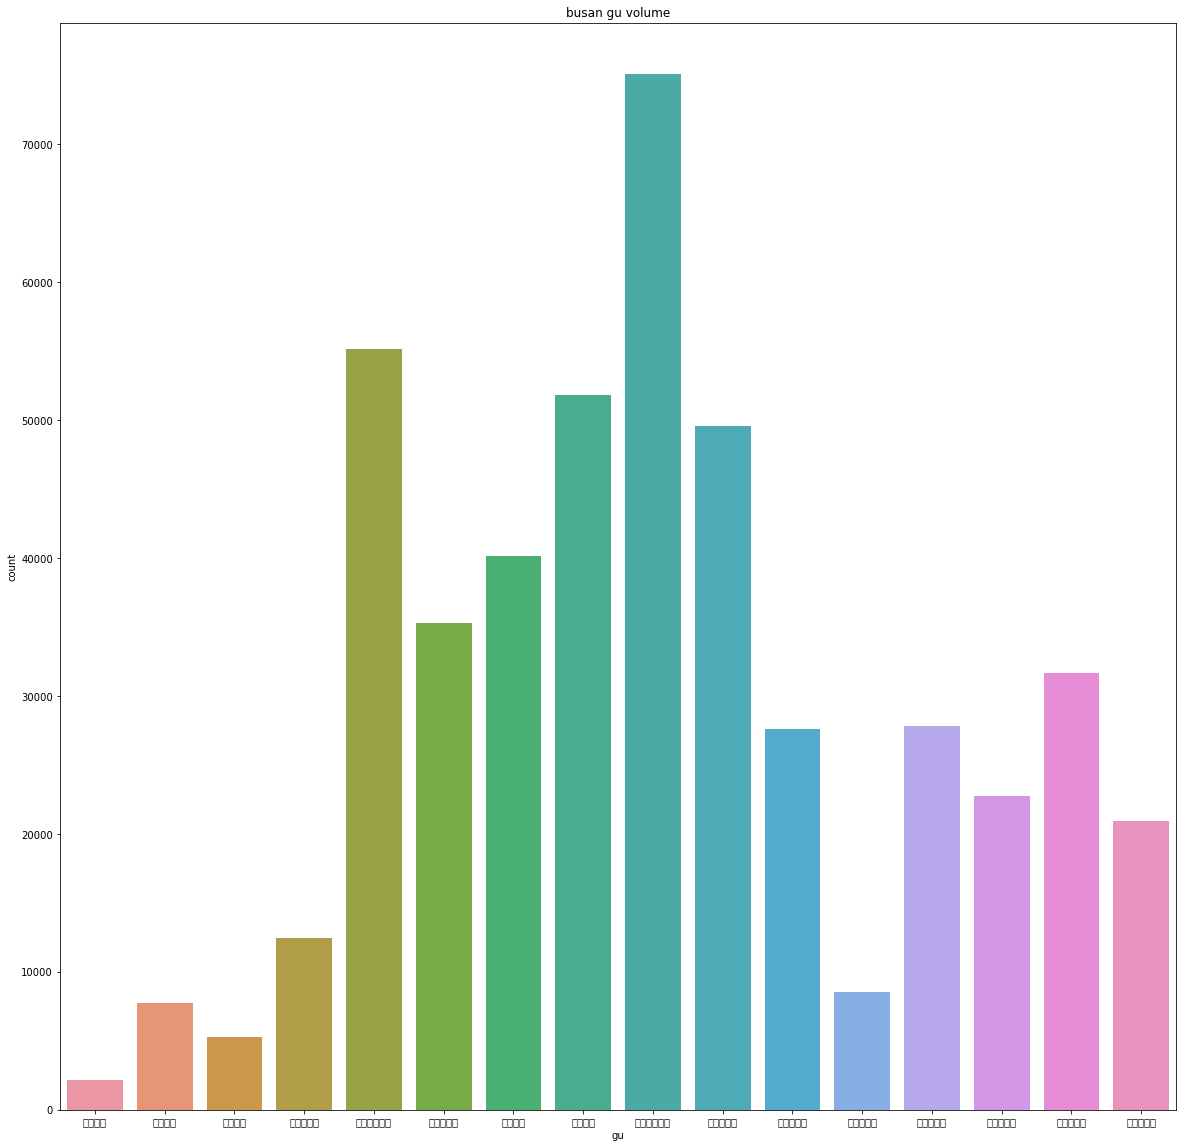

In [77]:
plt.subplots(1,1, figsize=(20,20))

sns.countplot(data = busan_year, x = 'gu')
plt.title('busan gu volume')
plt.show()

In [ ]:
k = 8
corrmat = abs(train.corr(method='spearman'))

columns = corrmat.nlargest(k, 'transaction_real_price').index

cm = np.corrcoef(train[columns].values.T)

sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize = (24,14))

sns.heatmap(cm, annot = True, square = True, fmt='.2f',
            xticklabels = columns.values, yticklabels = columns.values)

plt.show()

# EDA 모델학습에 넣을 수 있는 자료로 변환하기

object type을 모두 int 등 모델이 학습할 수 있는 데이터로 변경하자.

In [79]:
grouped = data['transaction_real_price'].groupby(by=data['gu']).mean()

gu_price = grouped.sort_values(ascending=False)

for i, k in enumerate(gu_price.index):
    data.loc[data['gu'] == k, 'gu'] = i

In [83]:
data['dong'] = data['dong'].astype(int)
data['gu'] = data['gu'].astype(int)

del data['transaction_date']

In [78]:
t = data['transaction_year_month'].min()//100
data['transaction_year_month'] = data['transaction_year_month'].apply(lambda x: ((x//100) - t) * 12 + (x%100))

In [245]:
data.columns[:12]

Index(['transaction_id', 'apartment_id', 'city', 'dong', 'exclusive_use_area',
       'year_of_completion', 'transaction_year_month', 'floor',
       'transaction_real_price', 'gu', '문래자이', '동부센트레빌'],
      dtype='object')

# Data 정규화

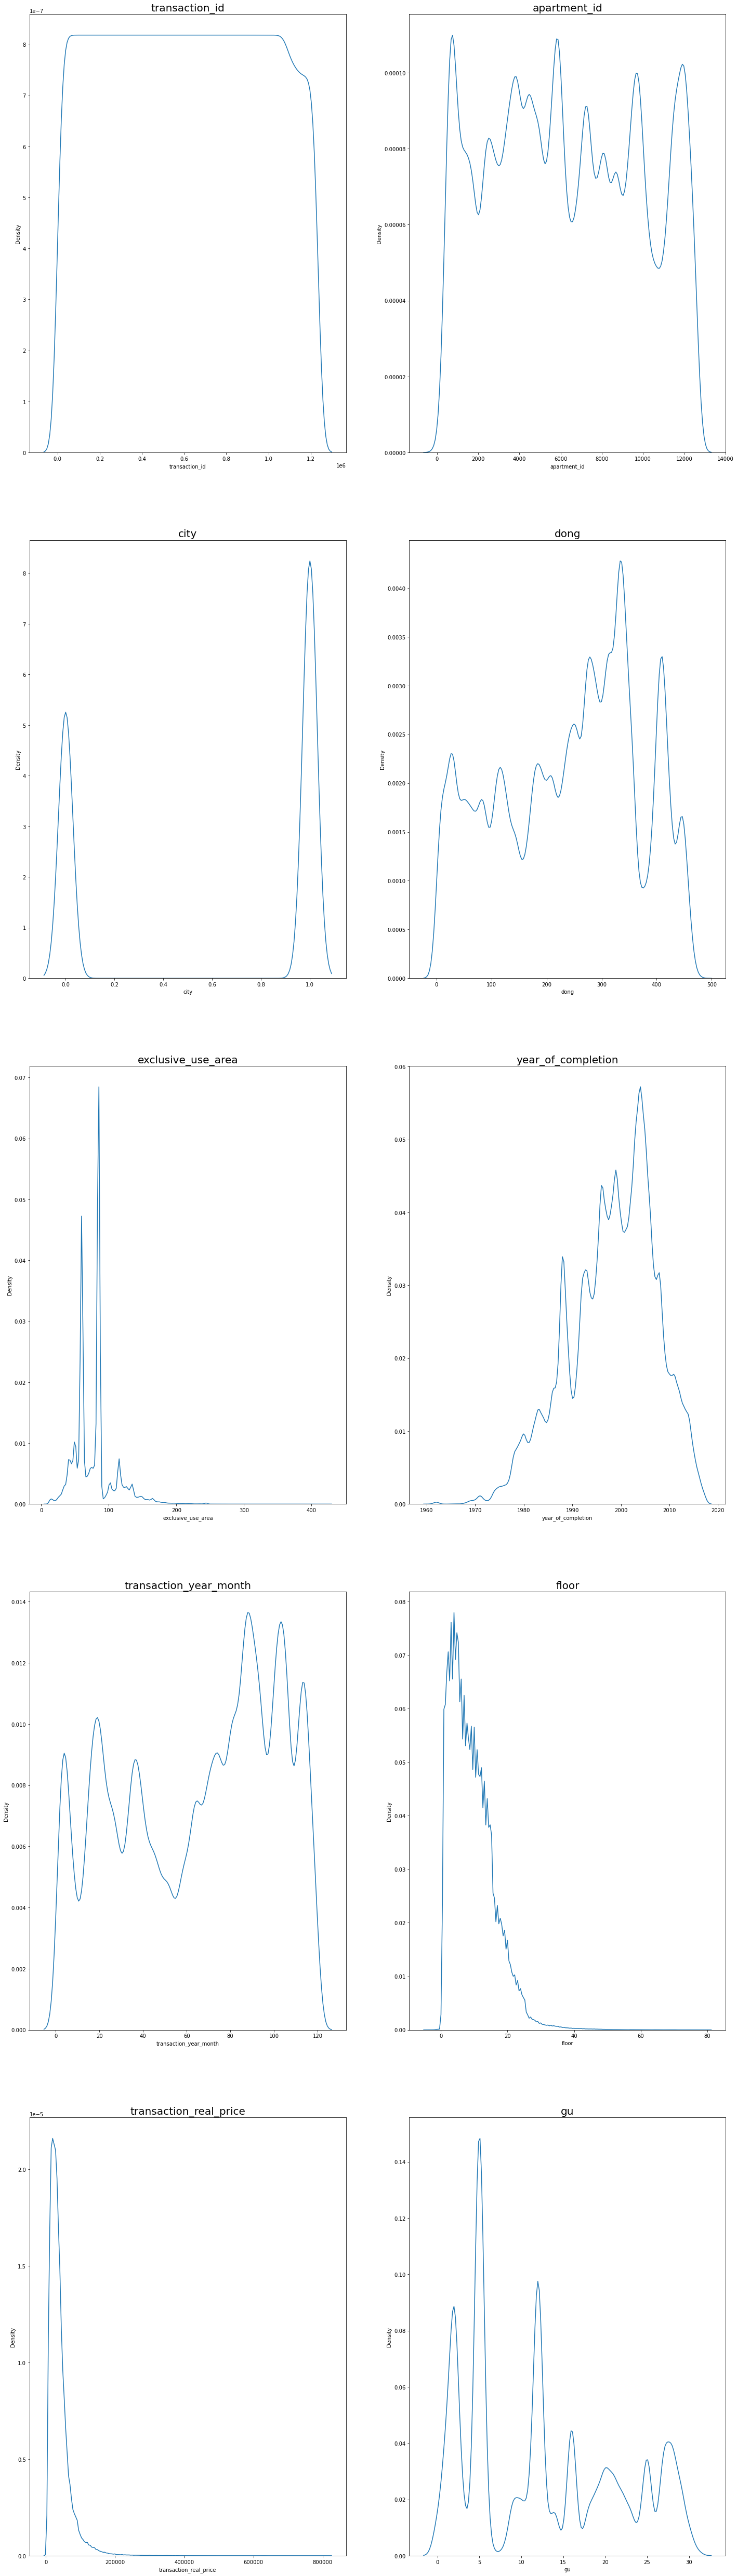

In [247]:
fig, ax = plt.subplots(5, 2, figsize=(24,90))

num = 0
columns = data.columns
for row in range(5):
    for col in range(2):
        sns.kdeplot(data = data[columns[num]], ax=ax[row][col])
        ax[row][col].set_title(columns[num], fontsize=20)
        num += 1
        if num == 11:
            break

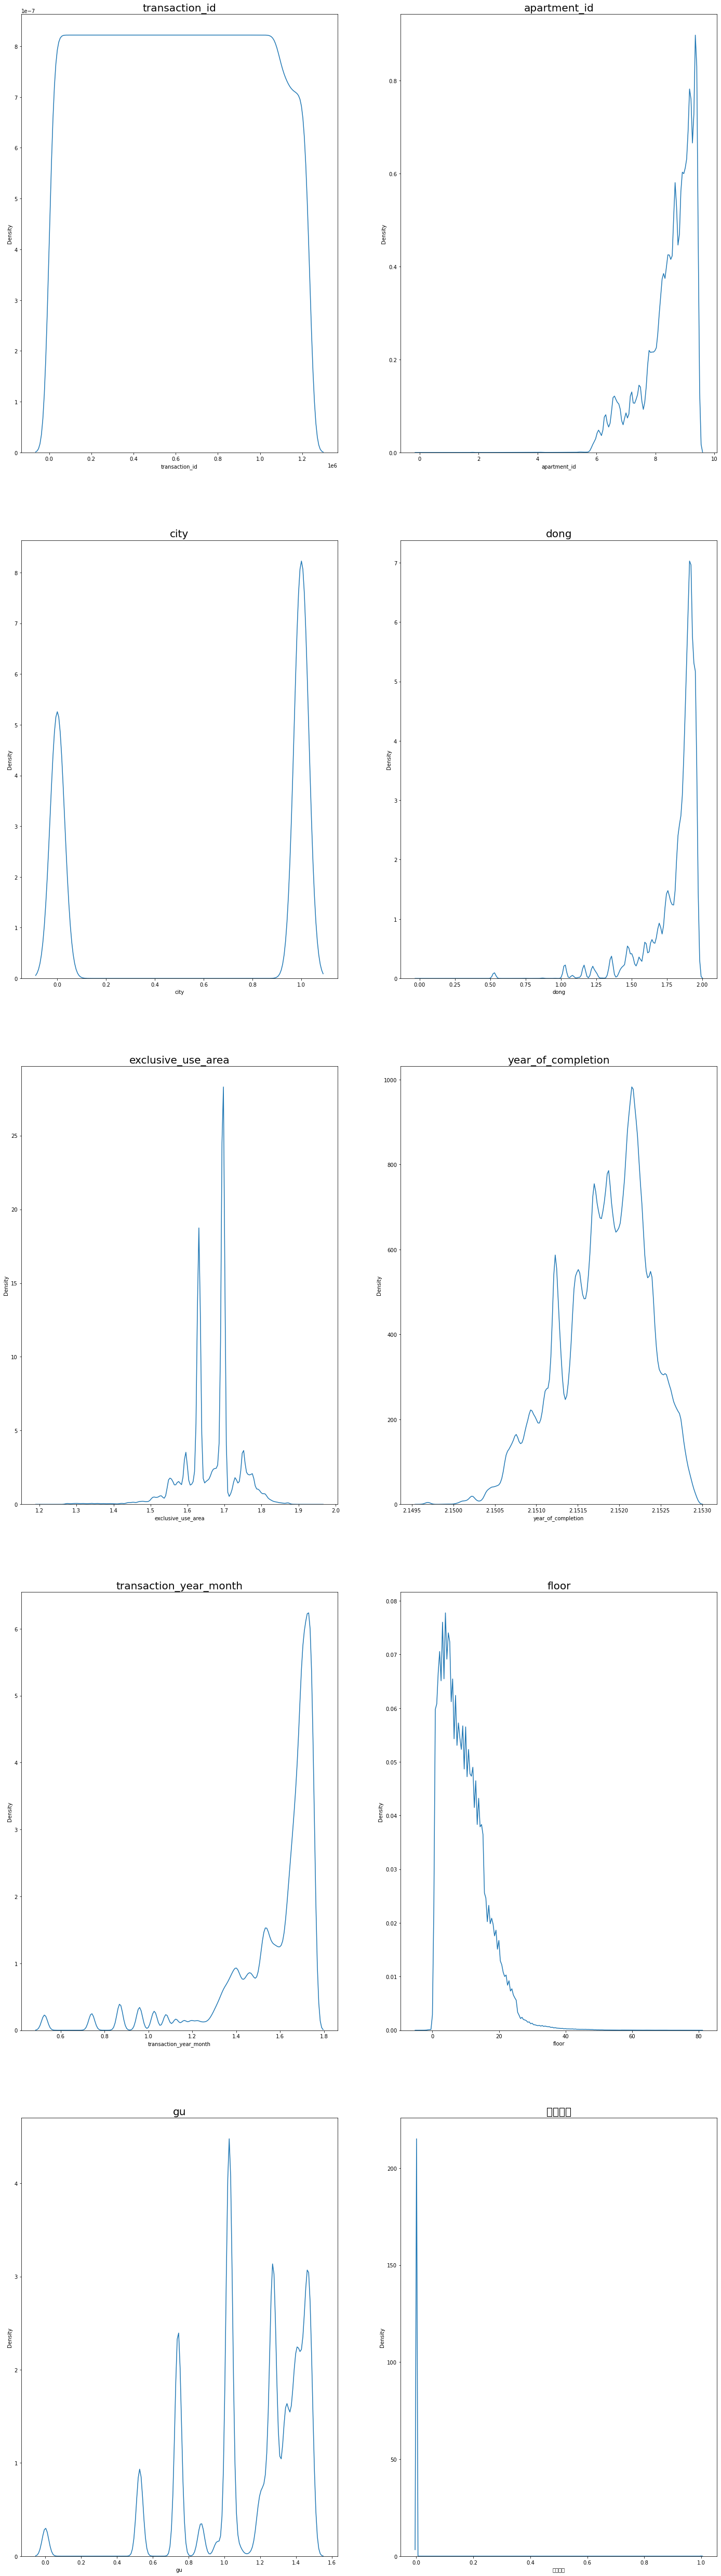

In [255]:
# fig, ax = plt.subplots(5, 2, figsize=(24,90))

# num = 0
# columns = train.columns
# for row in range(5):
  #  for col in range(2):
   #     sns.kdeplot(data = train[columns[num]], ax=ax[row][col])
    #    ax[row][col].set_title(columns[num], fontsize=20)
     #   num += 1
      #  if num == 11:
       #     break

# Model 학습

In [313]:
train = data[:train_len]
test = data[train_len:]

In [315]:
train['floor'] += 5

In [318]:
log_columns = ['apartment_id', 'dong', 'exclusive_use_area', 'year_of_completion', 'transaction_year_month', 'gu', 'floor']
log_price = np.log1p(price)

for i in log_columns:
    train[i] = np.log1p(train[i].values)

In [319]:
price = train['transaction_real_price']
del train['transaction_real_price']

In [320]:
train_id = train['transaction_id']

del train['transaction_id']

In [321]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [322]:
x_train, x_test, y_train, y_test = train_test_split(train,
                                                    log_price,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [325]:
# 손실함수 MSE 함수 정의

def MSE(a,b):
    mse = ((a-b)**2).mean() # 두 값의 차이의 제곱의 평균
    return mse

# 손실함수 RMSE 함수 정의

def RMSE(a, b):
    mse = ((a - b) ** 2).mean() # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5 # mse의 제곱근
    return rmse

In [326]:
from sklearn.ensemble import RandomForestRegressor

R_model = RandomForestRegressor()
R_model.fit(x_train, y_train)
R_pred = R_model.predict(x_test)

In [342]:
b = np.expm1(y_test)

In [335]:
prediction = np.expm1(R_pred)

In [338]:
prediction

array([ 28371.66615061,  30819.56758664,  90809.77704055, ...,
        56175.85980204,  19536.3121938 , 152640.78590552])

In [341]:
MSE(y_test, R_pred)

0.00728145435486696

In [340]:
RMSE(y_test, R_pred)

0.08533143825617238

In [343]:
MSE(b, prediction)

15029464.863791276

In [344]:
RMSE(b, prediction)

3876.78537757654

### train.info()

121만개의 데이터, 12개의 컬럼, 6개의 object 자료형

### test.info()

5463개의 데이터, 11개의 컬럼, 6개의 object 자료형